In [1]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
#suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
options(future.globals.maxSize= 8*1024^3)
source('/home/z4li/zhen/scripts/R/functions/markers.R')
source('/home/z4li/zhen/scripts/R/functions/gg_color_hue.R')
source('/home/z4li/zhen/scripts/R/functions/heatmap.3.R')

In [2]:
df0<-readRDS("SeuratObject.rds")

# Merge MCD snRNAseq dataset

In [20]:
# 3 : /projects/ps-gleesonlab7/User/chchung/99_snARseq/ASD_oasis/ASD/3_R1_Non_001.fastq..gz
# 5890HB 
# 3 and 5890HB included dataset. endothelial cells are excluded. mito <30% cut off
#df0<-readRDS("/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/2021-11-06_20211026_FCD_20200423_snARseq_excl_vessle_30pctmito_34034nu.rds")


      58       59        3   5890HB CTRL8352 CTRL8353  FCD4688  FCD6593 
    4963     2420      134      362     1785     1715     9802     9982 

In [3]:
# # Loading raw data with CellRanger output.
# V3_1_GE1_2 <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/V3_1_GE1_2/outs/filtered_feature_bc_matrix")
# HME_4688 <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/HME_4688/outs/filtered_feature_bc_matrix")
# HME_6593 <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/HME_6593/outs/filtered_feature_bc_matrix")
# TSC_4258 <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2022-05-18_TSC/220518TSC58/outs/filtered_feature_bc_matrix")
# TSC_4259 <- Read10X(data.dir = "/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2022-05-18_TSC/220518TSC59/outs/filtered_feature_bc_matrix")

In [4]:
# df1 <- CreateSeuratObject(counts = V3_1_GE1_2, project = "FCD4512", min.cells = 3, min.features = 100)
# saveRDS(df1, "SeuratObject_FCD4512.rds")
# df1 <- CreateSeuratObject(counts = HME_4688, project = "HME4688", min.cells = 3, min.features = 100)
# saveRDS(df1, "SeuratObject_HME4688.rds")
# df1 <- CreateSeuratObject(counts = HME_6593, project = "HME6593", min.cells = 3, min.features = 100)
# saveRDS(df1, "SeuratObject_HME6593.rds")
# df1 <- CreateSeuratObject(counts = TSC_4258, project = "TSC4258", min.cells = 3, min.features = 100)
# saveRDS(df1, "SeuratObject_TSC4258.rds")
# df1 <- CreateSeuratObject(counts = TSC_4259, project = "TSC4259", min.cells = 3, min.features = 100)
# saveRDS(df1, "SeuratObject_TSC4259.rds")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [2]:
# Create seurat objects. For CTRLs, load demuxlet undergone object.
# df1 <- readRDS("/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/2021-10-29_20211026_FCD_snRNAseq_CTRL83538352_demuxlet_4556nu.rds")
# df2 <- readRDS("SeuratObject_FCD4512.rds")
# df3 <- readRDS("SeuratObject_HME4688.rds")
# df4 <- readRDS("SeuratObject_HME6593.rds")
# df5 <- readRDS("SeuratObject_TSC4258.rds")
# df6 <- readRDS("SeuratObject_TSC4259.rds")

In [3]:
# Merge all loaded dataset into one object
#merged<-merge(df1, y=c(df2,df3,df4,df5,df6), add.cell.id=c("CTRL","4512","4688","6593","4258","4259"), project = "MCD")

In [4]:
#saveRDS(merged,"SeuratObject.rds")

In [4]:
# df0<-readRDS("SeuratObject.rds")

# Idents(df0) <- "orig.ident"

# table(Idents(df0))


CTRL8352 CTRL8353  FCD4512  HME4688  HME6593  TSC4258  TSC4259 
    2161     2395    14943    19591    11182    10572    21035 

# Calculate mitochondria-derived reads

In [9]:
# df0[["percent.mt"]] <- PercentageFeatureSet(df0, pattern = "^MT-")

# # check raw data quality
# options(repr.plot.width=10, repr.plot.height=5)
# VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0,log = T)

# # cut off setup for QC
# df0 <- subset(df0, subset = nFeature_RNA > 500 & nCount_RNA >1000 & percent.mt<10)
# options(repr.plot.width=10, repr.plot.height=5)
# VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0,log = T)

# # Take protein coding regions
# protein_coding <- read.csv("/projects/ps-gleesonlab7/gleeson3/user/zhen/data/snARseq/HEK/2019-12-25_GRCh38-95_auto_protein_coding_genes.csv", header = T, row.names = 1)
# df0 <- df0[protein_coding$gene_name,]

# df0
# table(Idents(df0))

An object of class Seurat 
16762 features across 33206 samples within 1 assay 
Active assay: RNA (16762 features, 0 variable features)


CTRL8352 CTRL8353  FCD4512  HME4688  HME6593  TSC4258  TSC4259 
    1659     1180     2043     4934     7184    10496     5710 

In [11]:
# df0@meta.data$disease[df0@meta.data$orig.ident %in% c('CTRL8352','CTRL8353')] <-'CTRL'
# df0@meta.data$disease[df0@meta.data$orig.ident %in% c('TSC4258','TSC4259')] <-'TSC'
# df0@meta.data$disease[df0@meta.data$orig.ident %in% c('HME4688','HME6593')] <-'HME'
# df0@meta.data$disease[df0@meta.data$orig.ident %in% c('FCD4512')] <-'FCD'
# table(df0@meta.data$disease)


 CTRL   FCD   HME   TSC 
 2839  2043 12118 16206 

In [13]:
# saveRDS(df0,"SeuratObject.rds")

# Data Normalization scaling and UMAP generation

In [2]:
df0 <- readRDS("SeuratObject.rds")

In [3]:
DefaultAssay(df0) <- "SCT"

In [7]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [6]:
df0 <- SCTransform(df0, vars.to.regress = c('nCount_RNA','nFeature_RNA','percent.mt','orig.ident',"disease"), verbose = FALSE)

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

PC_ 1 
Positive:  ABCB1, FLT1, COBLL1, EBF1, ATP10A, CLDN5, EPAS1, SLC7A5, LEF1, MECOM 
Negative:  SLC1A2, GPC5, LSAMP, FAM19A1, SLC4A4, SLC1A3, GPM6A, ASIC2, DPP10, NKAIN3 
PC_ 2 
Positive:  ST18, CTNNA3, RNF220, BCAS1, IL1RAPL1, LHFPL3, MBP, FRMD4B, DSCAM, KCNH8 
Negative:  SLC1A2, GPC5, SLC1A3, SLC4A4, PITPNC1, COL5A3, RANBP3L, GLI3, NKAIN3, GPM6A 
PC_ 3 
Positive:  PLXDC2, DOCK8, APBB1IP, IPCEF1, ST6GAL1, CD83, P2RY12, DOCK4, C3, RASGEF1C 
Negative:  ST18, CTNNA3, RNF220, CNDP1, ENPP2, SLC5A11, TF, MBP, CLDN11, KCNH8 
PC_ 4 
Positive:  LHFPL3, PCDH15, DSCAM, NXPH1, TNR, KCNMB2, LRRC4C, DPP6, SEMA5A, OPCML 
Negative:  ST18, CTNNA3, RNF220, PLXDC2, DOCK8, APBB1IP, DOCK4, IPCEF1, ST6GAL1, ENPP2 
PC_ 5 
Positive:  IQCJ-SCHIP1, IL1RAPL2, NKAIN2, RYR2, PTPRD, LINGO2, NRG1, RALYL, KCNQ5, ASIC2 
Negative:  LHFPL3, PCDH15, SEMA5A, DSCAM, SOX6, TNS3, BCAS1, TNR, SMOC1, MAML2 

Warning message in ElbowPlot(df0, ndims = 100):
“The object only has information for 50 reductions”


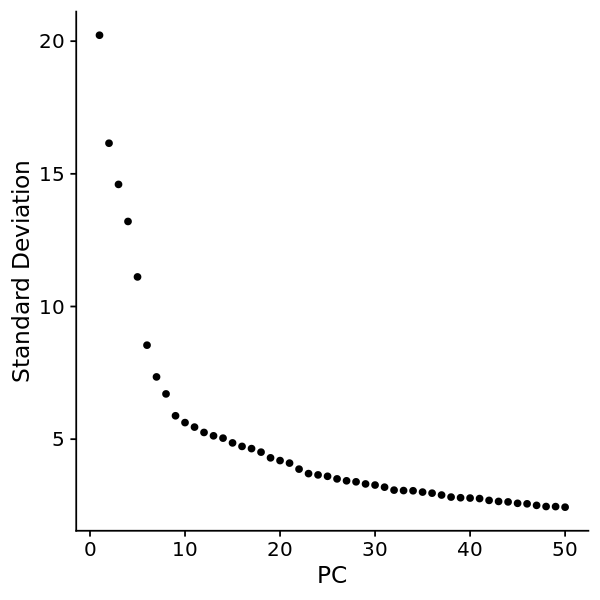

In [8]:
df0 <- RunPCA(df0, npcs = 50, ndims.print = 1:5, nfeatures.print = 10)
options(repr.plot.width=5, repr.plot.height=5)
ElbowPlot(df0, ndims = 100)

In [9]:
plan(strategy = "multicore")
df0 <- RunUMAP(df0,
               #umap.method = '',
               n.neighbors = 30,
               min.dist = 0.2,
               metric = 'correlation',
               n.components = 2, 
               dims = 1:10, 
               # n.epochs = 100,
               verbose = F)
plan(strategy = "sequential")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [10]:
df0 <- FindNeighbors(object = df0, reduction = 'pca', dims = 1:10, verbose = F)

In [11]:
df0 <- FindClusters(object = df0, resolution = 0.4)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 33206
Number of edges: 1081841

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9582
Number of communities: 24
Elapsed time: 5 seconds


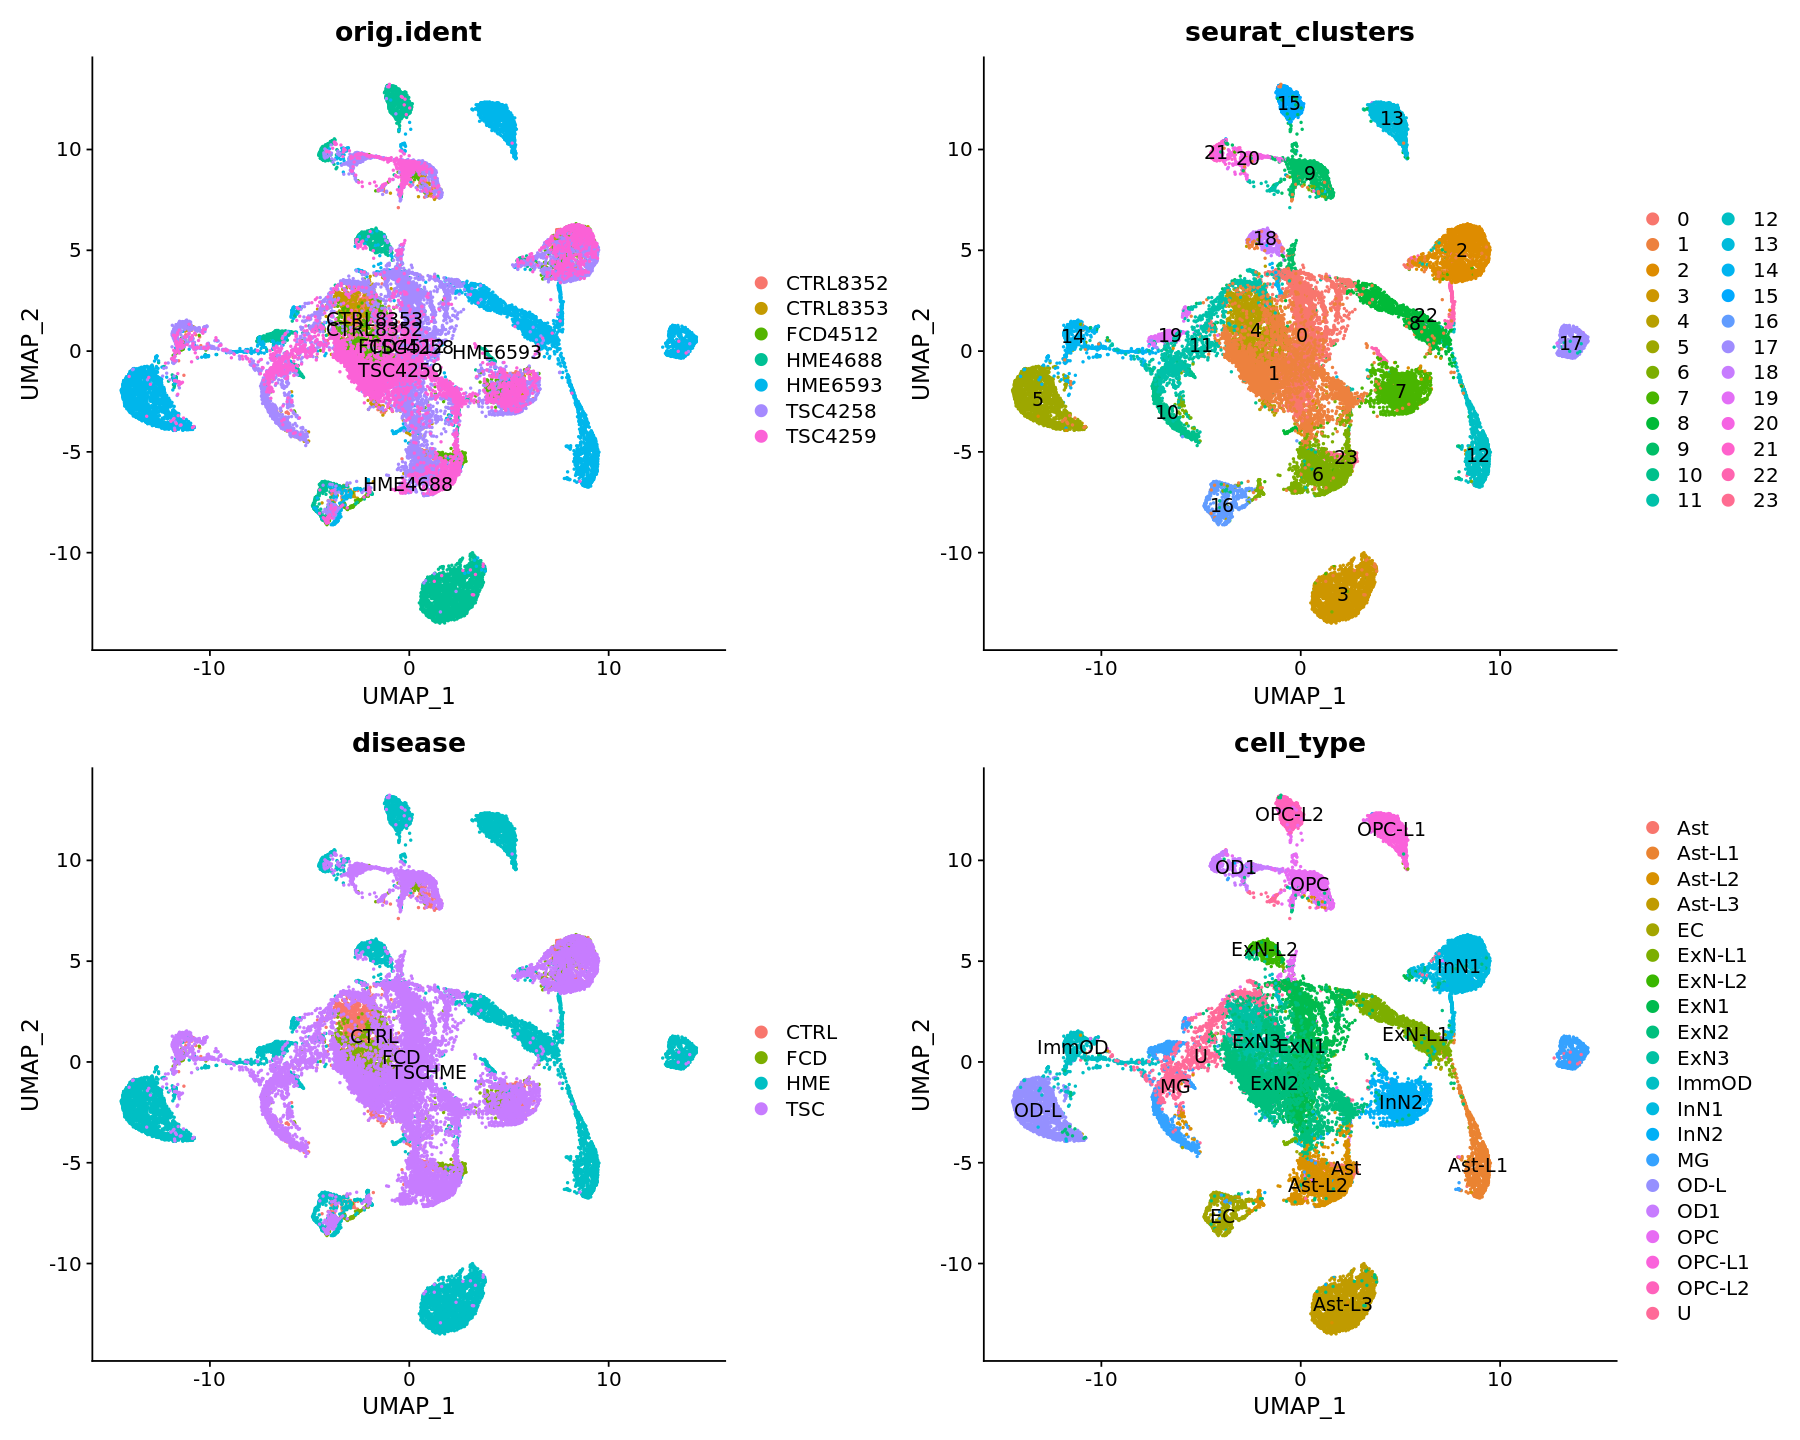

In [26]:
options(repr.plot.width=15, repr.plot.height=12)
DimPlot(df0, reduction = 'umap',pt.size=0.3, group.by =c('orig.ident', 'seurat_clusters','disease','cell_type'),label = T)

In [34]:
pdf("UMAPs.pdf",width=15, height=12)
options(repr.plot.width=15, repr.plot.height=12)
DimPlot(df0, reduction = 'umap',pt.size=0.3, group.by =c('orig.ident', 'seurat_clusters','disease','cell_type'),label = T)
dev.off()

png 
  2

In [ ]:
# plan(strategy = "multicore")
# df0 <- NormalizeData(object = df0, 
#                       normalization.method = "LogNormalize", 
#                       margin = 2, 
#                      scale.factor = 10000)
# plan(strategy = "sequential")

In [ ]:
# plan(strategy = "multicore")
# df0 <- FindVariableFeatures(object = df0,
#                             selection.method = "vst", 
#                             nfeatures = 5000)
# plan(strategy = "sequential")

In [ ]:
# hvg <- VariableFeatures(df0)
# top10 <- head(VariableFeatures(df0), 10)
# plot1 <- VariableFeaturePlot(df0)
# plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
# plot2

In [29]:
# plan(strategy = "multicore")
# df0 <- ScaleData(object = df0, 
#                  features = hvg, 
#                  vars.to.regress = c('nCount_RNA','nFeature_RNA','percent.mt','orig.ident','disease'),
#                  block.size = 20000,
#                  verbose = F)
# plan(strategy = "sequential")

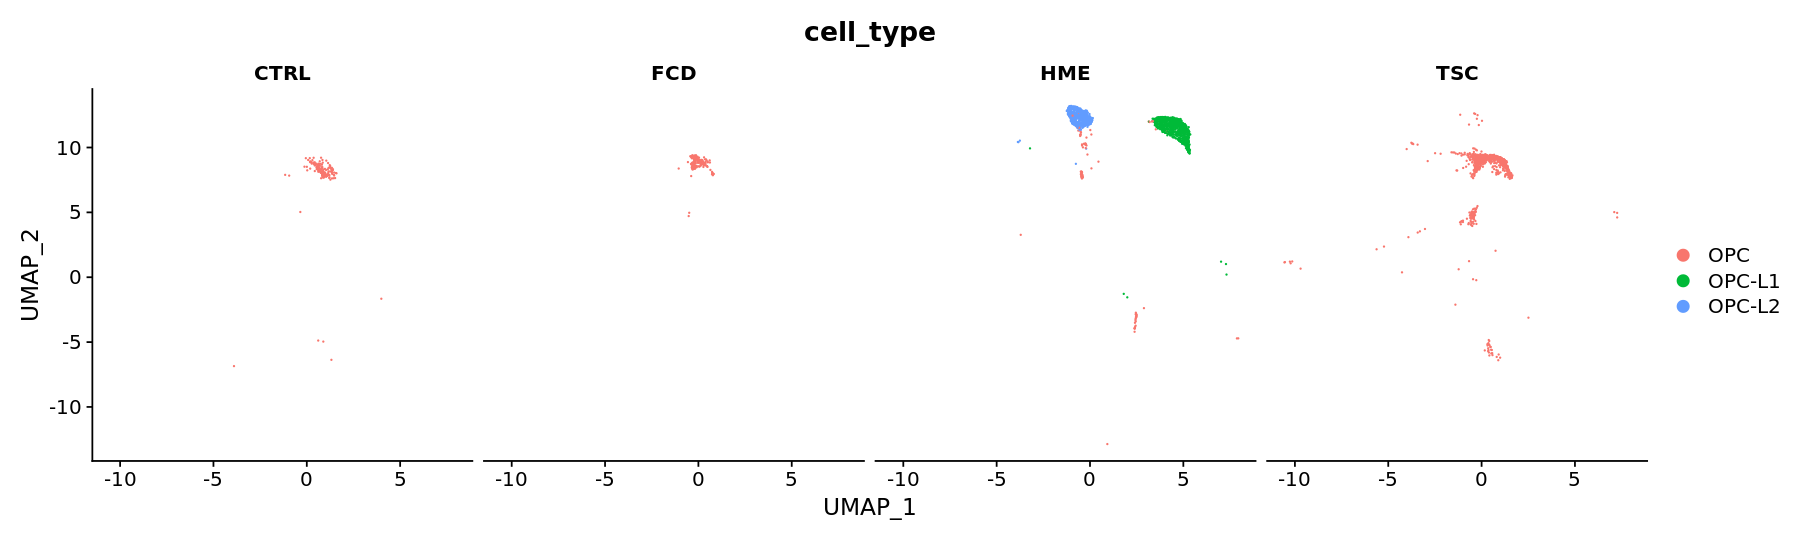

In [22]:
options(repr.plot.width=15, repr.plot.height=4.5)
DimPlot(object = df0,
        ncol = 5, 
        reduction = "umap", 
        group.by = c('cell_type'),
        split.by = c('disease'),
        label = F,
        pt.size = 0.01,
        label.size = 5)

In [31]:
pdf("UMAPs2.pdf",width=15, height=4.5)
options(repr.plot.width=15, repr.plot.height=4.5
       )
DimPlot(object = df0,
        ncol = 5, 
        reduction = "umap", 
        group.by = c('cell_type'),
        split.by = c('disease'),
        label = F,
        pt.size = 0.5,
        label.size = 5)
dev.off()

png 
  2

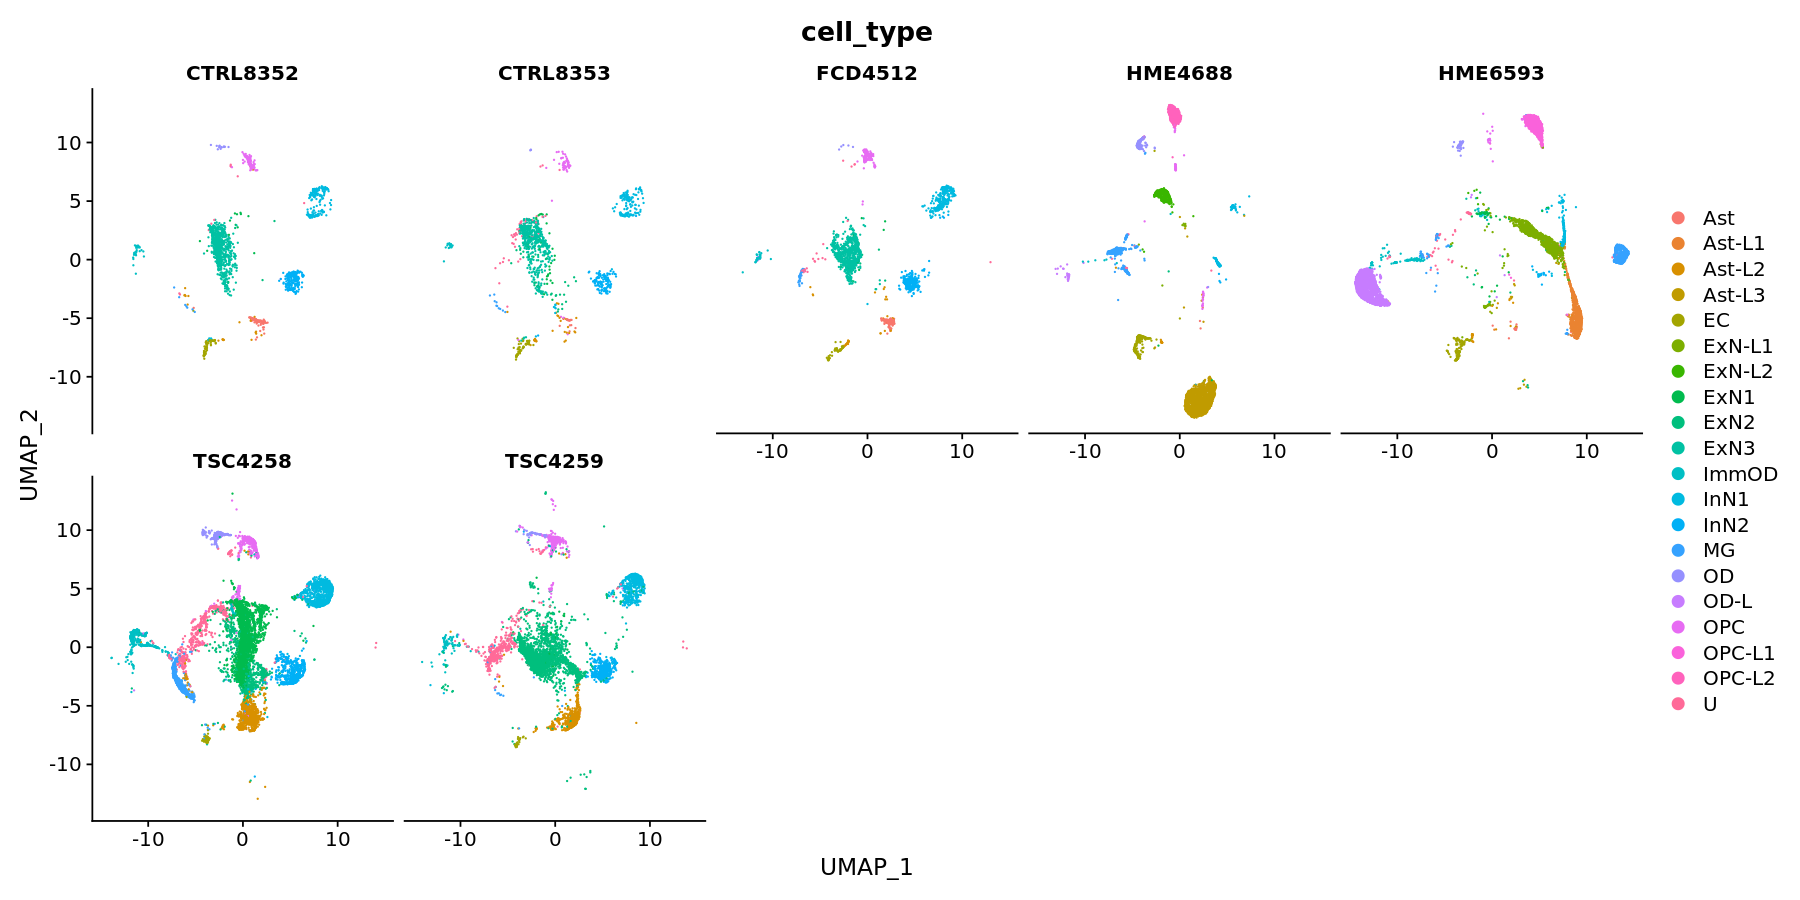

In [4]:
options(repr.plot.width=15, repr.plot.height=7.5)
DimPlot(object = df0,
        ncol = 5, 
        reduction = "umap", 
        group.by = c('cell_type'),
        split.by = c('orig.ident'),
        label = F,
        pt.size = 0.01,
        label.size = 5)

In [15]:
saveRDS(df0,"SeuratObject.rds")

In [30]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

# celltypeMarker

In [3]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.01,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('CAMK2A',
                        'SYT1' ,'RBFOX3','CUX2','SATB2','RORB','TLE4','GAD1',
                                'GAD2','GFAP','SLC1A2','SLC1A3', 
                               'MMD2','OLIG1','OLIG2','MOBP','PLP1','PDGFRA',
                              'PTPRC','SPI1','SALL1',
                             'ABCG2','ID1',
                           'FGFR1','FGFR2','FGFR3','EGFR','PDGFRB',
                        'YWHAH','YWHAG',"RAB3A",
                                 'VIM','GAPDH','ACTG1','MLPH','COL1A2','FN1','PLAC8',
                    'CLDN11','NPY','THBS4','CD44','GJA1','CDK1','SOX11','SYT1','CLDN5','KCNJ8',
                        'TMEM119','PLAC8','PF4','CD209','S100A9','AQP4','APOE','COL9A1','CACNA1C'))

Warning message in rm(plist):
“object 'plist' not found”
Warning message in FeaturePlot(df0, slot = "data", pt.size = 0.01, reduction = "umap", :
“All cells have the same value (0.693147180559945) of CD209.”


In [4]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 10,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for pa

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing 

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



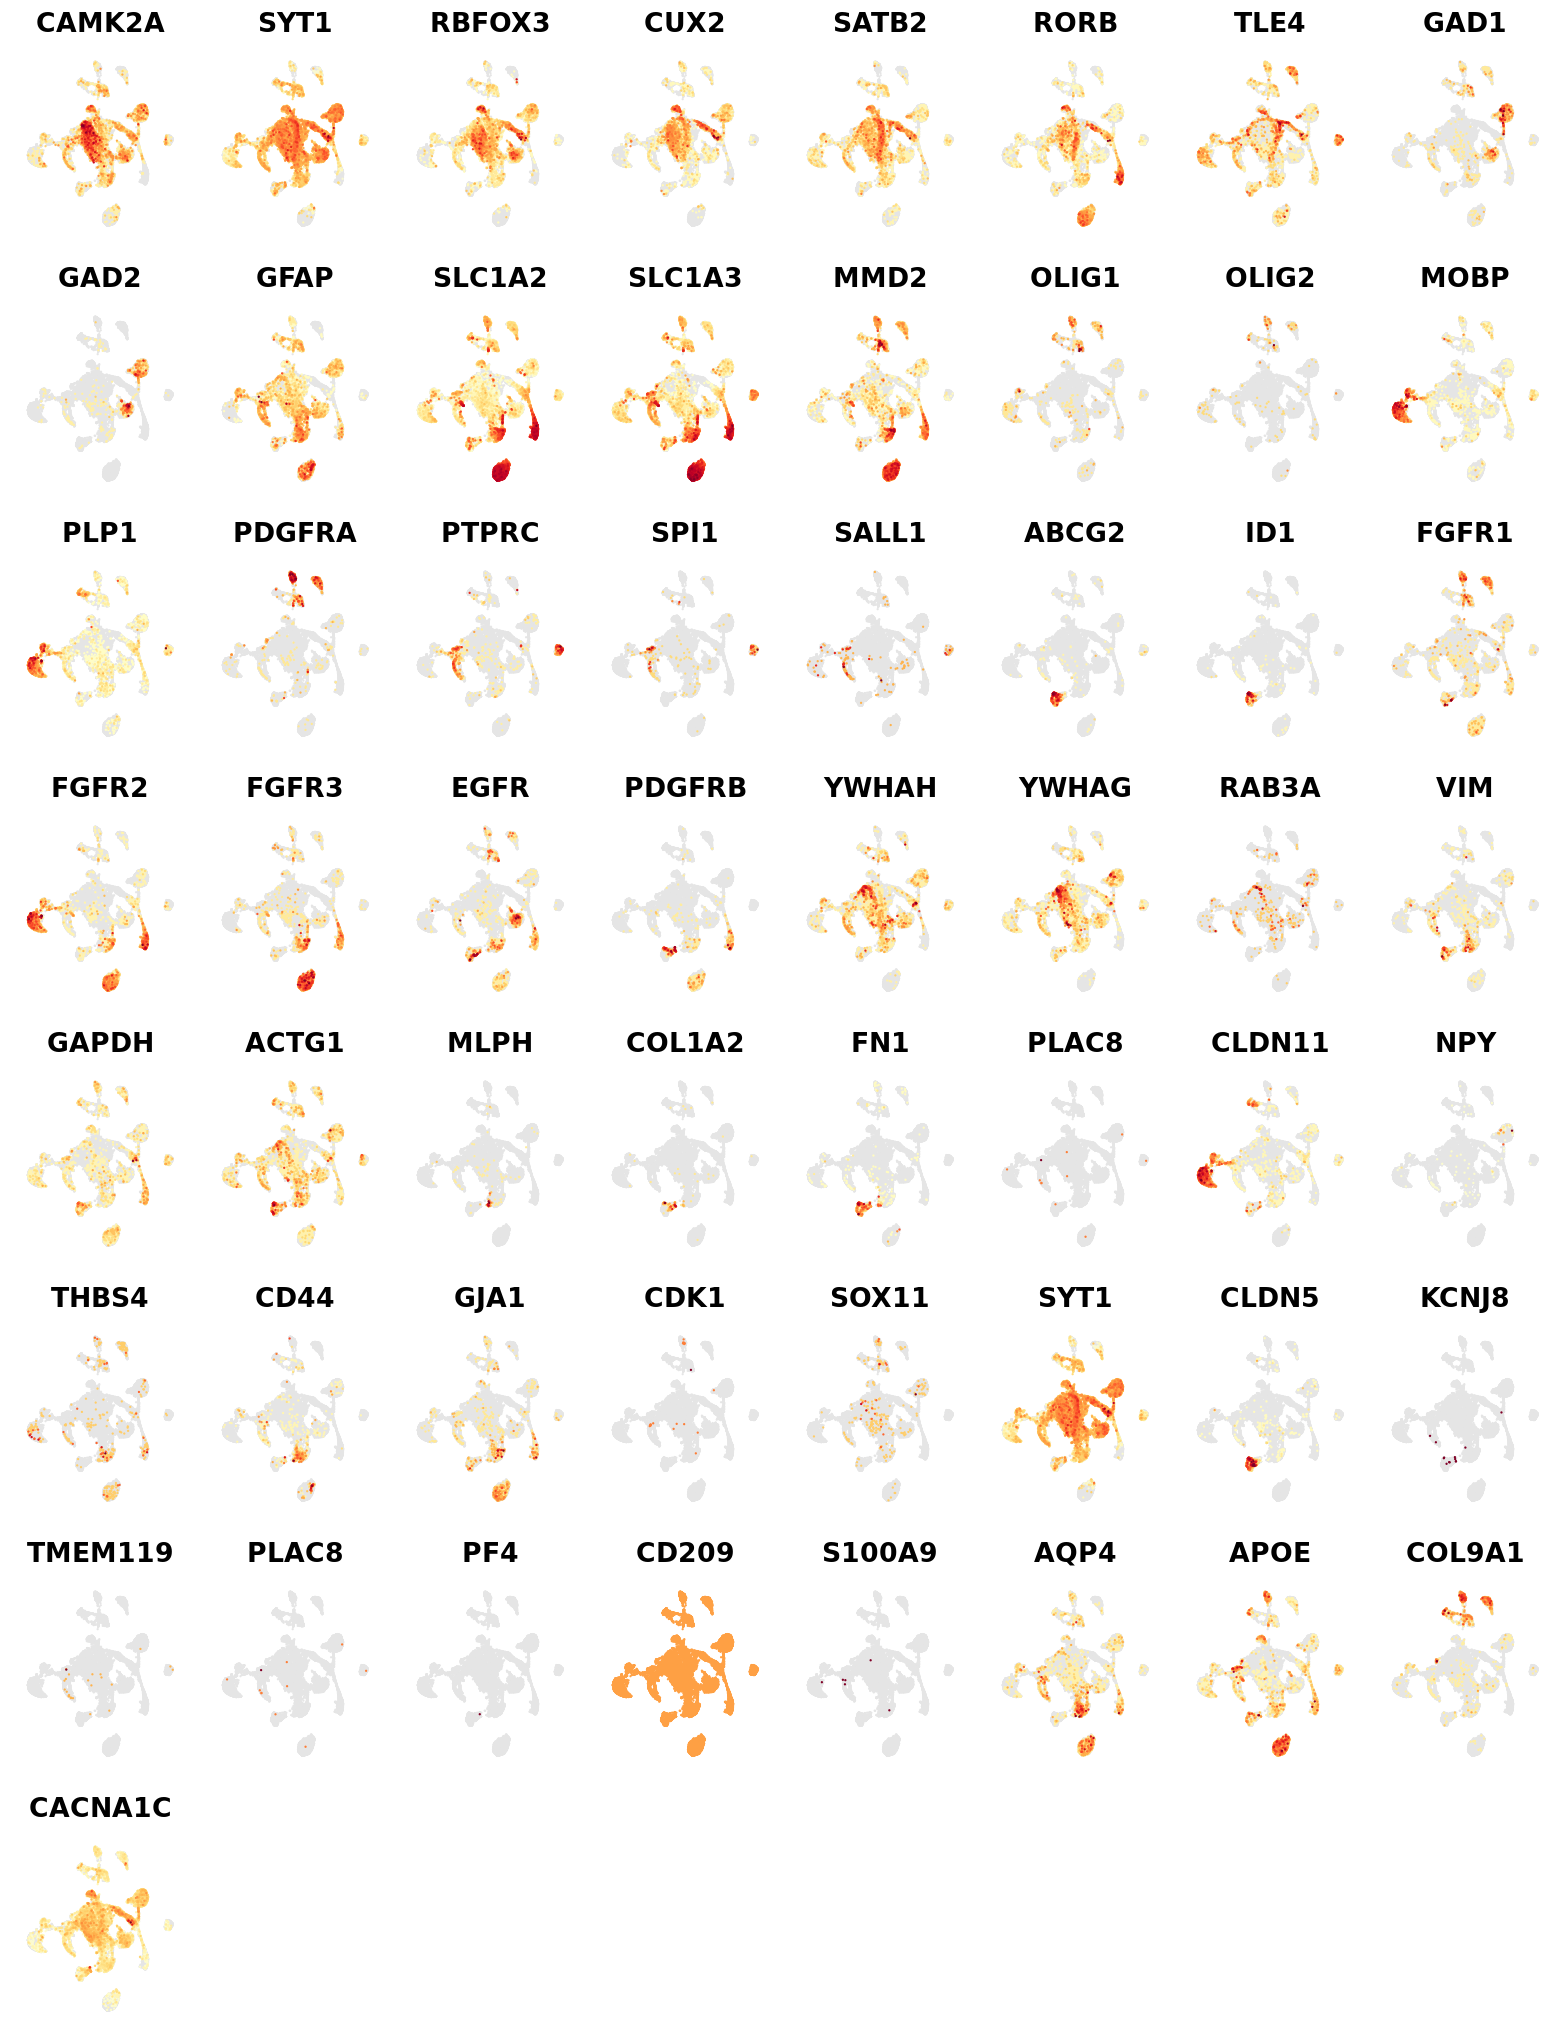

In [5]:
options(repr.plot.width=13, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)

In [14]:
pdf("CellTypeMarkers_UMAP.pdf",width=13,height=17)
options(repr.plot.width=13, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)
dev.off()

png 
  2

# dotplot with known markers

In [7]:
markers<-c('CLDN11','NPY','THBS4','CD44','GJA1','CDK1','SOX11','SYT1','CLDN5','KCNJ8','BCAS1',
'TMEM119','PLAC8','PF4','CD209','S100A9','AQP4','RBFOX3',
'CUX2','SATB2','RORB','TLE4','GAD1','YWHAH','YWHAG',"B4GAT1","RAB3A",
'VIM','SELENOW','GAPDH','ACTG1','MLPH','COL1A2','FN1','PLAC8','SPI1','SALL1','ABCG2','ID1',
                             'FGFR1','FGFR2','FGFR3','EGFR','PDGFRB',
          'SYT1' ,'RBFOX3','CUX2','SATB2','RORB','TLE4','GAD1',
                                'GAD2','GFAP','SLC1A2','SLC1A3', 
                               'MMD2','OLIG1','OLIG2','MOBP','PLP1','PDGFRA',
                              'PTPRC','SPI1','SALL1',
                             'ABCG2','ID1',
                           'FGFR1','FGFR2','FGFR3','EGFR','PDGFRB',
                        'YWHAH','YWHAG',"B4GAT1","RAB3A",
                                 'VIM','SELENOW','GAPDH','ACTG1','MLPH','COL1A2','FN1','PLAC8',
                    'CLDN11','NPY','THBS4','CD44','GJA1','CDK1','SOX11','SYT1','CLDN5','KCNJ8',
                        'TMEM119','PLAC8','PF4','CD209','S100A9','AQP4')

In [8]:
Idents(df0)<-"cell_type"

In [9]:
markers

[1] "CLDN11"  "NPY"     "THBS4"   "CD44"    "GJA1"    "CDK1"    "SOX11"  
 [8] "SYT1"    "CLDN5"   "KCNJ8"   "BCAS1"   "TMEM119" "PLAC8"   "PF4"    
[15] "CD209"   "S100A9"  "AQP4"    "RBFOX3"  "CUX2"    "SATB2"   "RORB"   
[22] "TLE4"    "GAD1"    "YWHAH"   "YWHAG"   "B4GAT1"  "RAB3A"   "VIM"    
[29] "SELENOW" "GAPDH"   "ACTG1"   "MLPH"    "COL1A2"  "FN1"     "PLAC8"  
[36] "SPI1"    "SALL1"   "ABCG2"   "ID1"     "FGFR1"   "FGFR2"   "FGFR3"  
[43] "EGFR"    "PDGFRB"  "SYT1"    "RBFOX3"  "CUX2"    "SATB2"   "RORB"   
[50] "TLE4"    "GAD1"    "GAD2"    "GFAP"    "SLC1A2"  "SLC1A3"  "MMD2"   
[57] "OLIG1"   "OLIG2"   "MOBP"    "PLP1"    "PDGFRA"  "PTPRC"   "SPI1"   
[64] "SALL1"   "ABCG2"   "ID1"     "FGFR1"   "FGFR2"   "FGFR3"   "EGFR"   
[71] "PDGFRB"  "YWHAH"   "YWHAG"   "B4GAT1"  "RAB3A"   "VIM"     "SELENOW"
[78] "GAPDH"   "ACTG1"   "MLPH"    "COL1A2"  "FN1"     "PLAC8"   "CLDN11" 
[85] "NPY"     "THBS4"   "CD44"    "GJA1"    "CDK1"    "SOX11"   "SYT1"   
[92] "CLDN5"   "KCNJ8"   "TMEM119" "PLAC8"   "PF4"     "CD209"   "S100A9" 
[99] "AQP4"

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: SELENOW, B4GAT1”


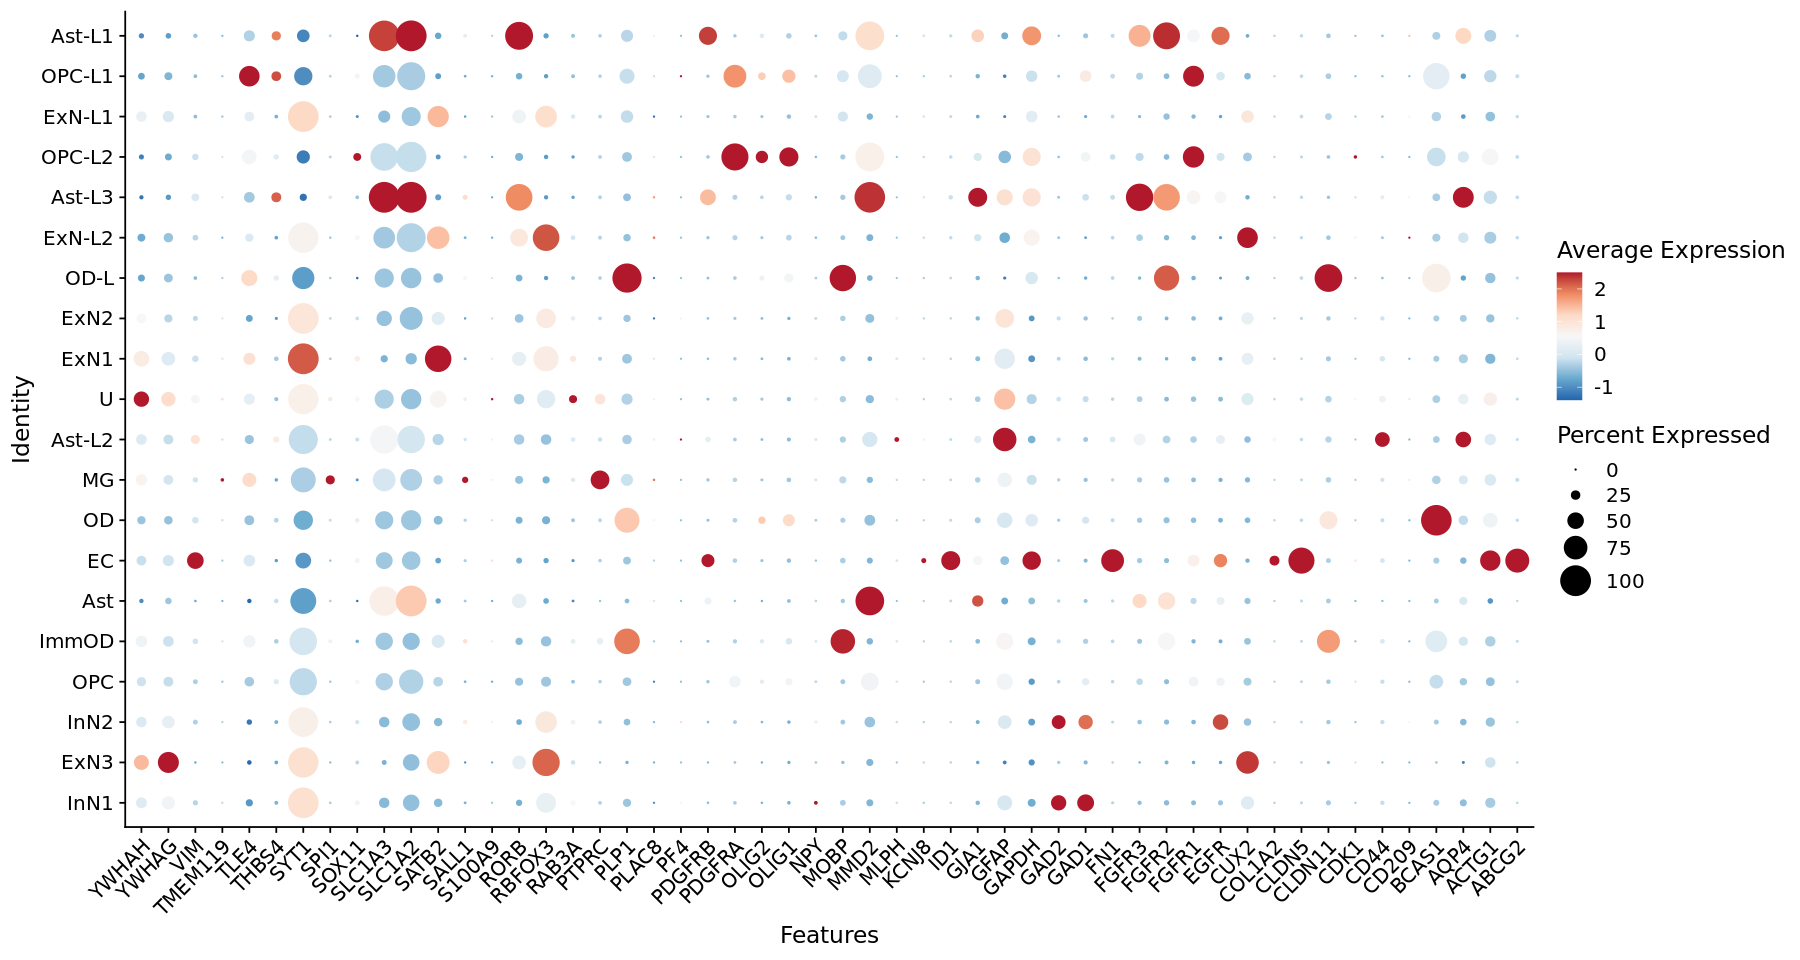

In [10]:
options(repr.plot.width=15, repr.plot.height=8)
markers.to.plot <- sort(unique(markers))
DotPlot(df0, features = rev(markers.to.plot), cols = c("RdBu"), dot.scale = 8) + RotatedAxis()

# DEG for identify celltypes

In [23]:
plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df0,
                      # min.diff.pct = 0.3,
                      slot = 'data',
                      #features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1,
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)
plan(strategy = "sequential")

In [24]:
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

In [25]:
DEX <- DEX[!(duplicated(DEX$gene)),]

In [26]:
top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

In [27]:
pdf(file = "./FinAllMarkers_heatmap.pdf",
    width = 5, height = 4, useDingbats = F);
DoHeatmap(df0,
          disp.min = -1,
          disp.max = 1,
#           slot = 'data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()

Warning message in DoHeatmap(df0, disp.min = -1, disp.max = 1, features = top10$gene, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: POLR2J3, CEP350, CNTFR, DDX24, GRK4, TMEM120B, BEND6, ABCA9, PNKD, ATP13A2, MROH1, GLRA2, CORO6, VGF, LRIG2, SMARCA4, ZNF577, TUBB4A, ZNF611, TPCN2, PARD6G, CHST3, E2F3, TM7SF3, CENPJ, LCORL, KIF21A, RCC2, ZNF124, PLEC, AKAP8L, C2orf15, KLHL22, LHFPL4, SULT1A1, BRSK2, YPEL1, LGI4, LTBP4, SPG7, MARCKSL1, TRIB2, COL9A3, ARL4A, LRRK2, HSPA8, CFL1, CALM3, THY1, TPI1, MTCH1, RAB3A, ABCA3, FBXL2, PLD3, SHANK1, PKD1, STRC, FAM153A, ZMAT1, CELF5, SCN3A, DYNC1I1”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [28]:
write.csv(DEX, "DEX.csv")

# Assign cell type

In [37]:
df0@meta.data$cell_type <- "NA"

In [3]:
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('2','22')] <- 'InN1'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('7')] <- 'InN2'

df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('6')] <- 'Ast-L2'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('23')] <- 'Ast'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('3')] <- 'Ast-L3'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('12')] <- 'Ast-L1'

df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('9')] <- 'OPC'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('13')] <- 'OPC-L1'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('15')] <- 'OPC-L2'


df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('5')] <- 'OD-L'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('20','21')] <- 'ImmOD'

df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('14')] <- 'OD'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('11')] <- 'U'

df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('10','17','19')] <- 'MG'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('16')] <- 'EC'

df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('0')] <- 'ExN1'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('1')] <- 'ExN2'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('4')] <- 'ExN3'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('8')] <- 'ExN-L1'
df0@meta.data$cell_type[df0@meta.data$seurat_clusters %in% c('18')] <- 'ExN-L2'

In [36]:
unique(df0@meta.data$cell_type)

[1] "InN1"   "ExN3"   "InN2"   "OPC"    "ImmOD"  "Ast"    "EC"     "OD"    
 [9] "MG"     "Ast-L2" "U"      "ExN1"   "ExN2"   "OD-L"   "ExN-L2" "Ast-L3"
[17] "OPC-L2" "ExN-L1" "OPC-L1" "Ast-L1"

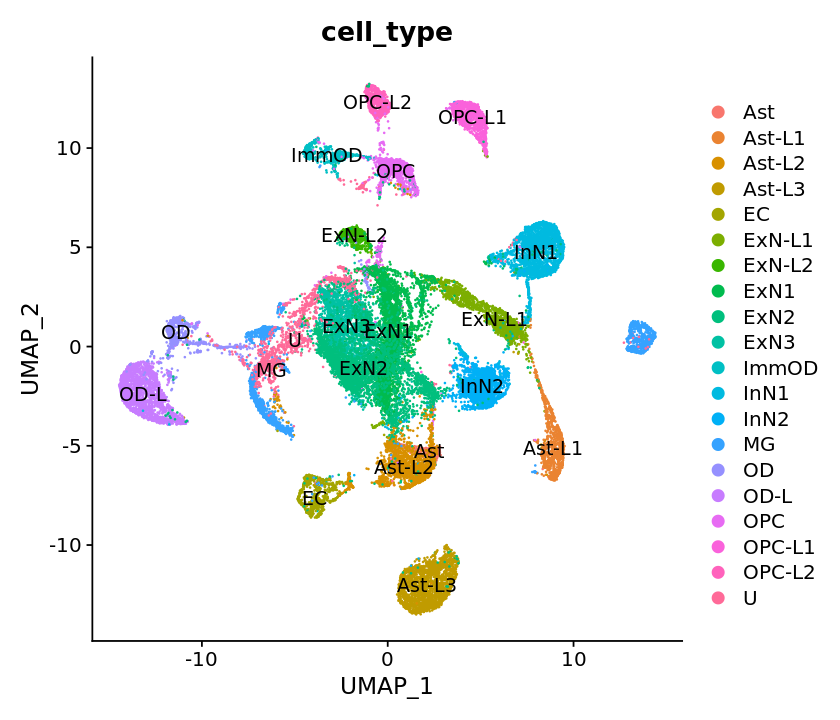

In [14]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(df0,reduction = 'umap',pt.size=0.1, group.by =c('cell_type'),label = T)

In [5]:
saveRDS(df0,"SeuratObject.rds")

In [5]:
Idents(df0) <- "cell_type"
plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df0,
                      # min.diff.pct = 0.3,
                      slot = 'data',
                      #features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1,
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)
plan(strategy = "sequential")

DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

DEX <- DEX[!(duplicated(DEX$gene)),]

top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

pdf(file = "./FinAllMarkers_heatmap_celltype.pdf",
    width = 5, height = 4, useDingbats = F);
DoHeatmap(df0,
          disp.min = -1,
          disp.max = 1,
#           slot = 'data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()
write.csv(DEX, "DEX_celltype.csv")

Warning message in DoHeatmap(df0, disp.min = -1, disp.max = 1, features = top10$gene, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: FAM168A, PACS1, IQCA1, PPP1R12A, CNNM2, BTRC, ATP2B4, DROSHA, MTCH2, SLC25A27, MYH14, CHCHD6, UPK3B, COLQ, AACS, FBXL2, LRRC37A2, SHANK1, MPP7, FAM153A, LRRK2, C3orf70, SDC3, COL9A3, SPRY4, ECHDC2, AIFM3, TTYH1, AKAP8L, C2orf15, KLHL22, LHFPL4, SULT1A1, BRSK2, PKD1, YPEL1, LGI4, LTBP4, PPP2R3A, JPH4, SYT7, CSMD2, SCN3A, DYNC1I1, NAP1L1, DYNC1H1, THY1, MTCH1, STMN1, SRSF11, SEC62, AHCYL1”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [106]:
saveRDS(df0,"./SeuratObject.rds")

# group proportion in each cluster

In [40]:
tmp <- table(df0@meta.data$cell_type, df0@meta.data$disease) 
tmp_col<-colSums(tmp)
len<-length(unique(df0@meta.data$cell_type))

In [41]:
tmp

        
         CTRL  FCD  HME  TSC
  Ast      93  194   27    2
  Ast-L1    0    0 1043    0
  Ast-L2   57   42   80 1790
  Ast-L3    0    0 2206    0
  EC      140   55  436  117
  ExN-L1    0    0 1623    0
  ExN-L2    0    0  546    0
  ExN1     46    6   75 3534
  ExN2     55   16   17 3500
  ExN3   1354  808    4    7
  ImmOD    49   43  163  730
  InN1    383  282  331 1743
  InN2    374  315   22 1096
  MG       17   31 1187 1183
  OD       16    5  366  375
  OD-L      0    8 2036    1
  OPC     194  211  101 1004
  OPC-L1    0    0 1022    0
  OPC-L2    0    0  761    0
  U        61   27   72 1124

In [42]:
tmp[1:len,1]<-tmp[1:len,1]/tmp_col[1]
tmp[1:len,2]<-tmp[1:len,2]/tmp_col[2]

In [97]:
tmp

           
                    CTRL          TSC
  Ast       0.0425394779 0.0760059613
  Ast-L4    0.0003222688 0.0128708847
  ExN_CUX2  0.2929423139 0.1235604932
  ExN_RORB  0.1869158879 0.2383145915
  ExN_SATB2 0.0377054463 0.1297927110
  ExN_TLE4  0.0380277151 0.1022896626
  ExN-L2    0.0019336126 0.0353610622
  ExN-U     0.0000000000 0.0052838369
  ImmN      0.0370609088 0.0013548300
  InN       0.2771511441 0.2253082238
  MG        0.0058008379 0.0108386398
  Neu-L     0.0048340316 0.0033870749
  OD        0.0103126007 0.0002709660
  OD_BCAS1  0.0041894940 0.0074515648
  OD-L2     0.0003222688 0.0070451158
  OPC       0.0599419916 0.0208643815

# DEGs in each cluster

In [61]:
#df0<-readRDS("SeuratObject.rds")
hvg <- VariableFeatures(df0)

df0
Idents(df0) <- 'cell_type'
plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df0,
                      # min.diff.pct = 0.3,
                      slot = 'data',
                      features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1,
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)
plan(strategy = "sequential")

DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

DEX <- DEX[!(duplicated(DEX$gene)),]

top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

pdf(file = "./FinAllMarkers_heatmap_celltype.pdf",
    width = 5, height = 4, useDingbats = F);
DoHeatmap(df0,
          disp.min = -1,
          disp.max = 1,
#           slot = 'data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()

write.csv(DEX, "DEX_celltype.csv")

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [10]:
celltypelist <- unique(df0@meta.data$cell_type)
hvg <- VariableFeatures(df0)

In [14]:
df0

An object of class Seurat 
16534 features across 16736 samples within 1 assay 
Active assay: RNA (16534 features, 5000 variable features)
 2 dimensional reductions calculated: pca, umap

In [11]:
celltypelist

[1] "InN"        "ExN"        "OPC"        "Olig"       "U-YWHAH+"  
 [6] "ExN_UP"     "U-PDGFRB+"  "U-THEMIS+"  "MG"         "U-MG+c13?" 
[11] "U-OPC-L"    "U-ACAN+"    "U-MG+Olig?"

In [12]:
Idents(df0) <- 'cell_type'

In [16]:
DEX_FCD <- lapply(celltypelist,function(xx){
    n <- min(table(df0@meta.data$disease[df0@meta.data$cell_type == xx]))
    res <- FindMarkers(
      df0,
        max.cells.per.ident = n,
      ident.1 = 'TSC',
      ident.2 = 'CTRL',
        subset.ident = xx,
      group.by = "disease",
      slot = "data",
      reduction = NULL,
      features = hvg,
#       logfc.threshold = log(2),
      verbose = FALSE,
      only.pos = FALSE,
    )
    res$gene <- rownames(res)
#     res <- res %>%
#         filter(p_val_adj < 0.01)
    res$cluster <- xx
    return(res)
})

ERROR: Error in ValidateCellGroups(object = object, cells.1 = cells.1, cells.2 = cells.2, : Cell group 2 has fewer than 3 cells


In [ ]:
DEX_all_TSC <- do.call("rbind", DEX_FCD)

In [ ]:
write.csv(DEX_all_TSC, "DEX_between_condition.csv")

In [ ]:
df <- do.call("rbind", DEX_FCD)

In [ ]:
head(DEX_all_TSC)

In [80]:
head(df)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     gene   cluster
TSPYL1 3.418379e-167 -1.986761  0.145 0.869 5.651948e-163 TSPYL1 InN    
JUND   9.143785e-161 -1.971960  0.110 0.827 1.511833e-156 JUND   InN    
HSPA1B 8.108243e-118 -1.359760  0.018 0.577 1.340617e-113 HSPA1B InN    
VAMP2  2.048857e-116 -1.447492  0.195 0.799 3.387581e-112 VAMP2  InN    
TSPYL4 9.653884e-113 -1.327420  0.063 0.627 1.596173e-108 TSPYL4 InN    
TTYH3  1.436239e-109 -1.301836  0.096 0.667 2.374678e-105 TTYH3  InN

Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 236 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 163 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 96 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 531 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 82 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 211 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 219 unlabeled data points (too many overlaps). Consider increasin

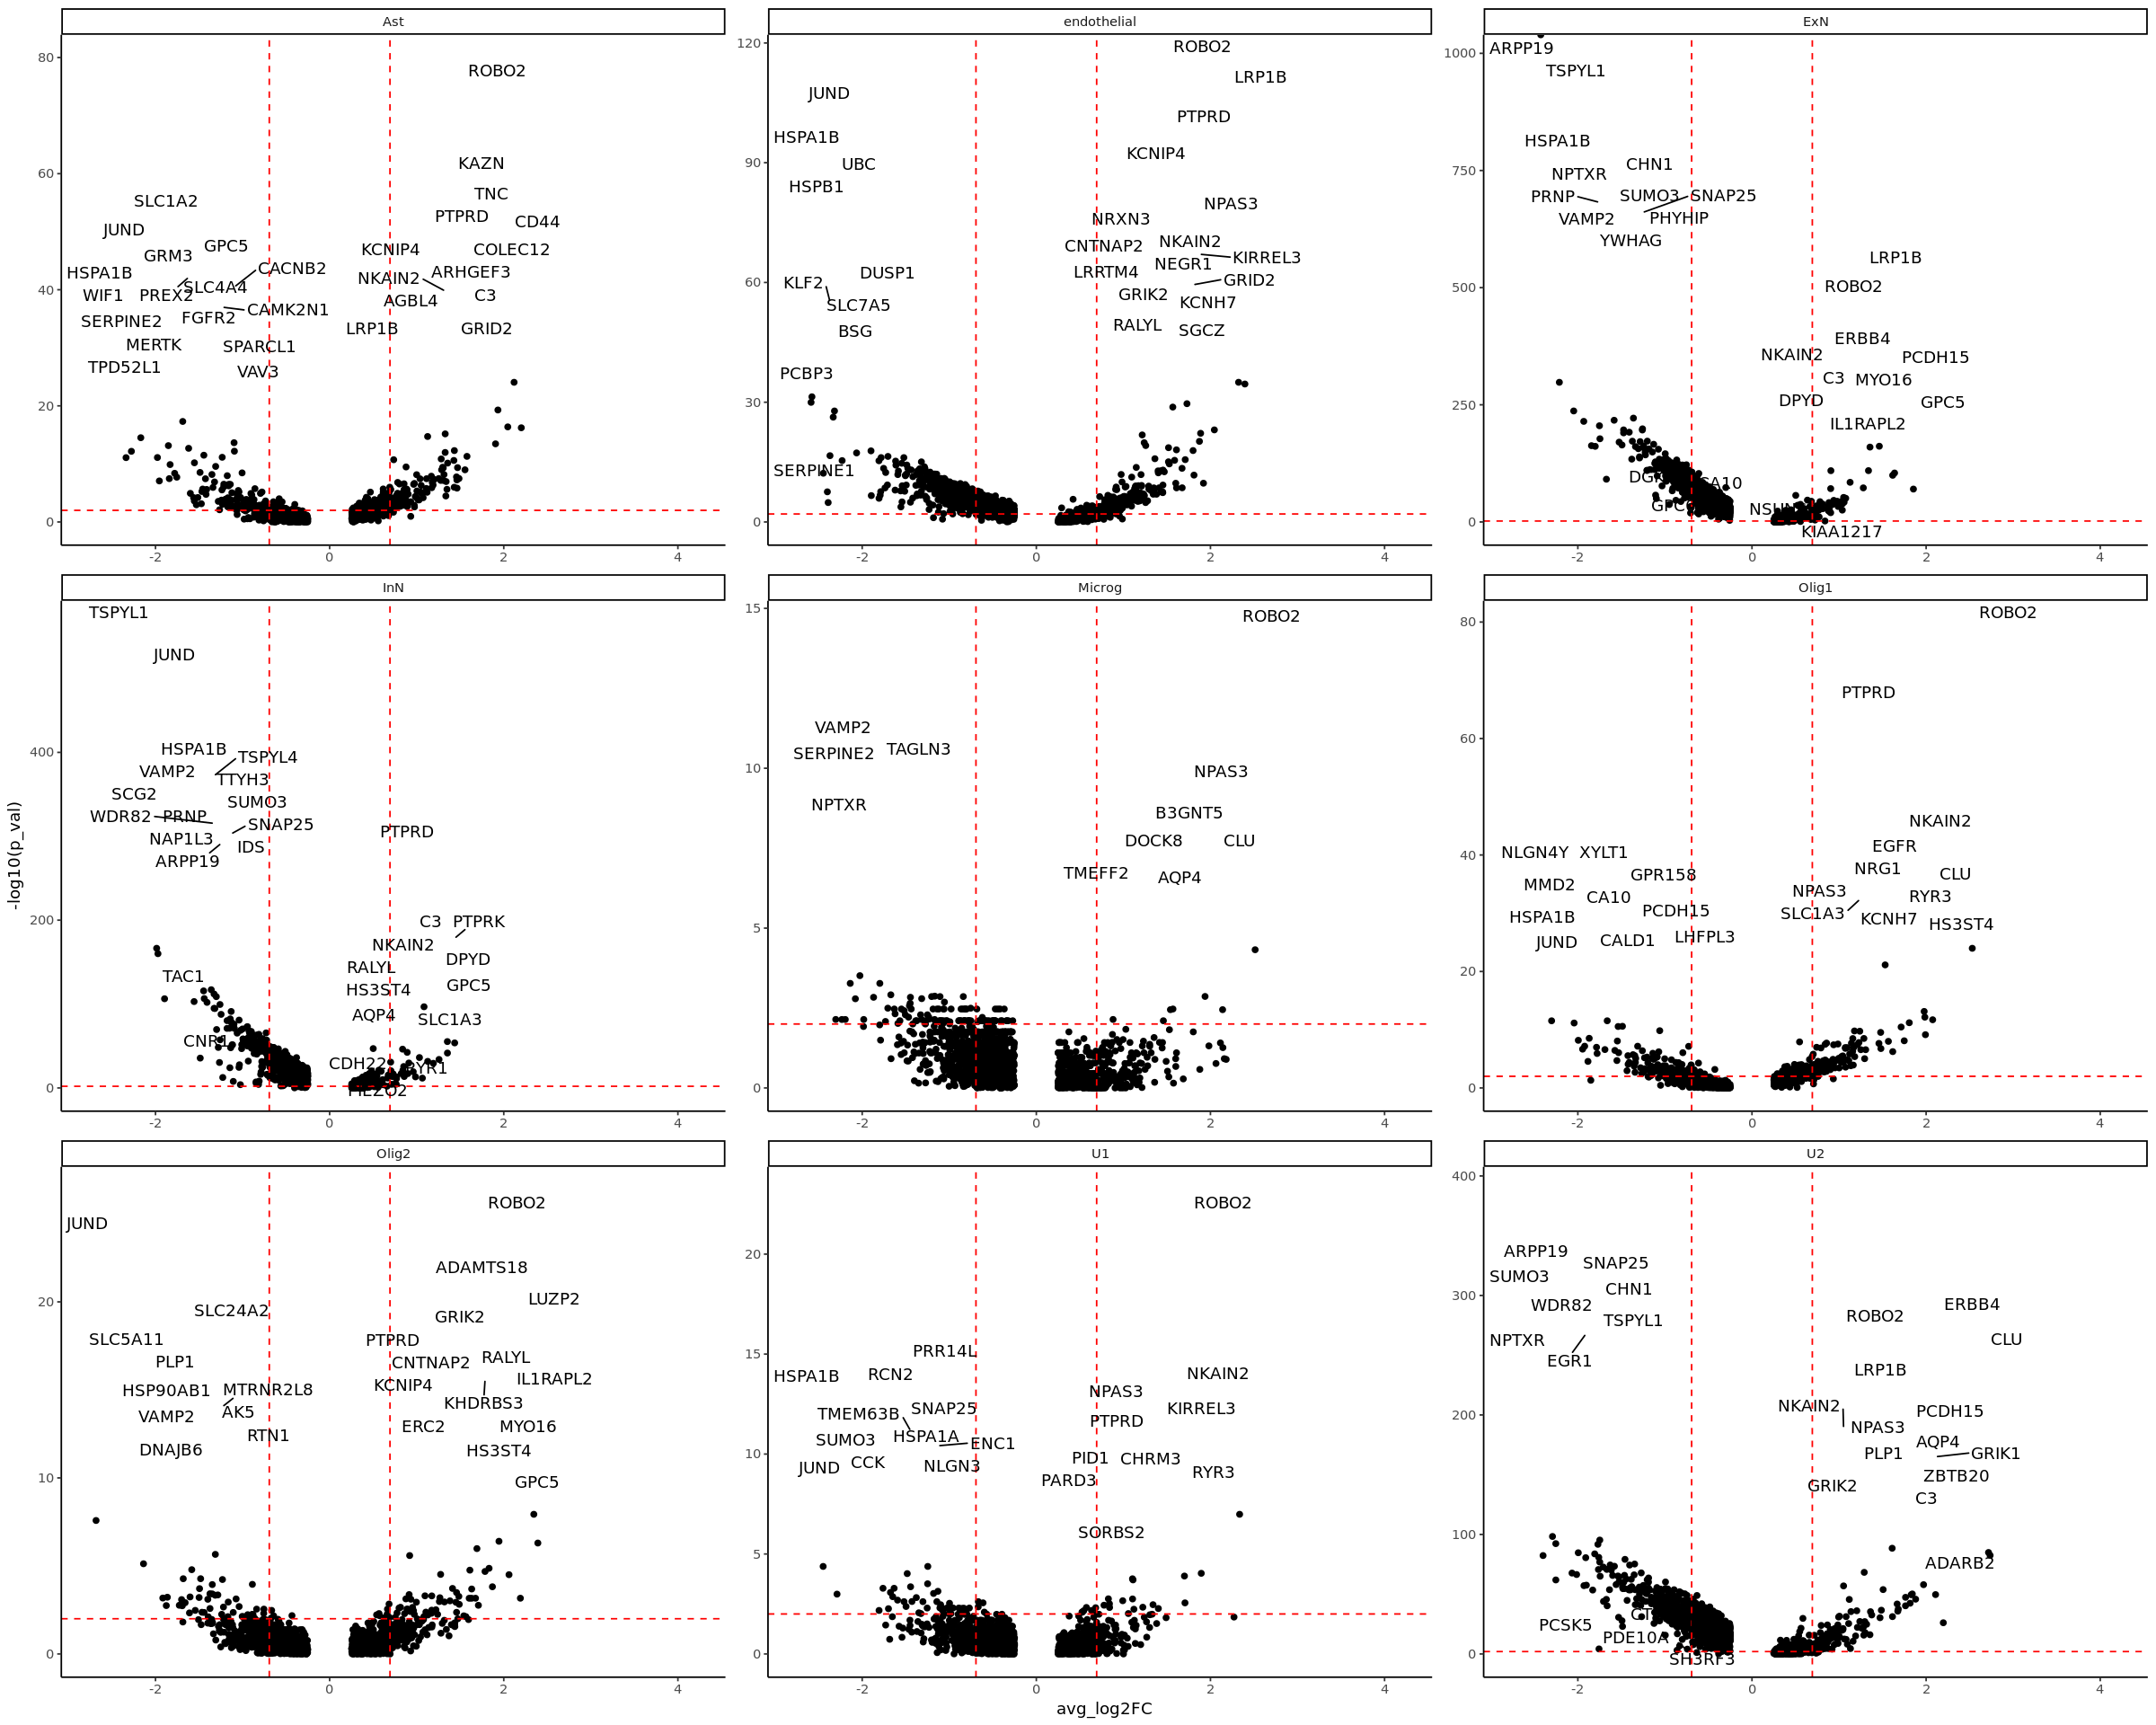

In [81]:
options(repr.plot.width=20, repr.plot.height=16)
ggplot(DEX_all_TSC, aes(x = avg_log2FC, y = -log10(p_val))) +
    geom_point() +
    xlim((0-abs(max(DEX_all_TSC$avg_log2FC))),(0+max(abs(DEX_all_TSC$avg_log2FC)))) +
    geom_hline(yintercept = -log10(0.01), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = log(2), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = -log(2), linetype = 'dashed', color = "red") +
    geom_text_repel(data = subset(DEX_all_TSC, abs(avg_log2FC) >= log(2) & p_val < 0.01),
             aes(x = avg_log2FC, y = -log2(p_val), label = gene)) +
    facet_wrap(~cluster,scales = 'free') +
    theme_classic()

Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 236 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 163 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 96 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 531 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 82 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 53 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 211 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 218 unlabeled data points (too many overlaps). Consider increasin

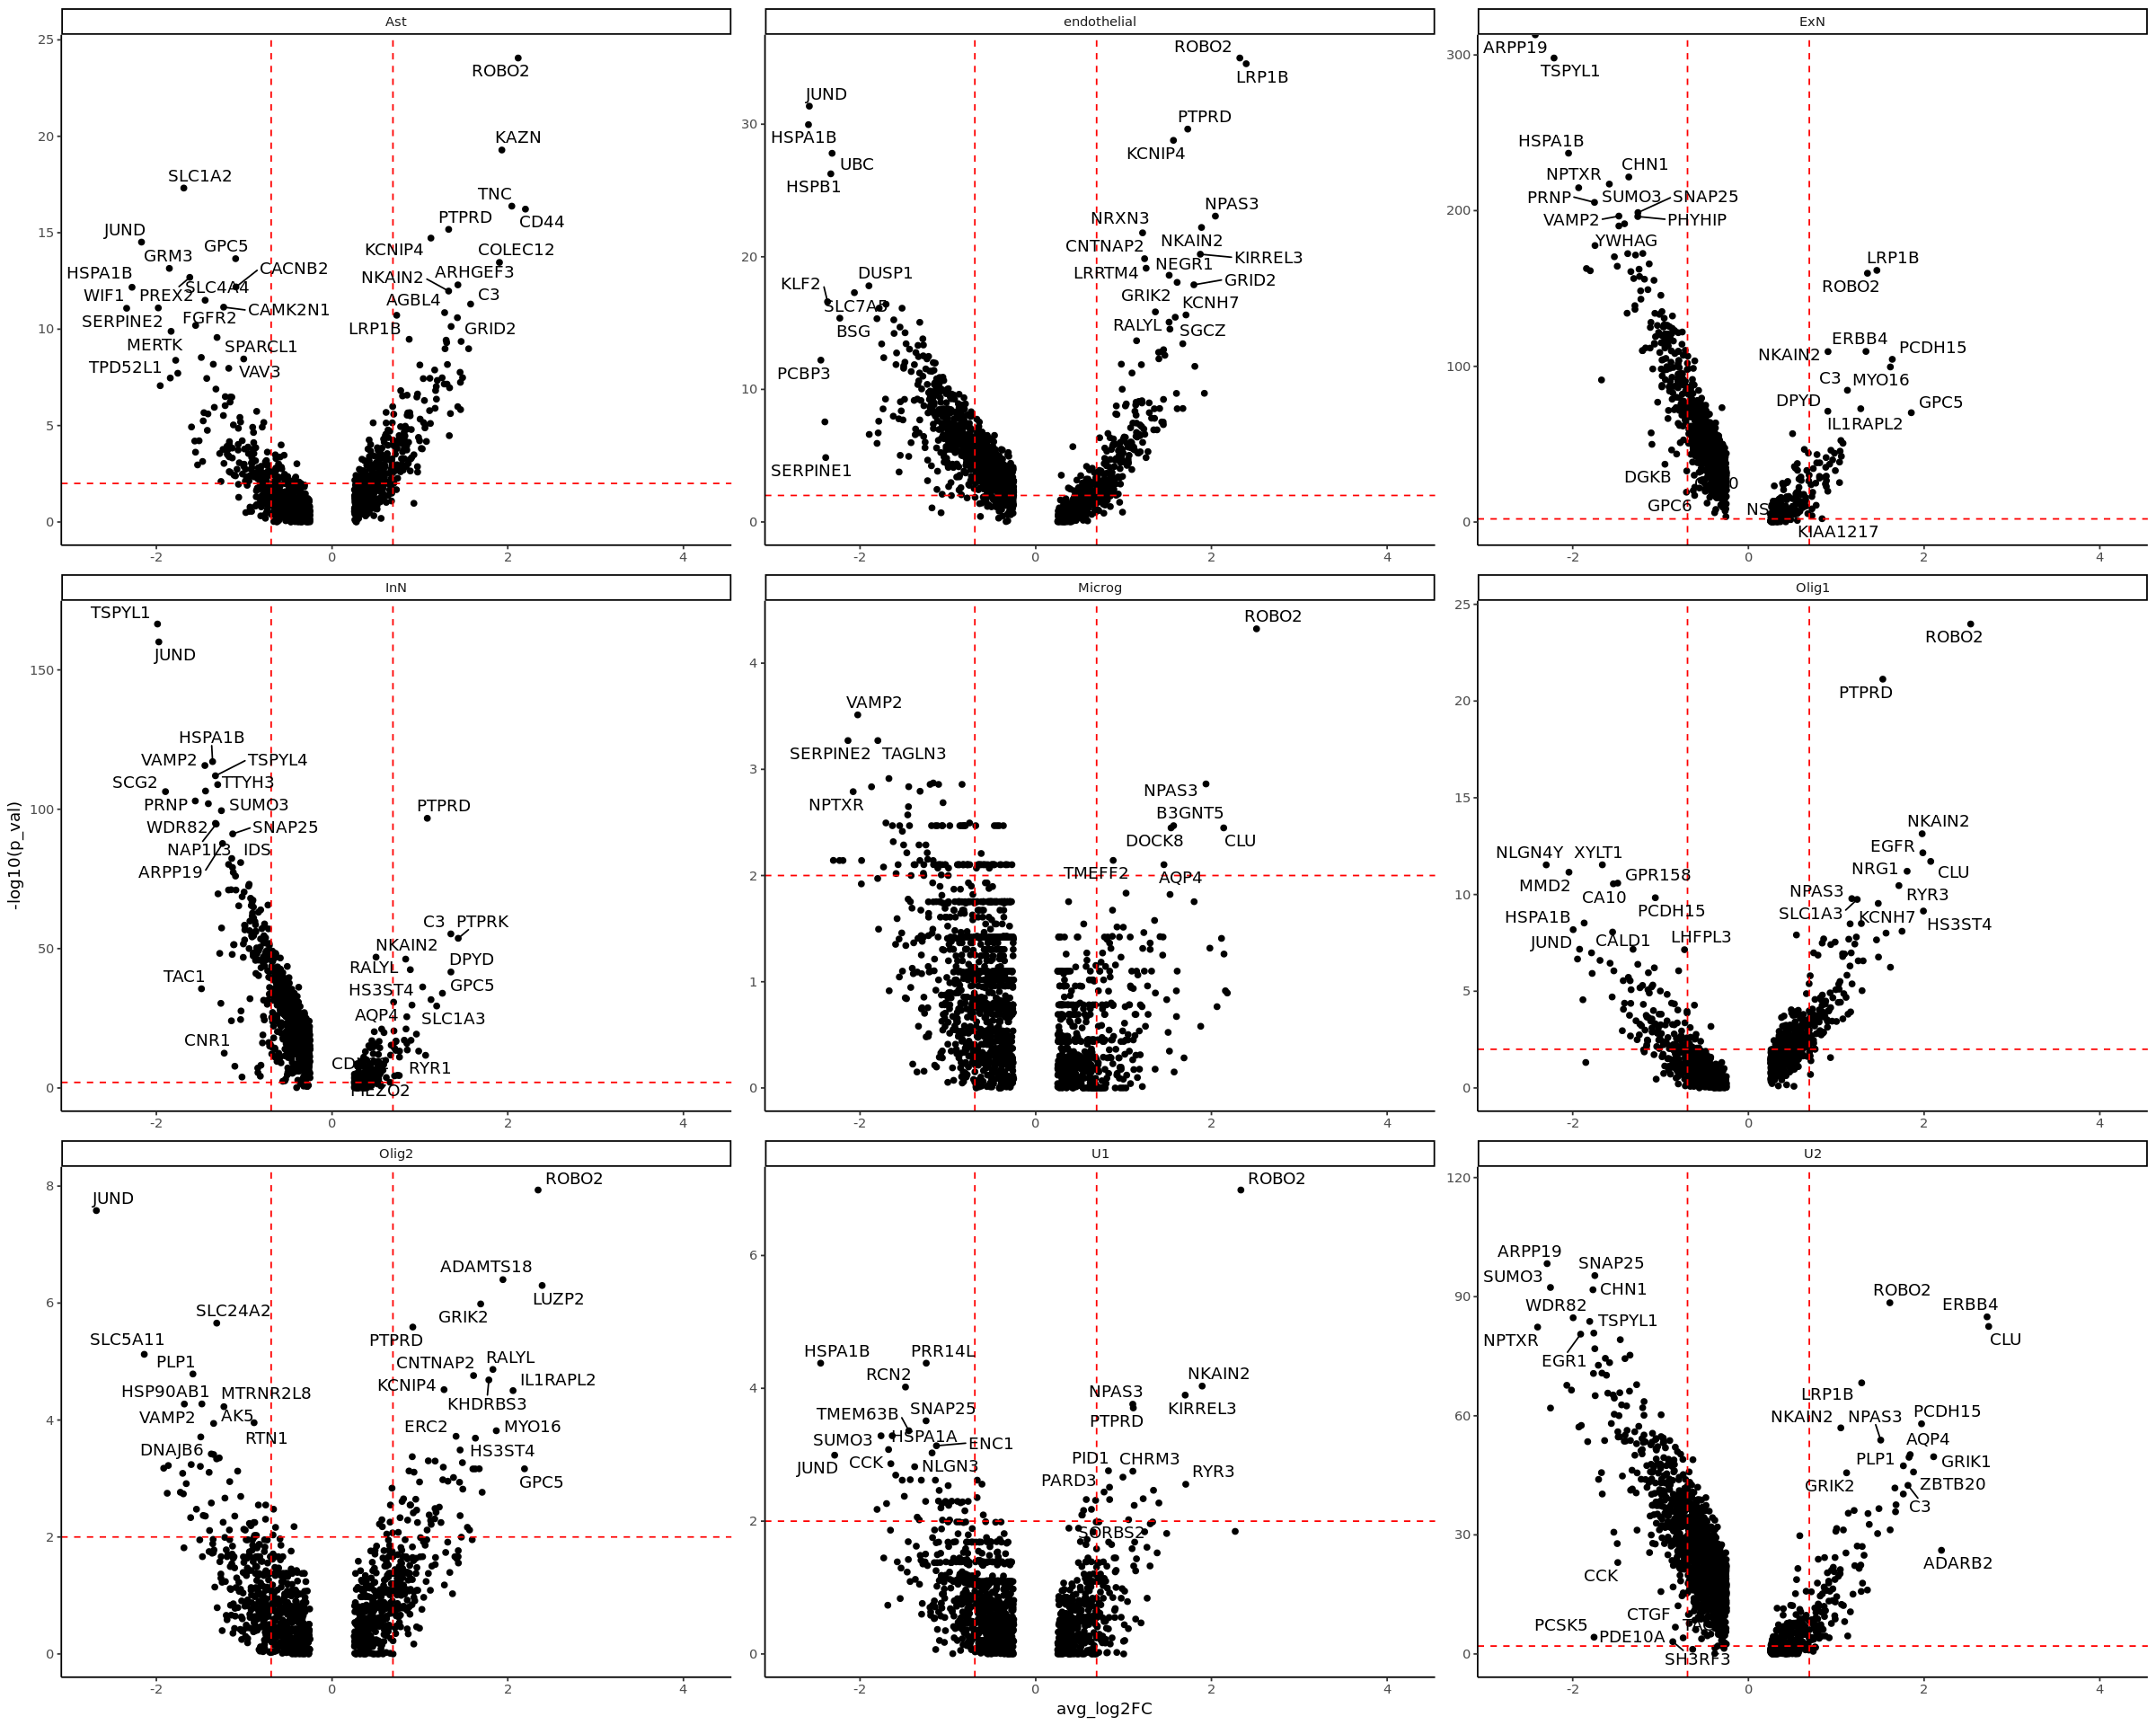

In [82]:
options(repr.plot.width=20, repr.plot.height=16)
ggplot(df, aes(x = avg_log2FC, y = -log10(p_val))) +
    geom_point() +
    xlim((0-abs(max(df$avg_log2FC))),(0+max(abs(df$avg_log2FC)))) +
    geom_hline(yintercept = -log10(0.01), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = log(2), linetype = 'dashed', color = "red") +
    geom_vline(xintercept = -log(2), linetype = 'dashed', color = "red") +
    geom_text_repel(data = subset(df, abs(avg_log2FC) >= log(2) & p_val < 0.01),
             aes(x = avg_log2FC, y = -log10(p_val), label = gene)) +
    facet_wrap(~cluster,scales = 'free') +
    theme_classic()

In [83]:
pdf("UMAPs2.pdf",width=15, height=4.5)
options(repr.plot.width=15, repr.plot.height=4.5
       )
DimPlot(object = df0,
        ncol = 5, 
        reduction = "umap", 
        group.by = c('disease'),
        split.by = c('orig.ident'),
        label = F,
        pt.size = 0.5,
        label.size = 5)
dev.off()

png 
  2

# WGCNA

In [5]:
df0 <- readRDS("SeuratObject.rds")

In [67]:
DefaultAssay(df0) <- "SCT"

In [7]:
df0 <- FindVariableFeatures(object = df0,
                            selection.method = "vst", 
                            nfeatures = 3000)

In [69]:
hvg <- VariableFeatures(df0)

In [71]:
plan(strategy = "multicore")
df0 <- ScaleData(object = df0, 
                 features =hvg,
                 vars.to.regress = c('nCount_RNA','nFeature_RNA','percent.mt','orig.ident','disease'),
                 block.size = 20000,
                 verbose = F)
plan(strategy = "sequential")

In [68]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [143]:
df0@assays$RNA

Assay data with 16762 features for 33206 cells
Top 10 variable features:
 ITM2A, ABCB1, FLT1, IFI27, ATP10A, RGS5, EBF1, SLC7A5, CLDN5, B2M 

In [72]:
options(stringsAsFactors = F)
rExpr <- t( as.matrix(df0@assays$SCT@scale.data[hvg,] ))  # only use variable genes in analysis

In [73]:
rExpr

ABCB1         FLT1         SLC1A2       ADARB2     
CTRL_AAACCCACAAATGGAT-1 -0.5337880098 -0.61819116   0.141556293 -0.82872008
CTRL_AAACCCAGTTGTAGCT-1 -0.5590707111 -0.60949240  -0.572254533 -0.78723893
CTRL_AAACCCATCGAAGCAG-1 -0.5683111886 -0.58225815  -0.415539420 -0.68401653
CTRL_AAACGAAAGCTTTCCC-1 -0.4456150213 -0.45721168  -0.451853820  3.02393310
CTRL_AAACGAAAGGTTCTAC-1  0.1587634939  0.03113038   1.141573640  0.85078010
CTRL_AAACGAACAGTTCCAA-1  0.0943722335 -0.02184667  -0.046471749  0.50251164
CTRL_AAACGAAGTATTCTCT-1 -0.2267806262  2.73834447  -0.656303678  3.30779260
CTRL_AAACGAAGTTTAGACC-1  0.1913723103  0.05738631  -0.856419050  0.84500780
CTRL_AAACGAATCTGAGATC-1 -0.3909486619 -0.40261490   0.334194083 -0.67543808
CTRL_AAACGCTTCGAAGAAT-1 -0.3750046493 -0.41719428  -0.587728914  3.38474886
CTRL_AAAGAACCACGACTAT-1 -0.2085159399 -0.23897795  -0.547714336 -0.72905784
CTRL_AAAGAACCAGGTACGA-1 -0.0208141576 -0.14259385   0.991207995  0.50114370
CTRL_AAAGGATCACTACTTT-1  0.4853463007  0.32741598   2.535973097  0.45562351
CTRL_AAAGGATGTCAGTTTG-1 -0.3018137617 -0.33828861  -0.526363037 -0.72865871
CTRL_AAAGGGCCAATCAAGA-1 -0.2075547751 -0.25305790  -0.595229488 -0.76201594
CTRL_AAAGTGAGTTCACCGG-1  0.0264654167  5.58603083   0.704037361 -0.91688739
CTRL_AAAGTGATCCATACAG-1 -0.2076194625 -0.31530455   0.807135556 -0.86275436
CTRL_AAATGGAGTTAGCGGA-1 -0.1958157087 -0.26782906  -0.681212052 -0.82035082
CTRL_AAATGGAGTTCTTGCC-1 -0.3050319001 -0.31429999  -0.139410481 -0.49493441
CTRL_AAATGGATCATATGGC-1 -0.6141985734 -0.62518285   0.354753642 -0.68659790
CTRL_AACAACCAGCGTATGG-1  0.4126135545  0.27146387  -0.887157612 -0.90155301
CTRL_AACAAGATCACGATCA-1 -0.2727153983 -0.35415222   0.088096403  0.04330167
CTRL_AACAAGATCCTTCAGC-1 -0.8064379839 -0.78898176   0.495253561 -0.61483844
CTRL_AACAGGGCATTACGGT-1  0.0332911937 -0.04688893   0.004361328 -0.84736846
CTRL_AACCAACTCGCAGATT-1  0.2853282790  0.16127633   2.505702268 -0.02352209
CTRL_AACCACAAGGACAGTC-1  0.3431937527  0.19381088  -0.132835703  0.46625941
CTRL_AACCACACACAGAAGC-1 -0.3780352727 -0.39004280  -0.431027686 -0.67239695
CTRL_AACCATGAGTGTGTTC-1  0.0009856257 -0.10947413  -0.791999827  1.57722462
CTRL_AACCATGCATGGAAGC-1  1.5261456189 -0.27255297  -0.695287061 -0.82865034
CTRL_AACCATGGTGGTCCCA-1  0.2620144635  0.12281433   1.430746205 -0.90914165
⋮                       ⋮             ⋮            ⋮            ⋮          
4259_TTTGACTGTCCAGGTC-1 -0.213458905  -0.114360330  0.2636688    2.72725790
4259_TTTGACTGTCTGTCCT-1 -0.074004698  -0.034656950 -0.2762236    1.54782128
4259_TTTGACTTCGTCAACA-1 -0.085740422  -0.037270280  2.1036963    1.35987076
4259_TTTGATCTCACTAGCA-1 -0.336087585   2.717289943 -0.2196998    0.48141878
4259_TTTGATCTCATGACAC-1 -0.110516418  -0.085469808 -0.2769277    0.83220041
4259_TTTGATCTCCCTCGTA-1 -0.186556776  -0.147150986 -0.2512826    0.48140770
4259_TTTGATCTCGCATGAT-1 -0.106477658  -0.077921604 -0.2738071    1.11728632
4259_TTTGGAGAGGACAAGA-1 -0.067600544  -0.032447604  0.4883108    0.47560538
4259_TTTGGAGCAACATACC-1 -0.130562087  -0.094586025  1.2716920    1.12258837
4259_TTTGGAGCAAGTCCCG-1 -0.248627307  -0.154661991  0.2567188   -0.85728088
4259_TTTGGAGCACTACCCT-1 -0.104250032  -0.036286889 -1.0190774   -0.88535921
4259_TTTGGAGCAGTTGAAA-1 -0.141065040  -0.113864466  2.0375696   -0.91397407
4259_TTTGGAGGTCCCGTGA-1 -0.133044523  -0.074778461  0.2008518   -0.01611404
4259_TTTGGAGTCACGAGGA-1 -0.225237326  -0.195419120 -0.2471829   -0.91002500
4259_TTTGGAGTCAGCAGAG-1 -0.066575817  -0.011695343  0.1803297    0.48931293
4259_TTTGGAGTCGGCTTGG-1 -0.034437560   0.002448743 -0.2869367    0.47572249
4259_TTTGGTTAGAGAGTGA-1 -0.030514747  -0.003124901  0.4748641    1.34344196
4259_TTTGGTTAGCTTGTTG-1 -0.022204485   0.013748943 -0.2919614    0.47374677
4259_TTTGGTTCAGGTCTCG-1 -0.047761373   0.021482903 -1.0273091    2.14191114
4259_TTTGGTTCATTCTCCG-1 -0.533350869   5.624044021  0.3323398    1.19533255
4259_TTTGGTTCATTGCTGA-1 -0.072070601  -0.017125397 -1.0361940   -0.89671

In [74]:
powers = c(seq(from = 1, to=20, by=1))

In [75]:
sft <- pickSoftThreshold(rExpr, 
                         powerVector = powers, 
                         verbose = 0,
                         corFnc = "cor",
                         corOptions = list(method="p"),
                         networkType = "signed hybrid")

   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k.   max.k.
1      1    0.686 -1.34          0.967 5.89e+01  5.33e+01 2.01e+02
2      2    0.909 -1.67          0.987 8.03e+00  4.85e+00 6.49e+01
3      3    0.966 -1.65          0.992 1.80e+00  5.74e-01 2.69e+01
4      4    0.977 -1.55          0.985 5.35e-01  8.07e-02 1.28e+01
5      5    0.980 -1.47          0.984 1.91e-01  1.22e-02 6.70e+00
6      6    0.982 -1.41          0.994 7.77e-02  1.96e-03 3.75e+00
7      7    0.987 -1.36          0.994 3.46e-02  3.47e-04 2.19e+00
8      8    0.954 -1.35          0.971 1.65e-02  6.41e-05 1.32e+00
9      9    0.971 -1.31          0.989 8.29e-03  1.22e-05 8.15e-01
10    10    0.975 -1.31          0.987 4.34e-03  2.40e-06 5.13e-01
11    11    0.380 -1.75          0.331 2.35e-03  4.94e-07 3.29e-01
12    12    0.387 -1.69          0.336 1.31e-03  1.03e-07 2.13e-01
13    13    0.397 -1.70          0.343 7.47e-04  2.23e-08 1.40e-01
14    14    0.329 -1.93          0.180 4.35e-04  4.71e-09 9.26

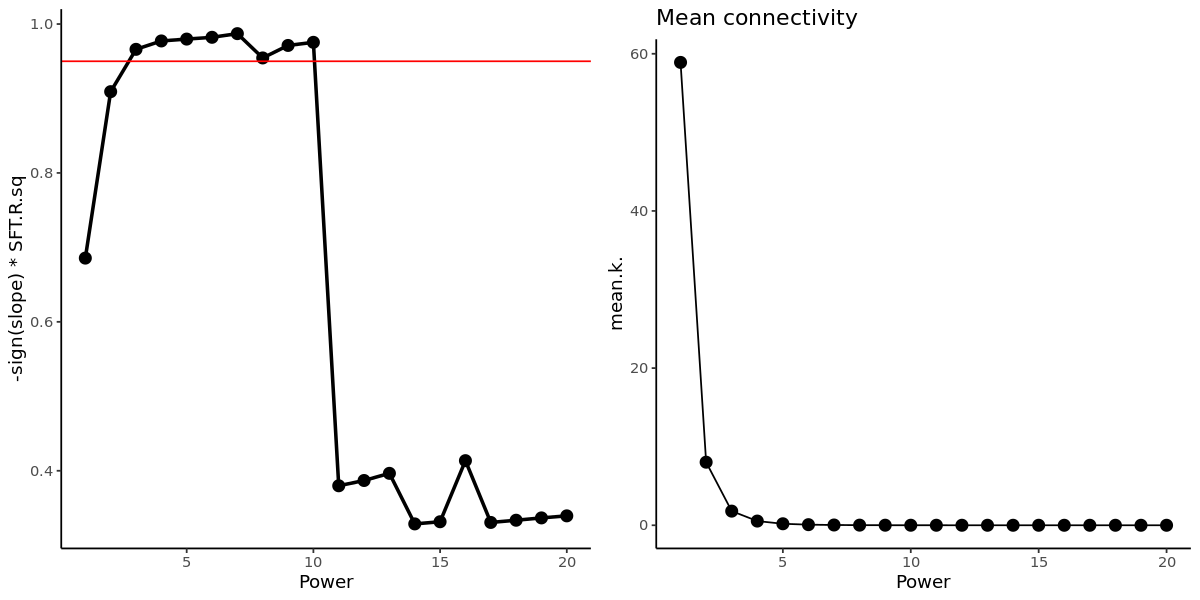

In [76]:
options(repr.plot.width = 10, repr.plot.height = 5)

g1 <- ggplot(data = sft$fitIndices, aes(x = Power, y = -sign(slope)*SFT.R.sq)) +
  geom_point(size = 3) +
  geom_line(size = 1) +
  geom_hline(aes(yintercept = 0.95), colour = "red") +
    theme_classic()

g2 <- ggplot(data = sft$fitIndices, aes(x = Power, y = mean.k.)) +
  geom_point(size = 3) +
  geom_line(size = 0.5) +
  ggtitle(label = "Mean connectivity") +
    theme_classic()

gridExtra::grid.arrange(g1, g2, ncol = 2)

In [77]:
softPower = 3

In [16]:
plan(strategy = "multicore")
cor <- cor(rExpr, method = "p")
plan(strategy = "sequential")

In [17]:
plan(strategy = "multicore")
cor  <- cosine(rExpr)
plan(strategy = "sequential")

In [18]:
dir.create("WGCNA")
write.csv(cor, "./WGCNA/SCT_3000var.csv")

Warning message in dir.create("WGCNA"):
“'WGCNA' already exists”


In [78]:
cor <- data.matrix(read.csv("./WGCNA/SCT_3000var.csv", header = T, row.names = 1), rownames.force = NA)

In [79]:
head(cor)

ABCB1       FLT1        SLC1A2      ADARB2      ST18        
ABCB1   1.00000000  0.81533575 -0.13773050 -0.03593899 -0.024918530
FLT1    0.81533575  1.00000000 -0.12548271 -0.03668624 -0.024139271
SLC1A2 -0.13773050 -0.12548271  1.00000000 -0.09507363 -0.173006041
ADARB2 -0.03593899 -0.03668624 -0.09507363  1.00000000  0.005605460
ST18   -0.02491853 -0.02413927 -0.17300604  0.00560546  1.000000000
ATP10A  0.77832050  0.77312034 -0.13184583 -0.04238364 -0.001017148
       ATP10A       GPC5        ITM2A       LHFPL3      HSPA1B       ⋯
ABCB1   0.778320498 -0.12065662  0.69456842 -0.05520150  0.039529217 ⋯
FLT1    0.773120337 -0.10406798  0.66031758 -0.05276546  0.018170014 ⋯
SLC1A2 -0.131845829  0.78328548 -0.14497940 -0.23255916 -0.003823098 ⋯
ADARB2 -0.042383635 -0.09043854 -0.02259851  0.07881471 -0.049650839 ⋯
ST18   -0.001017148 -0.20137319  0.01655824 -0.15068847 -0.014945701 ⋯
ATP10A  1.000000000 -0.11246724  0.65422042 -0.04880206  0.010824809 ⋯
       DHRS13        TSPAN1        CDKN2D        CPNE2       PGLYRP1      
ABCB1  -0.0028196946  7.528814e-04 -3.504621e-02  0.07970743  0.0015184688
FLT1    0.0008085775  3.617277e-03 -4.772620e-02  0.07969729  0.0005779445
SLC1A2  0.0010050239 -6.602425e-03 -2.189534e-02 -0.07659550 -0.0014387162
ADARB2  0.0185387427 -6.133475e-03 -2.796783e-02  0.06351549  0.0024164452
ST18    0.0029618008 -5.019451e-05 -2.085942e-05  0.23680449  0.0087848523
ATP10A -0.0049487780  1.164090e-03 -4.362101e-02  0.08915877 -0.0023937714
       NOS3         SLC30A1      KCNJ6       ESCO2        MAPK12     
ABCB1   0.405594337  0.399129868 -0.07654876  0.006082601  0.03141738
FLT1    0.371660906  0.388403895 -0.09290757  0.003890047  0.03074343
SLC1A2 -0.072086761 -0.065592097 -0.13813512 -0.010974831  0.07142806
ADARB2 -0.015765695 -0.017036068 -0.02484000  0.010842337 -0.02256266
ST18   -0.007053728  0.001487257 -0.05916233  0.001351157 -0.04152770
ATP10A  0.335309292  0.408588756 -0.08113512  0.006990548  0.02054213

In [80]:
adj = adjacency.fromSimilarity(cor, type = "signed hybrid", power = 3)

In [81]:
TOM = TOMsimilarity(adj, TOMDenom = "mean")

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [82]:
colnames(TOM) <- rownames(TOM) <- colnames(rExpr)
dissTOM <- 1 - TOM
geneTree <- hclust(as.dist(dissTOM), method="average");

In [83]:
# Set the minimum module size
minModuleSize = 30;
# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree,
                            cutHeight = 0.999,
                            method="hybrid",
                            deepSplit = 4,
#                             minAbsSplitHeight = 0.995,
                            minClusterSize = minModuleSize,
                            distM = dissTOM);

 ..done.


In [84]:
dynamicColors = labels2colors(dynamicMods)

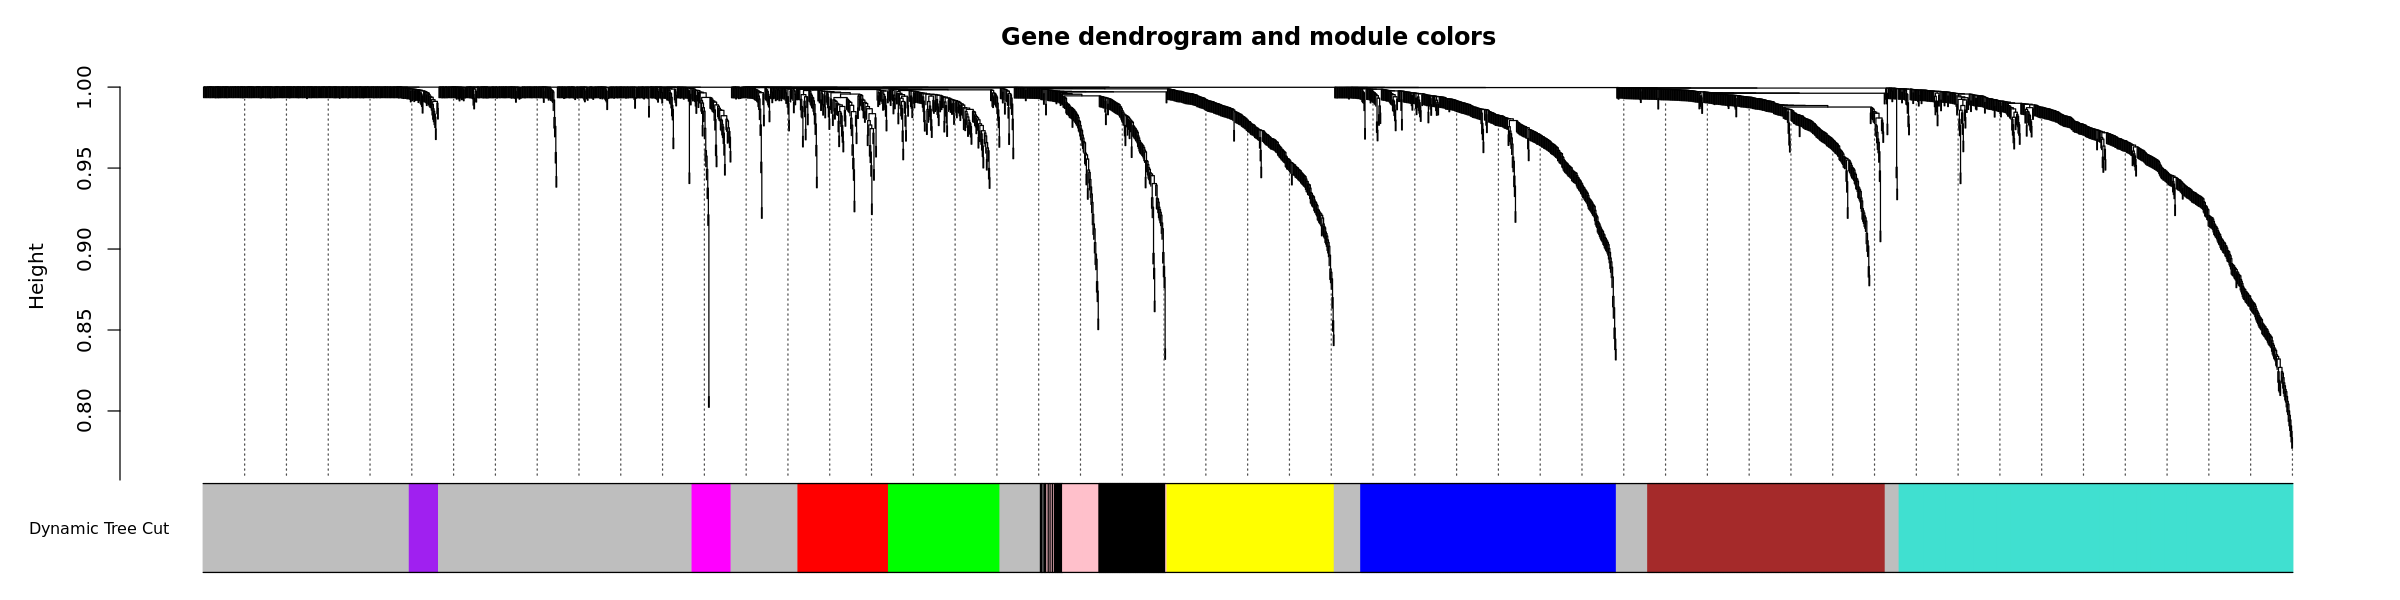

In [85]:
#table(dynamicColors)
options(repr.plot.width=20, repr.plot.height=5)
plotDendroAndColors(geneTree, 
                    dynamicColors, 
                    "Dynamic Tree Cut", 
                    dendroLabels = FALSE, 
                     hang = 0.03, 
                    addGuide = TRUE, 
                    guideHang = 0.03, 
                    main = "Gene dendrogram and module colors")

In [25]:
pdf("plotDendroAndColors_SCT3000var.pdf",width=20, height=5)
#table(dynamicColors)
options(repr.plot.width=20, repr.plot.height=5)
plotDendroAndColors(geneTree, 
                    dynamicColors, 
                    "Dynamic Tree Cut", 
                    dendroLabels = FALSE, 
                     hang = 0.03, 
                    addGuide = TRUE, 
                    guideHang = 0.03, 
                    main = "Gene dendrogram and module colors")
dev.off()

png 
  2

In [86]:
sort(unique(dynamicColors))

[1] "black"     "blue"      "brown"     "green"     "grey"      "magenta"  
 [7] "pink"      "purple"    "red"       "turquoise" "yellow"

In [87]:
unique(dynamicColors)

[1] "turquoise" "blue"      "red"       "yellow"    "black"     "magenta"  
 [7] "brown"     "pink"      "grey"      "green"     "purple"

In [88]:
MEs <- moduleEigengenes(as.matrix(rExpr), dynamicColors)
MEs <- orderMEs(MEs$eigengenes)

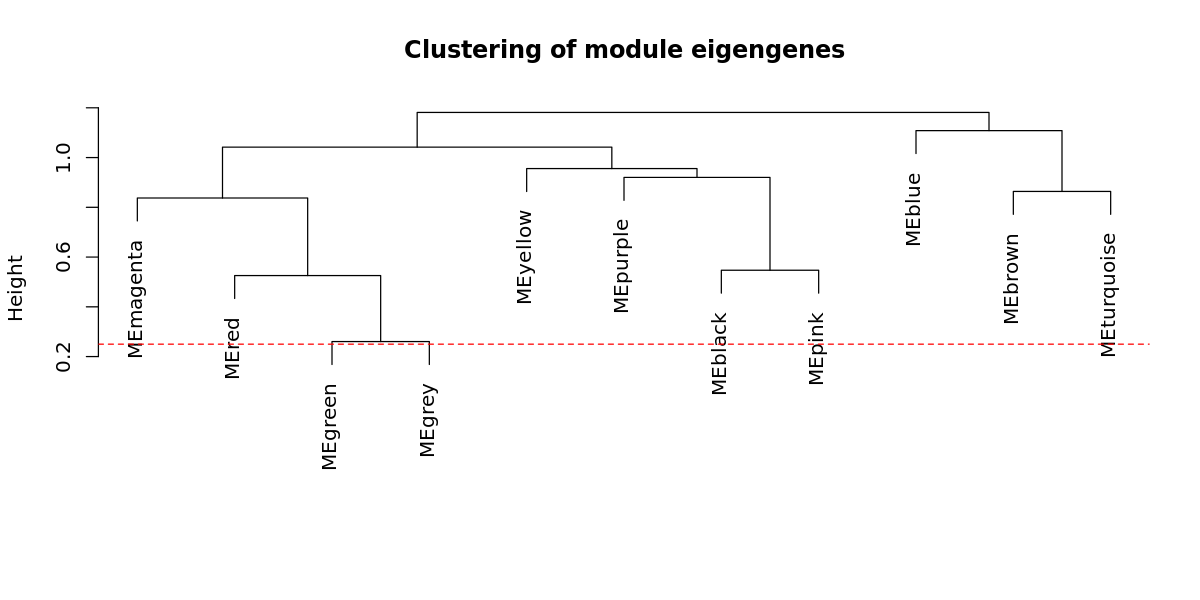

In [89]:
## Merge similar modules
options(repr.plot.width = 10, repr.plot.height = 5)
MEDiss = 1-cor(MEs)
METree = hclust(as.dist(MEDiss), method = "average")
plot(METree, main = "Clustering of module eigengenes", xlab = "", sub = "")
MEDissThres = 0.25
abline(h=MEDissThres, col = "red", lty = 2)

In [90]:
merge <- mergeCloseModules(rExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
MEs2 <- merge$newMEs
dynamicColors2 <- merge$colors

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 11 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 11 module eigengenes in given set.


In [91]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(MEs2, as.numeric(h), use = "p") # use merged MEs
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(rExpr))
}

moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

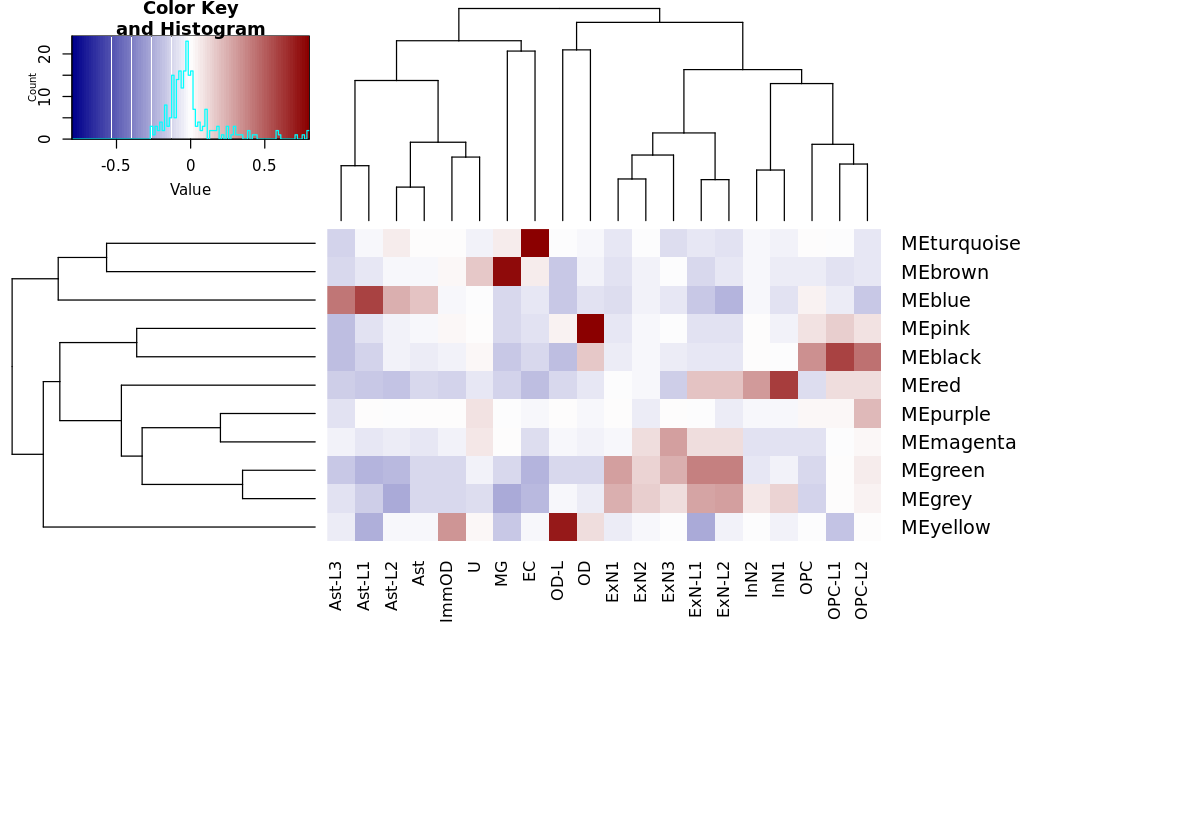

In [114]:
options(repr.plot.width = 10, repr.plot.height = 7)
heatmap.2(moduleTraitCor,scale="none",trace="none",
          col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) )

In [115]:
pdf("heatmap_moduleTraitCor_SCT3000var.pdf",width=10, height=7)
heatmap.2(moduleTraitCor,scale="none",trace="none",
          col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) )
dev.off()

png 
  2

In [92]:
res <- reshape2::melt(moduleTraitPvalue)

In [93]:
sort(unique(res$Var2))

[1] Ast    Ast-L1 Ast-L2 Ast-L3 EC     ExN-L1 ExN-L2 ExN1   ExN2   ExN3  
[11] ImmOD  InN1   InN2   MG     OD     OD-L   OPC    OPC-L1 OPC-L2 U     
20 Levels: Ast Ast-L1 Ast-L2 Ast-L3 EC ExN-L1 ExN-L2 ExN1 ExN2 ExN3 ... U

In [94]:
to.plot <- reshape2::melt(moduleTraitCor)

In [95]:
to.plot$p_value <- res$value

In [96]:
#to.plot$value[to.plot$value <= 0] <- NA

In [97]:
to.plot$Var2 <- factor(to.plot$Var2, 
                       levels = sort(unique(res$Var2)))
                  #     levels = c('CTRL','FCD',
                   #               'HME','TSC'))

In [98]:
unique(to.plot$Var1)

[1] MEmagenta   MEgreen     MEred       MEyellow    MEpurple    MEblack    
 [7] MEpink      MEblue      MEbrown     MEturquoise MEgrey     
11 Levels: MEmagenta MEgreen MEred MEyellow MEpurple MEblack MEpink ... MEgrey

In [99]:
cell_type_modules = unique(to.plot$Var1)

Warning message:
“Removed 147 rows containing missing values (geom_point).”


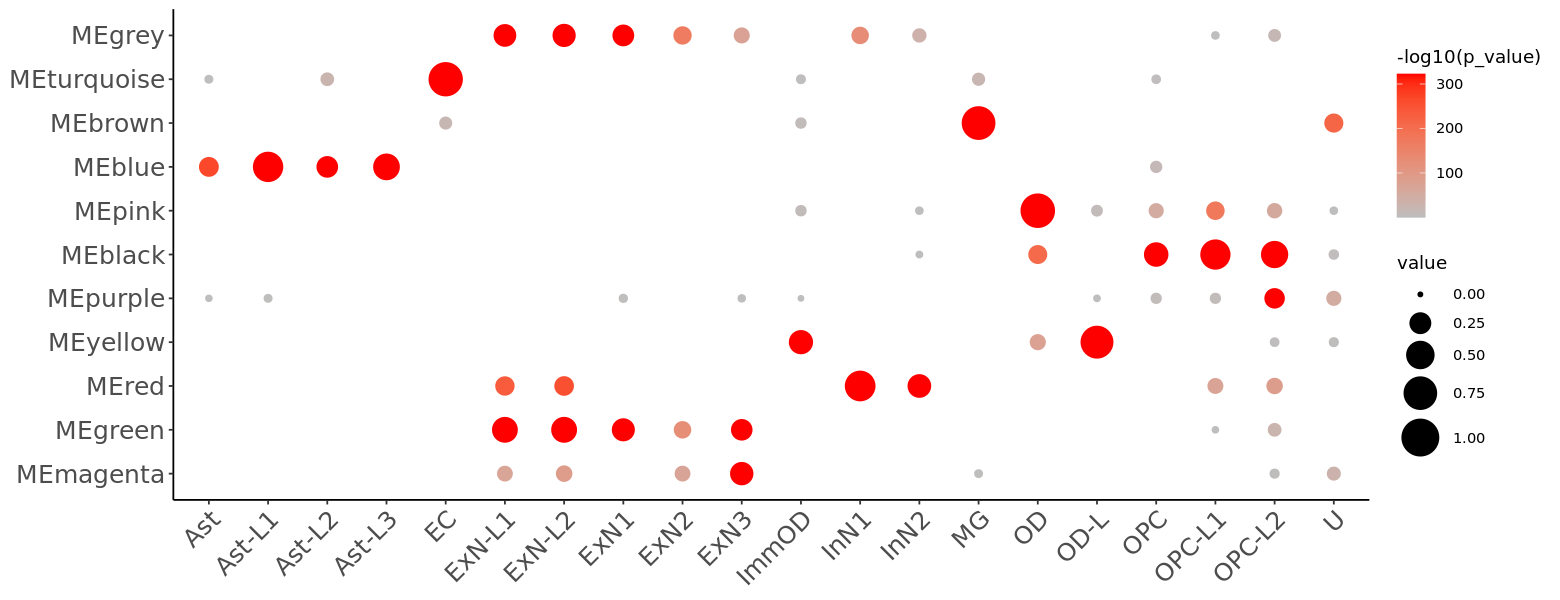

In [100]:
options(repr.plot.width = 13, repr.plot.height = 5)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo
#blue synapse neuron
#black interneuron
#green yellow : collagen
#magenta: EGFR
#purple: microglia immune

In [101]:
pdf("WGCNA_seruat_cluster_module_enrichment_celltype_SCTvar3000.pdf",width=13, height=5)
options(repr.plot.width = 13, repr.plot.height = 11)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))
dev.off()

Warning message:
“Removed 147 rows containing missing values (geom_point).”


png 
  2

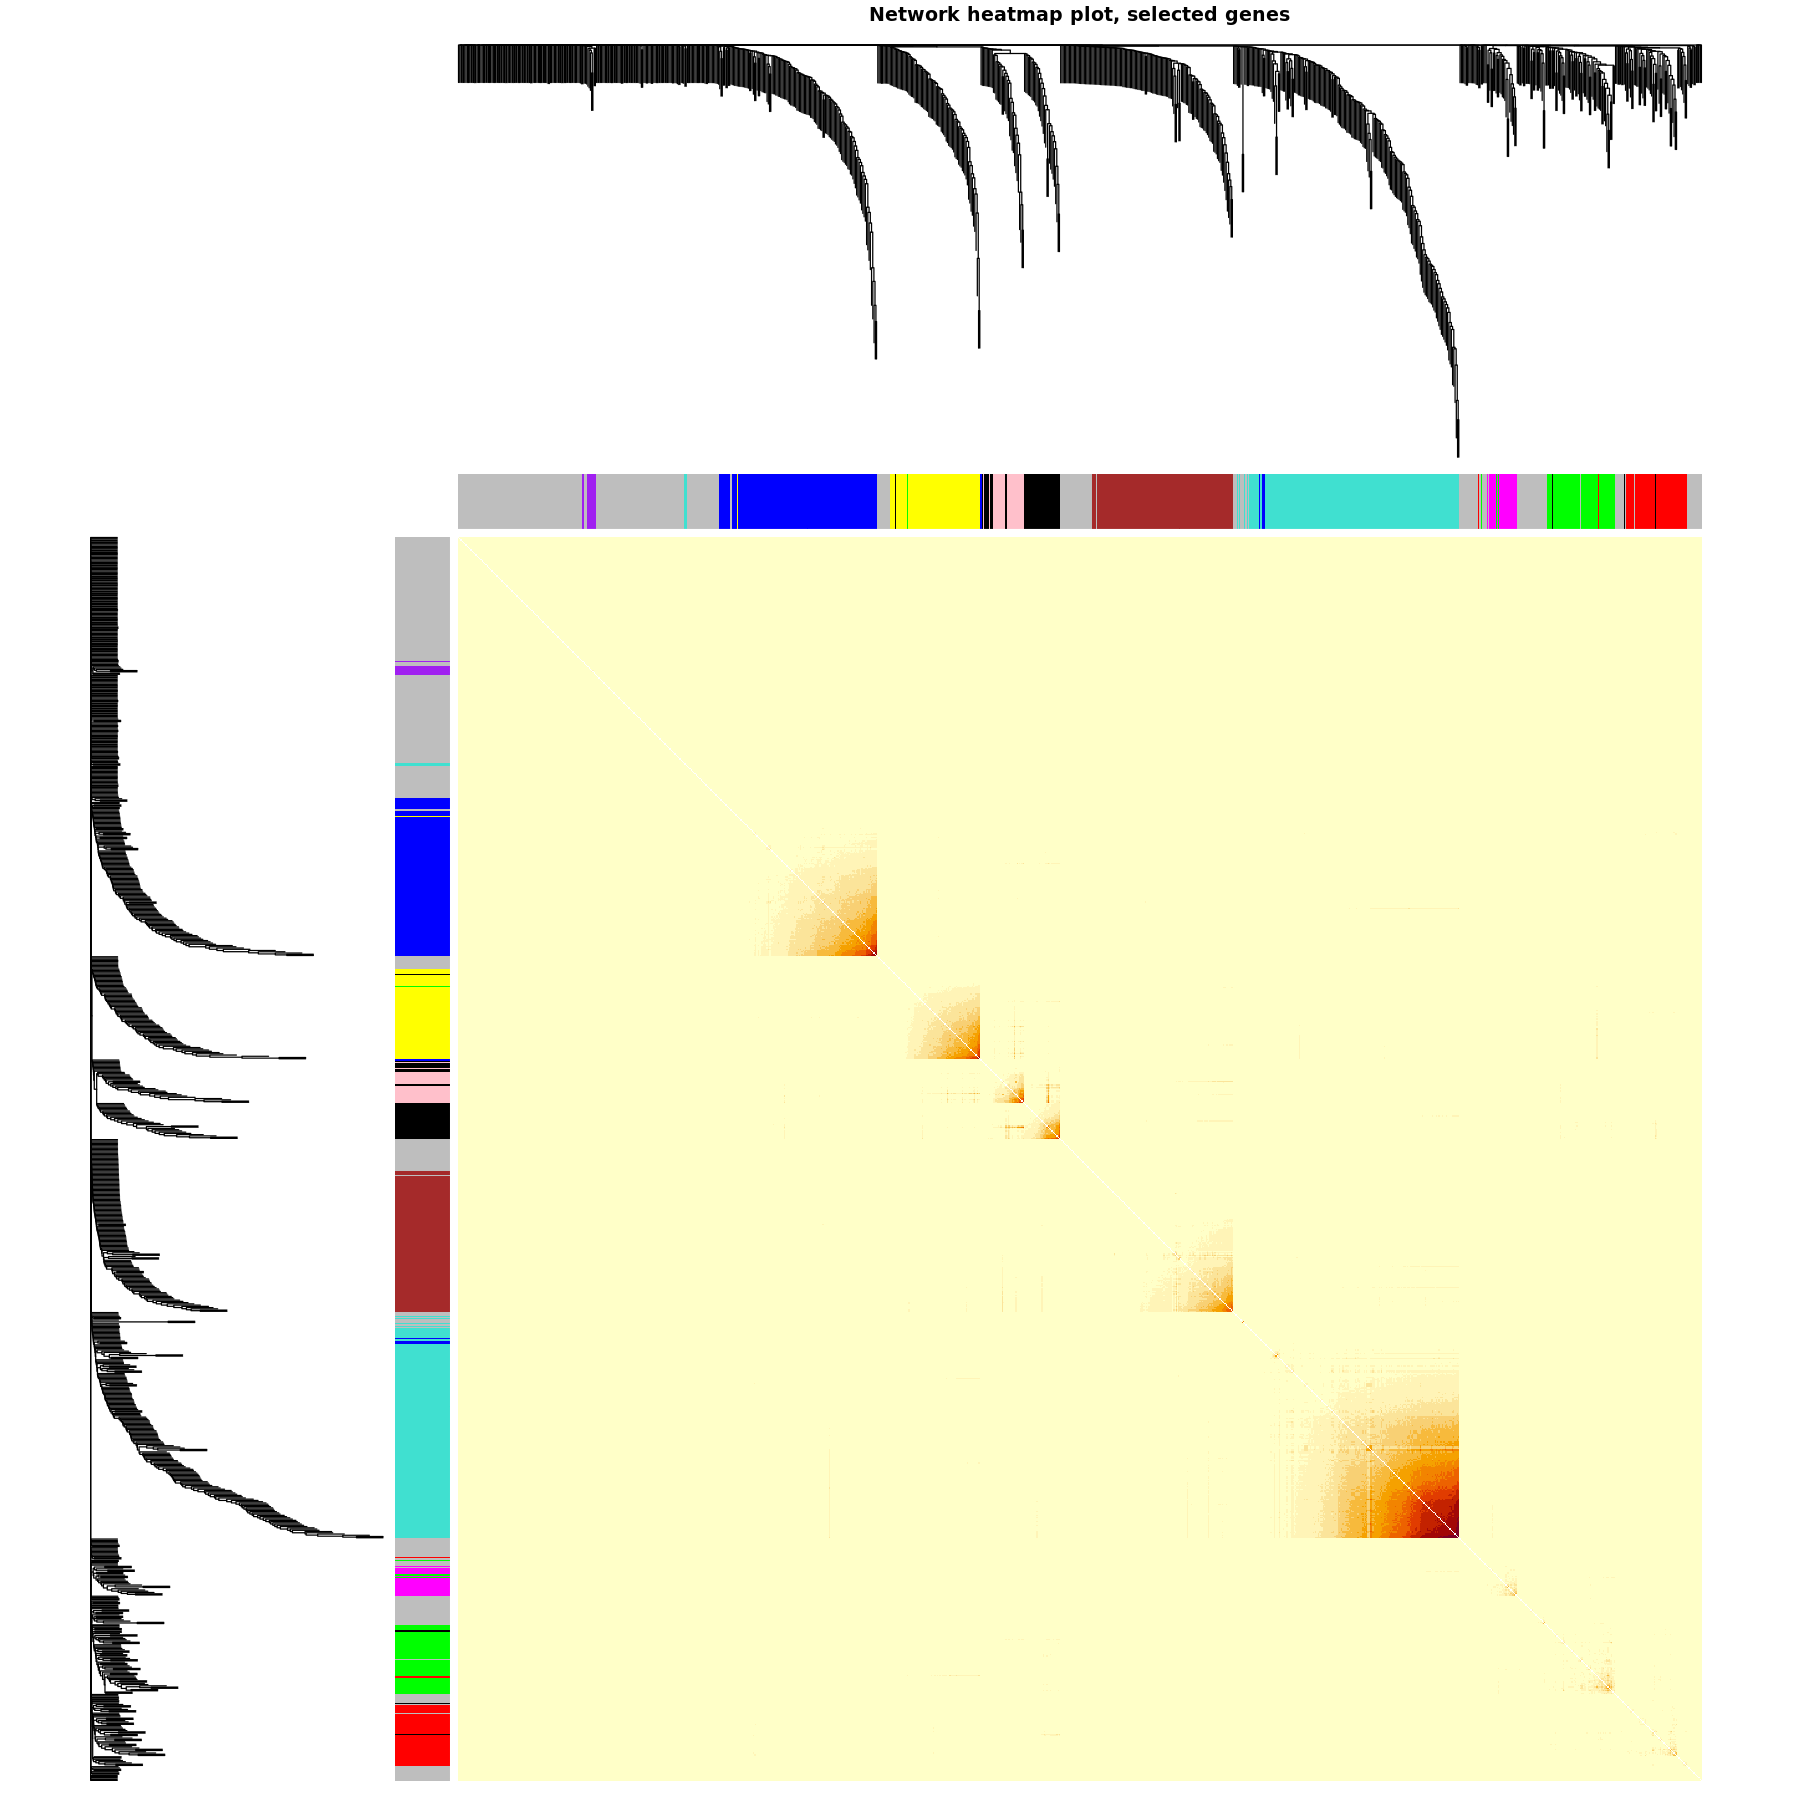

In [111]:
options(repr.plot.width = 15, repr.plot.height = 15)
nSelect = 1000
nGenes <- ncol(rExpr)
nSamples <- nrow(rExpr)

# For reproducibility, we set the random seed
set.seed(10);
select <- sample(nGenes, size = nSelect);
selectTOM <-dissTOM[select, select];
# There’s no simple way of restricting a clustering tree to a subset of genes, so we must re-cluster.
selectTree <- hclust(as.dist(selectTOM), method = "average")
selectColors <- dynamicColors2[select];
# Open a graphical window
# Taking the dissimilarity to a power, say 10, makes the plot more informative by effectively changing
# the color palette; setting the diagonal to NA also improves the clarity of the plot
plotDiss <- 1-selectTOM^10;
diag(plotDiss) <- NA;
TOMplot(plotDiss, selectTree, selectColors, main = "Network heatmap plot, selected genes")

In [113]:
Genelist <- as.data.frame(dynamicColors2, col.names = "Gene", row.names =row.names(TOM))

In [114]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [115]:
lapply(unique(dynamicColors2), function(xx){
a <- subset(Genelist, Genelist$dynamicColors2==xx)
write.csv(a, paste("./WGCNA/",xx,"_geneset.csv"))
})

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

In [78]:
tmp <- table(df0@meta.data$seurat_clusters, df0@meta.data$disease) 
tmp_col<-colSums(tmp)
len<-length(unique(df0@meta.data$seurat_clusters))

tmp[1:len,1]<-tmp[1:len,1]/tmp_col[1]
tmp[1:len,2]<-tmp[1:len,2]/tmp_col[2]

tmp

    
             CTRL          TSC
  0  0.0834676120 0.0906381249
  1  0.1324524654 0.0673350495
  2  0.0286819207 0.1068960845
  3  0.0373831776 0.1025606286
  4  0.1108604576 0.0685543964
  5  0.0174025137 0.0883349140
  6  0.0612310667 0.0662511855
  7  0.0422172092 0.0741091993
  8  0.0196583951 0.0692318114
  9  0.0847566871 0.0310256063
  10 0.1169835643 0.0102967078
  11 0.1169835643 0.0051483539
  12 0.0038672253 0.0436255250
  13 0.0183693200 0.0335997832
  14 0.0090235256 0.0321094703
  15 0.0022558814 0.0334643002
  16 0.0116016758 0.0260127354
  17 0.0080567193 0.0189676196
  18 0.0331936835 0.0082644628
  19 0.0328714148 0.0075870478
  20 0.0006445375 0.0142257147
  21 0.0196583951 0.0006774150
  22 0.0083789881 0.0010838640

# expression patterns of MCD geneset

In [13]:
genelist<-read.csv("../FCD_gene_list.csv",header=TRUE)

In [16]:
length(genelist$X)

[1] 75

In [17]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.3,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q98',
                    order = T,
                    features = genelist$X)

Warning message:
“Could not find ENPP7 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find OR2M5 in the default search locations, found in RNA assay instead”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: KRTAP9-8, NRDC”
Warning message in FeaturePlot(df0, slot = "data", pt.size = 0.3, reduction = "umap", :
“All cells have the same value (1) of rna_ENPP7.”
Warning message in FeaturePlot(df0, slot = "data", pt.size = 0.3, reduction = "umap", :
“All cells have the same value (1) of rna_OR2M5.”


In [18]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 9,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will rep

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



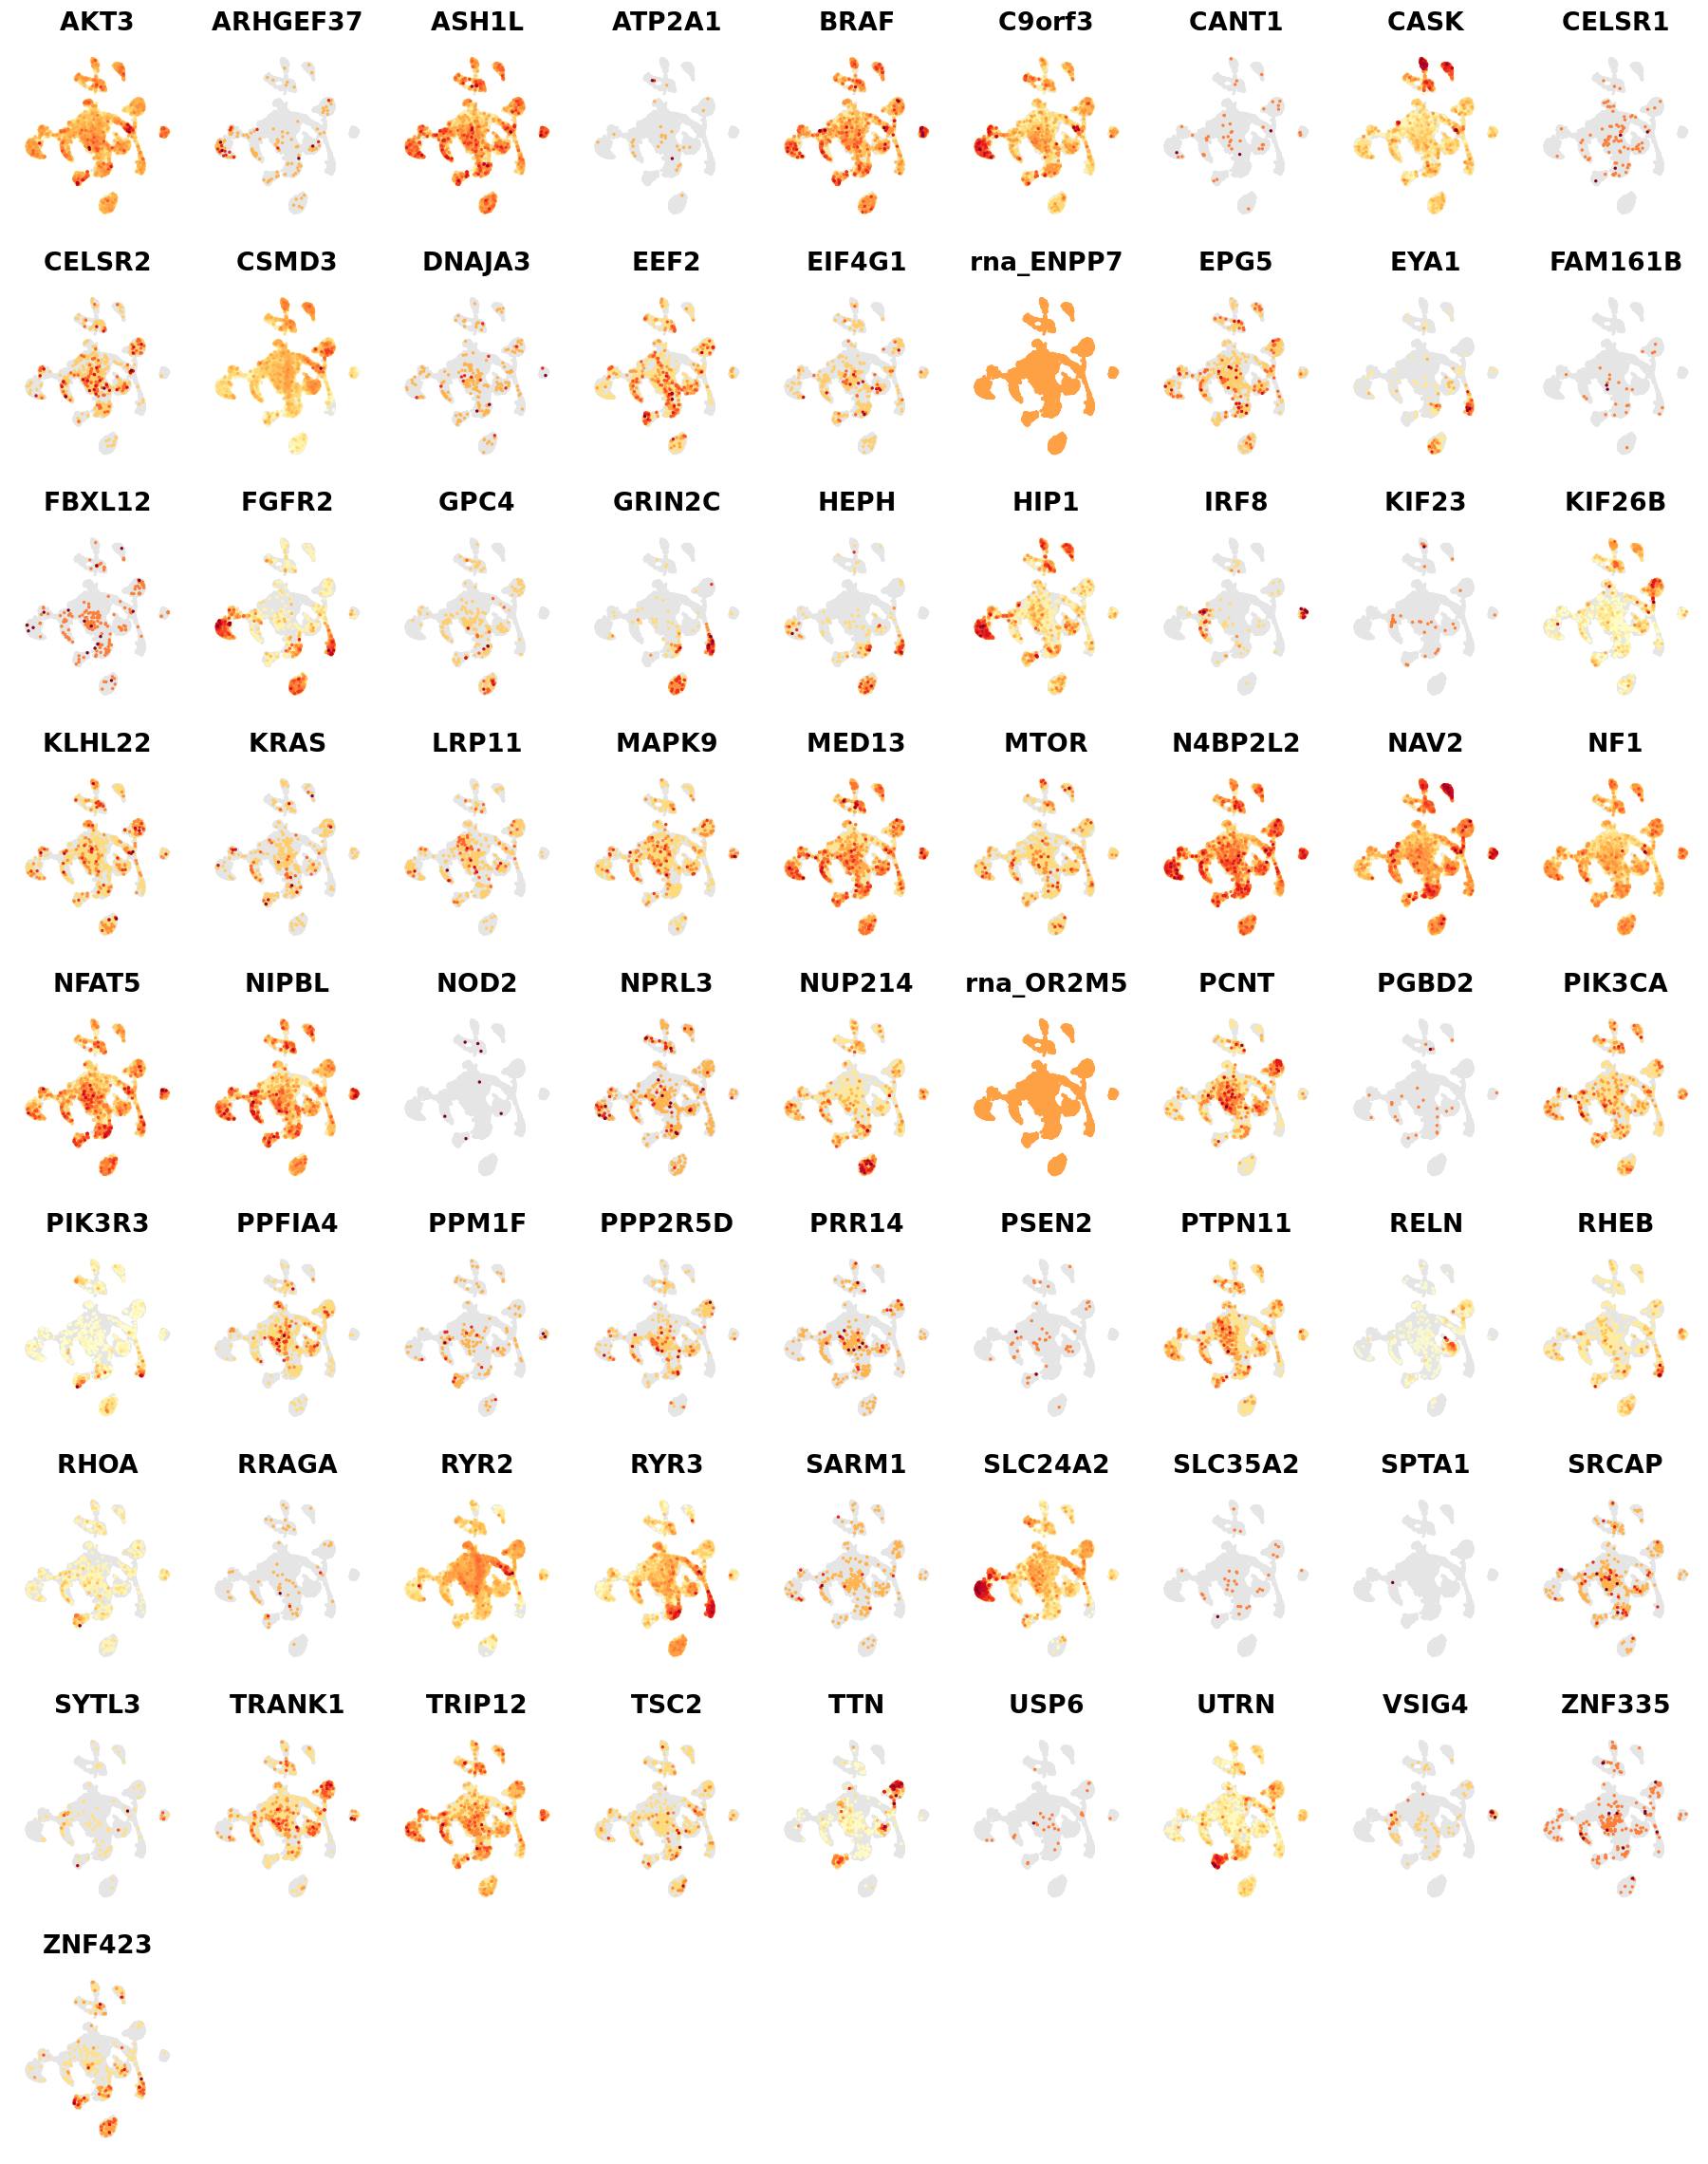

In [19]:
options(repr.plot.width=15, repr.plot.height=19)
do.call(gridExtra::grid.arrange, plist)

In [120]:
pdf("McdGeneExpression_UMAP.pdf",width = 15, height = 19, useDingbats = F)
do.call(gridExtra::grid.arrange, plist)
dev.off()

png 
  2

# enrichment of MCD genes

In [6]:
row.names(genelist) <-genelist$X
hvg <- VariableFeatures(df0)

In [123]:
length(row.names(df0@assays$SCT@data))

[1] 16449

In [65]:
genelist<-genelist[!(genelist$X %in% c("ENPP7","KRTAP9-8")),]

In [5]:
aaa<-intersect(row.names(df0@assays$SCT@data),genelist$X)

In [7]:
#datExpr <- t(as.matrix(GetAssayData(df0)))[,genelist$X]  # only use variable genes in analysis
datExpr<- t(as.matrix(df0@assays$SCT@data[aaa,] ))

In [8]:
datExpr

MTOR      PIK3R3    CELSR2    ASH1L     SPTA1 PPFIA4   
CTRL_AAACCCACAAATGGAT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAACCCAGTTGTAGCT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAACCCATCGAAGCAG-1 0.6931472 0.0000000 0.0000000 1.0986123 0     0.6931472
CTRL_AAACGAAAGCTTTCCC-1 0.0000000 0.6931472 0.0000000 0.6931472 0     0.0000000
CTRL_AAACGAAAGGTTCTAC-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AAACGAACAGTTCCAA-1 0.6931472 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AAACGAAGTATTCTCT-1 0.0000000 0.0000000 0.6931472 0.6931472 0     1.0986123
CTRL_AAACGAAGTTTAGACC-1 0.0000000 0.0000000 0.0000000 1.9459101 0     0.0000000
CTRL_AAACGAATCTGAGATC-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAACGCTTCGAAGAAT-1 0.0000000 0.6931472 0.0000000 0.0000000 0     0.0000000
CTRL_AAAGAACCACGACTAT-1 0.6931472 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAAGAACCAGGTACGA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAAGGATCACTACTTT-1 1.0986123 0.0000000 0.0000000 1.3862944 0     0.0000000
CTRL_AAAGGATGTCAGTTTG-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAAGGGCCAATCAAGA-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AAAGTGAGTTCACCGG-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAAGTGATCCATACAG-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAATGGAGTTAGCGGA-1 0.6931472 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAATGGAGTTCTTGCC-1 0.0000000 0.6931472 0.0000000 0.6931472 0     0.6931472
CTRL_AAATGGATCATATGGC-1 0.6931472 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AACAACCAGCGTATGG-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AACAAGATCACGATCA-1 0.0000000 0.0000000 0.6931472 0.6931472 0     0.6931472
CTRL_AACAAGATCCTTCAGC-1 0.0000000 0.0000000 0.6931472 0.6931472 0     0.6931472
CTRL_AACAGGGCATTACGGT-1 0.0000000 0.0000000 0.6931472 1.3862944 0     0.0000000
CTRL_AACCAACTCGCAGATT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AACCACAAGGACAGTC-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AACCACACACAGAAGC-1 0.6931472 0.0000000 0.6931472 1.7917595 0     0.0000000
CTRL_AACCATGAGTGTGTTC-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AACCATGCATGGAAGC-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AACCATGGTGGTCCCA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
⋮                       ⋮         ⋮         ⋮         ⋮         ⋮     ⋮        
4259_TTTGACTGTCCAGGTC-1 0.6931472 0.0000000 0.6931472 0.0000000 0     0.6931472
4259_TTTGACTGTCTGTCCT-1 0.0000000 0.0000000 0.0000000 1.6094379 0     0.0000000
4259_TTTGACTTCGTCAACA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
4259_TTTGATCTCACTAGCA-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
4259_TTTGATCTCATGACAC-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
4259_TTTGATCTCCCTCGTA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     1.0986123
4259_TTTGATCTCGCATGAT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
4259_TTTGGAGAGGACAAGA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     1.0986123
4259_TTTGGAGCAACATACC-1 1.0986123 1.0986123 1.0986123 0.0000000 0     0.0000000
4259_TTTGGAGCAAGTCCCG-1 0.0000000 0.0000000 0.6931472 0.0000000 0     0.6931472
4259_TTTGGAGCACTACCCT-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
4259_TTTGGAGCAGTTGAAA-1 0.0000000 0.0000000 1.0986123 0.0000000 0     0.0000000
4259_TTTGGAGGTCCCGTGA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.6931472
4259_TTTGGAGTCACGAGGA-1 0.0000000 0.0000000 1.0986123 0.0000000 0     0.0000000
4259_TTTGGAGTCAGCAGAG-1 0.0000000 0.0000000 0.6931472 1.0986123 0     0.6931472
4259_TTTGGAGTCGGCTTGG-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
4259_TTTGGTTAGAGAGTGA-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
4259_TTTGGTTAGCTTGTTG-1 0.0000000 0.0000000 0.0000000 1.3862944 0     0.0000000
4259_TTTGGTTCAGGTCTCG-1 

In [9]:
Idents(df0) <- df0@meta.data$cell_type

In [10]:

net <- blockwiseModules(datExpr, power = 7,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize =100,
	reassignThreshold = 0, mergeCutHeight = 0.15,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 No modules detected in block 1
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15


Warning message in blockwiseModules(datExpr, power = 7, corType = "bicor", networkType = "signed", :
“blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
”


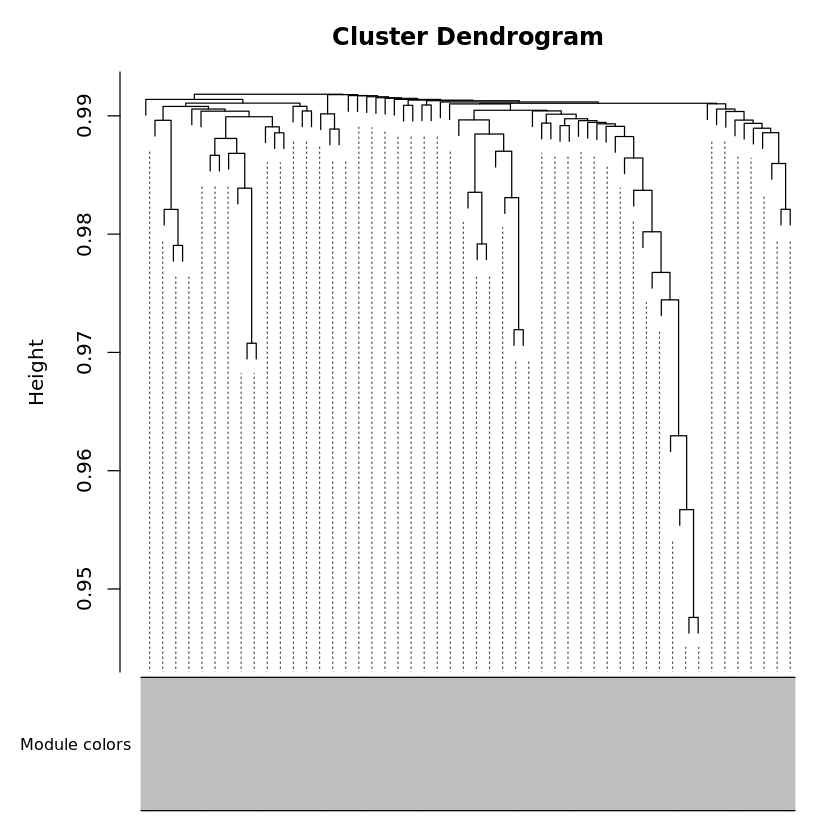

In [11]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

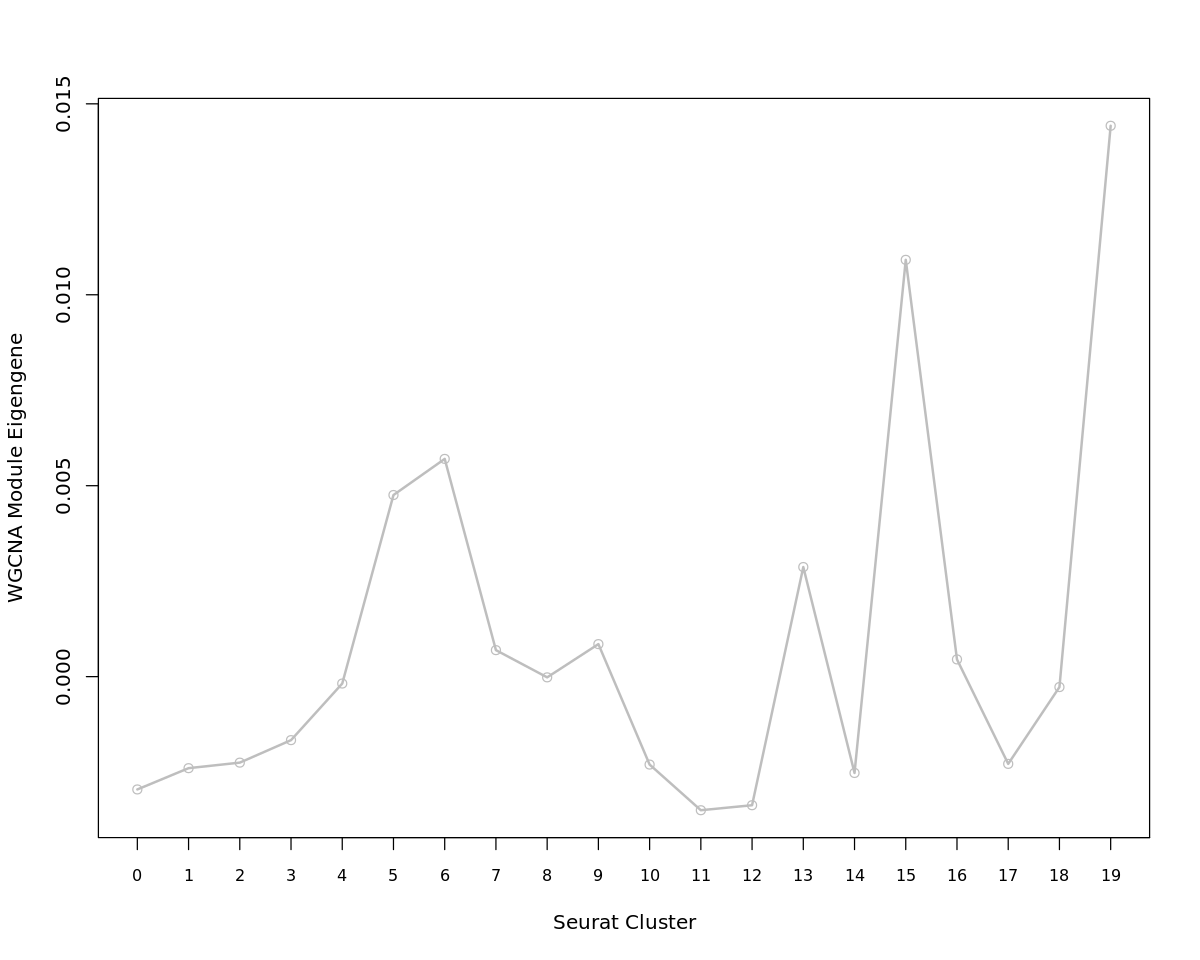

In [12]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- c("grey")
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:25, labels = 0:24, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

[[1]]


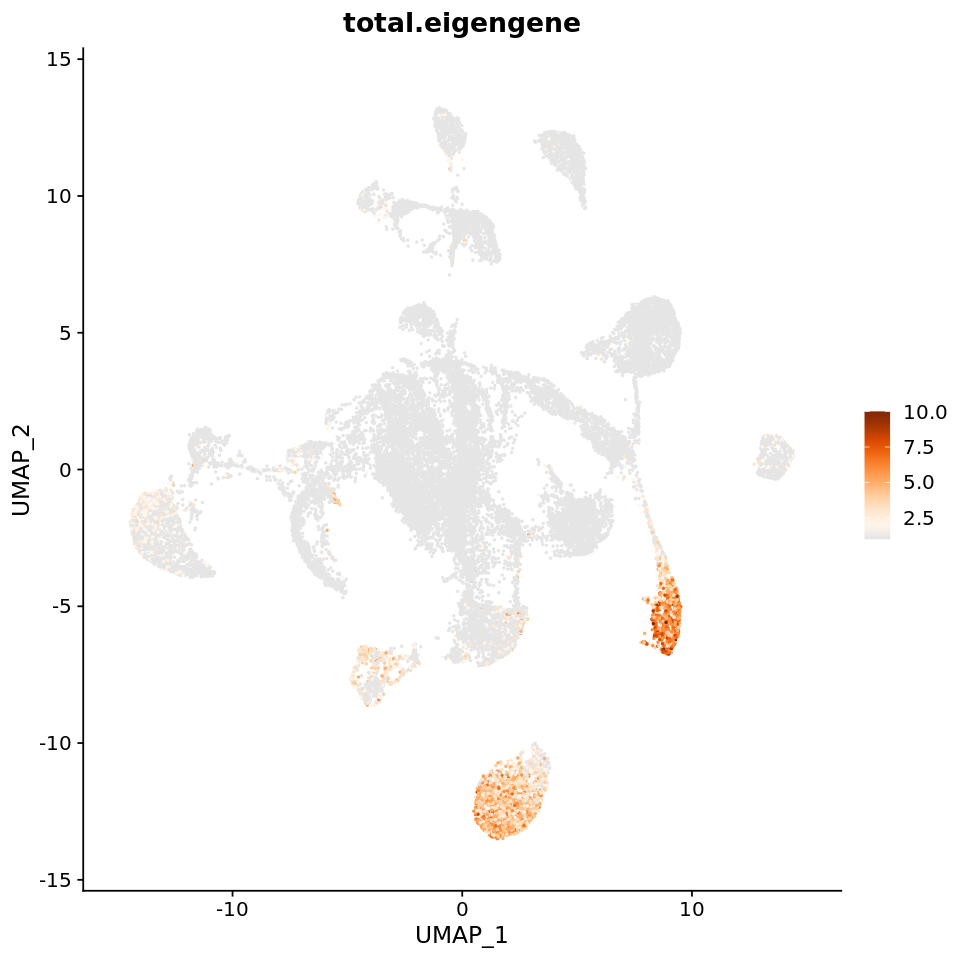

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
total.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(total.eigengene) <- rownames(datExpr)
df0$total.eigengene <- total.eigengene
FeaturePlot(df0, features = "total.eigengene", 
            cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')),
            slot = 'data',
                     pt.size = 0.3,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15')

In [73]:
pdf("./MCD_gene_module_total_UMAP.pdf",width=14, height=14)
options(repr.plot.width=8, repr.plot.height=8)
total.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(total.eigengene) <- rownames(datExpr)
df0$total.eigengene <- total.eigengene
FeaturePlot(df0, features = "total.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )
dev.off()

png 
  2

In [23]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(net$MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(datExpr))
}
moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");
res <- reshape2::melt(moduleTraitPvalue)
to.plot <- reshape2::melt(moduleTraitCor)
to.plot$p_value <- res$value
to.plot$value[to.plot$value <= 0] <- NA
unique(df0@meta.data$cell_type)
to.plot$Var2 <- factor(to.plot$Var2, levels = sort(unique(df0@meta.data$cell_type)))

[1] "InN1"   "ExN3"   "InN2"   "OPC"    "ImmOD"  "Ast"    "EC"     "OD"    
 [9] "MG"     "Ast-L2" "U"      "ExN1"   "ExN2"   "OD-L"   "ExN-L2" "Ast-L3"
[17] "OPC-L2" "ExN-L1" "OPC-L1" "Ast-L1"

In [24]:
cell_type_modules = c('MEgrey')

Warning message:
“Removed 12 rows containing missing values (geom_point).”


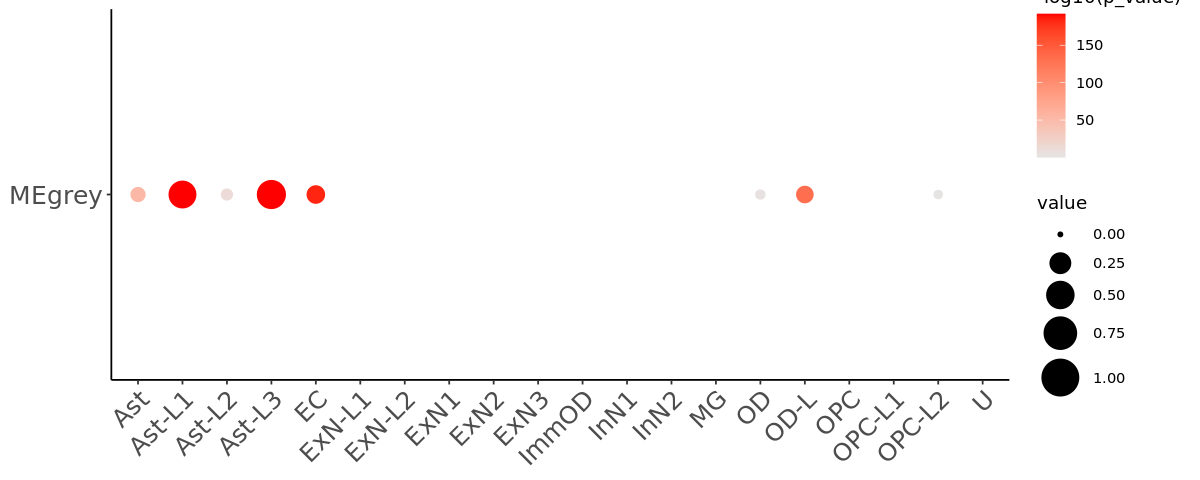

In [28]:
options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

In [29]:
pdf("WGCNA_dotplot_total_enrichment.pdf", width=10, height=4)
options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))
dev.off()

Warning message:
“Removed 12 rows containing missing values (geom_point).”


png 
  2

# detail enrichment analysis

In [40]:
net <- blockwiseModules(datExpr, power = 8,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize =2,
	reassignThreshold = 0, mergeCutHeight = 0.15,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..


Warning message in bicor(structure(c(0, 0, 0.693147180559945, 0, 0, 0.693147180559945, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0, 0, 0, 0, 0, 0, 0.693147180559945, 0, 0, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 3 genes from module 2 because their KME is too low.


Warning message in bicor(structure(c(1.09861228866811, 0.693147180559945, 1.38629436111989, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0.693147180559945, 1.79175946922805, 0, 0, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 2 genes from module 4 because their KME is too low.


Warning message in bicor(structure(c(0, 0.693147180559945, 0, 0, 0, 0.693147180559945, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 1 genes from module 5 because their KME is too low.


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


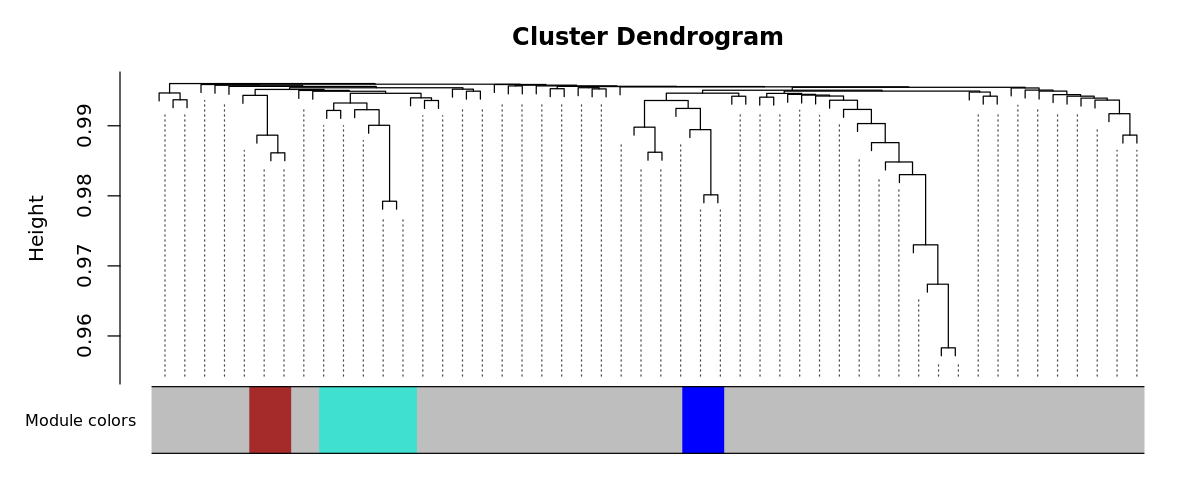

In [41]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [42]:
unique(net$colors)

[1] "grey"      "turquoise" "brown"     "blue"

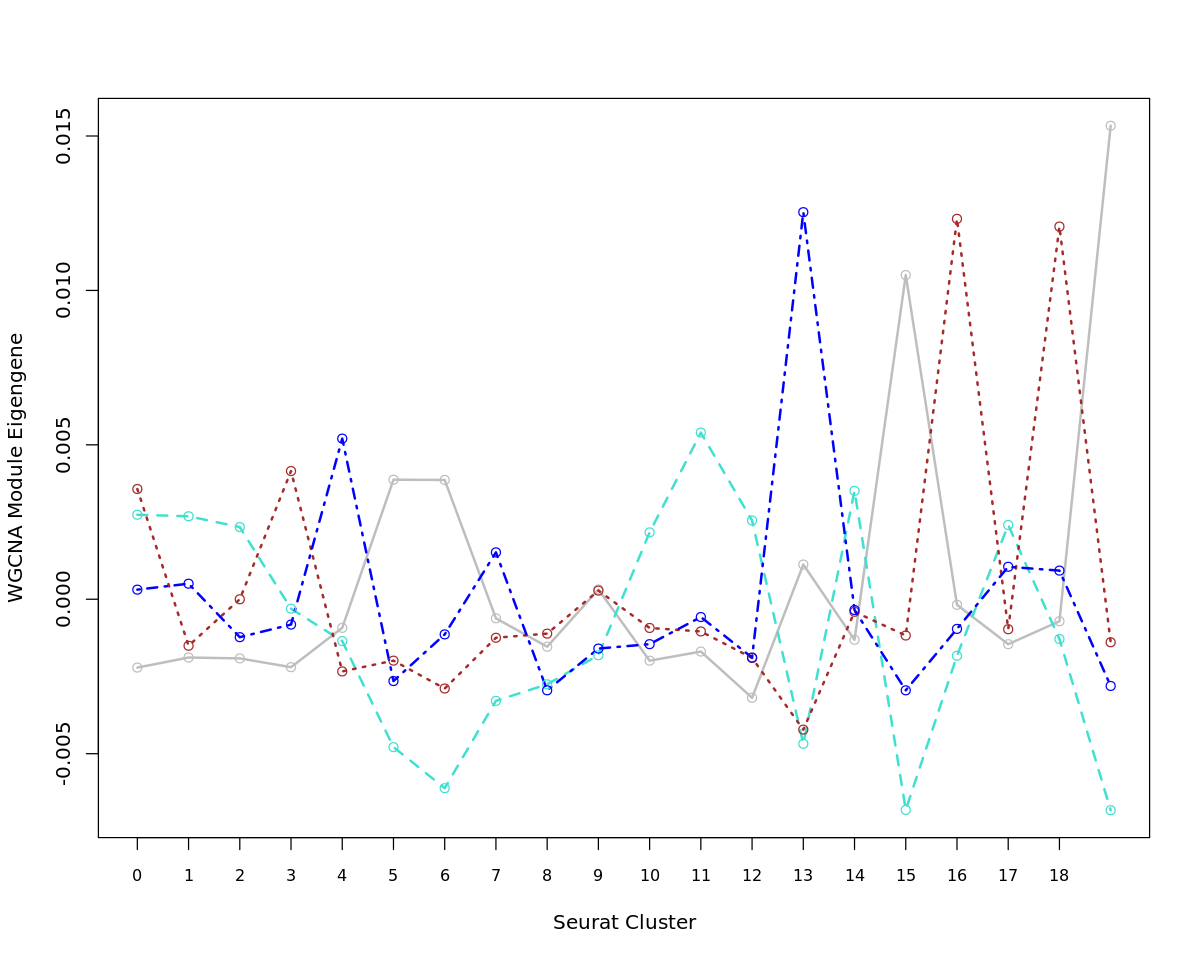

In [43]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- unique(net$colors) # update colors
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:19, labels = 0:18, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

In [44]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- unique(net$colors)
plotdat <- sapply(modules, f)

In [45]:
color<-as.data.frame(net$colors)
write.csv(color,"./GeneToColor.csv",row.names=TRUE)

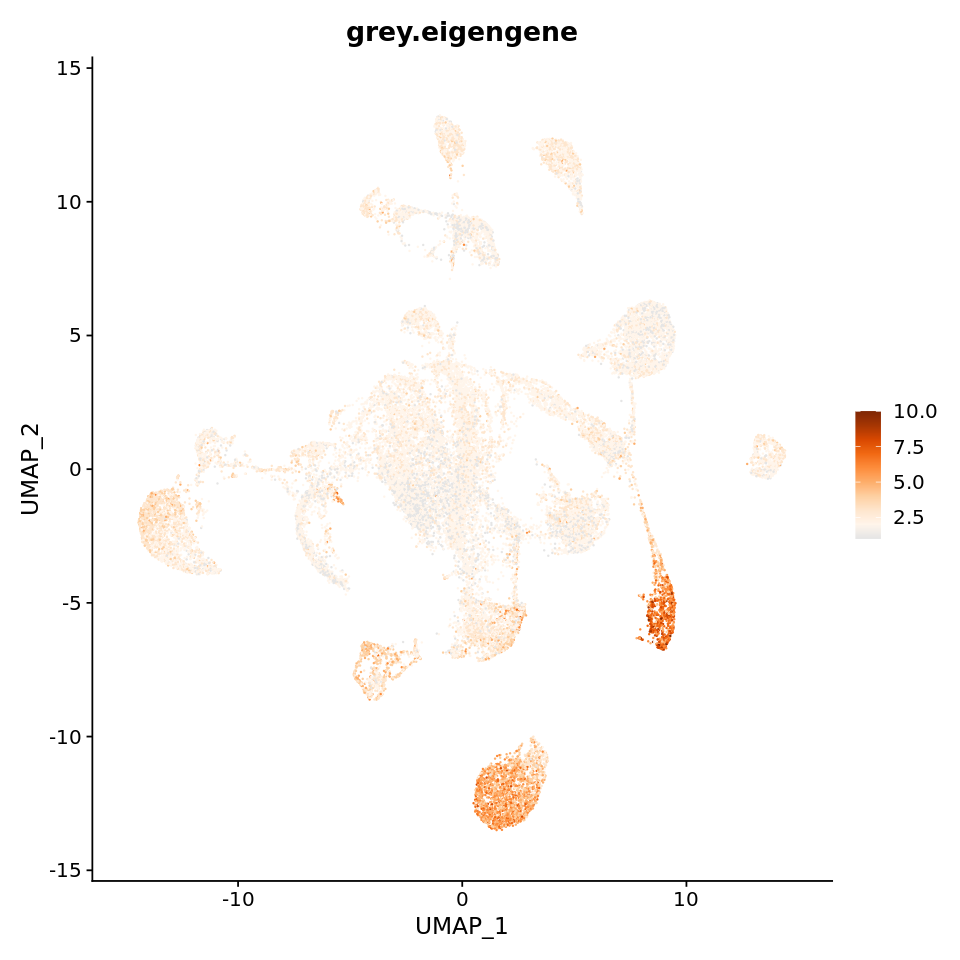

In [46]:
options(repr.plot.width=8, repr.plot.height=8)
grey.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(grey.eigengene) <- rownames(datExpr)
df0$grey.eigengene <- grey.eigengene
FeaturePlot(df0, features = "grey.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

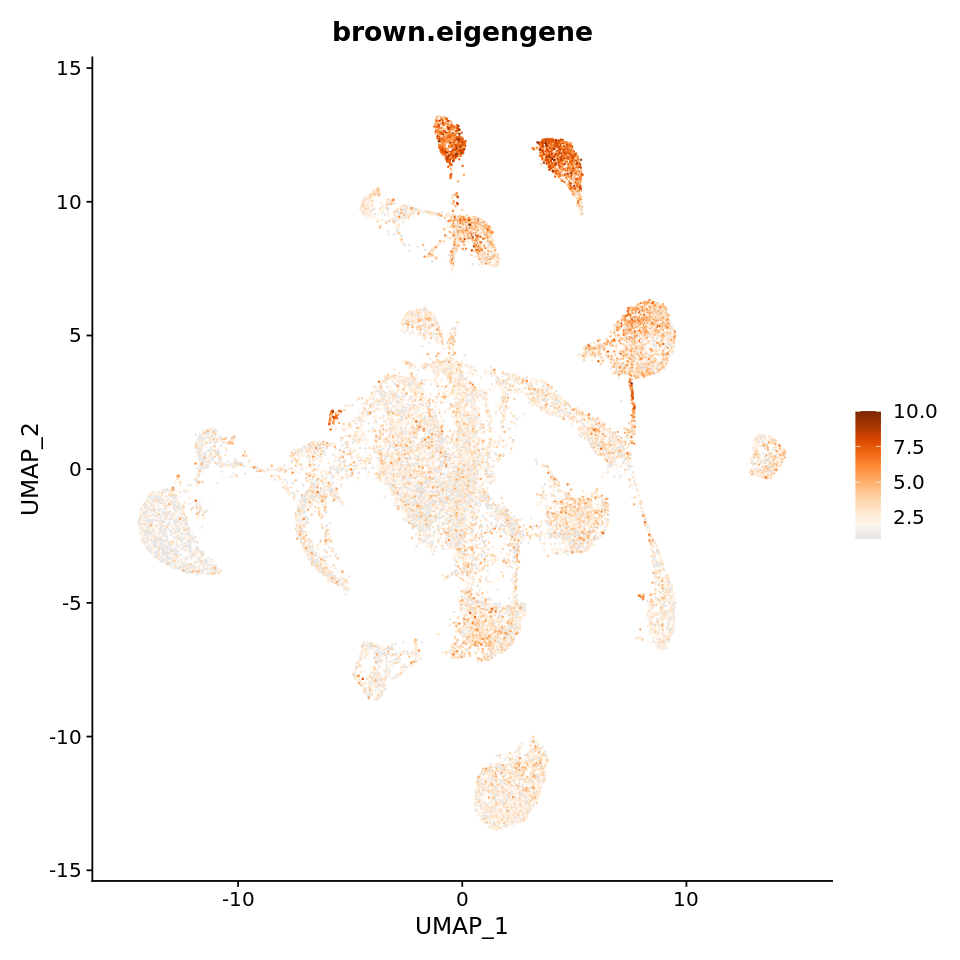

In [47]:
options(repr.plot.width=8, repr.plot.height=8)
brown.eigengene <- unlist(net$MEs[paste0("ME", "brown")])
names(brown.eigengene) <- rownames(datExpr)
df0$brown.eigengene <- brown.eigengene
FeaturePlot(df0, features = "brown.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

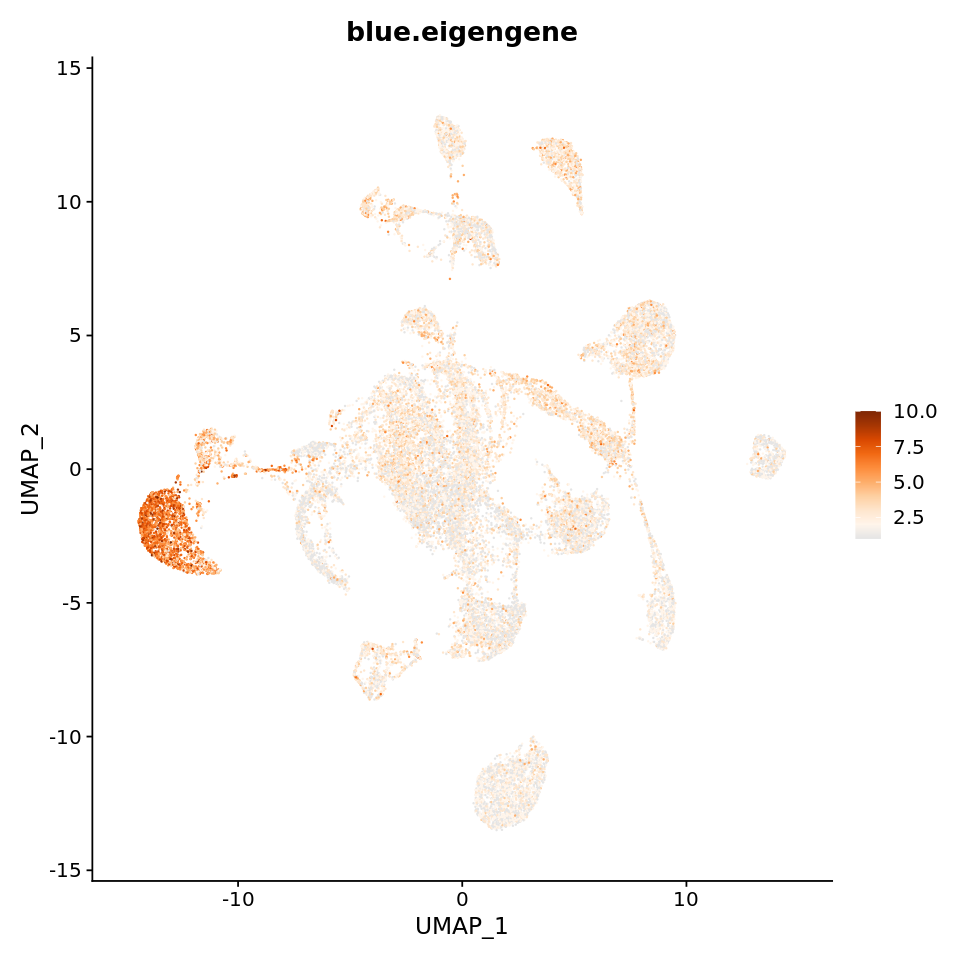

In [48]:
options(repr.plot.width=8, repr.plot.height=8)
blue.eigengene <- unlist(net$MEs[paste0("ME", "blue")])
names(blue.eigengene) <- rownames(datExpr)
df0$blue.eigengene <- blue.eigengene
FeaturePlot(df0, features = "blue.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

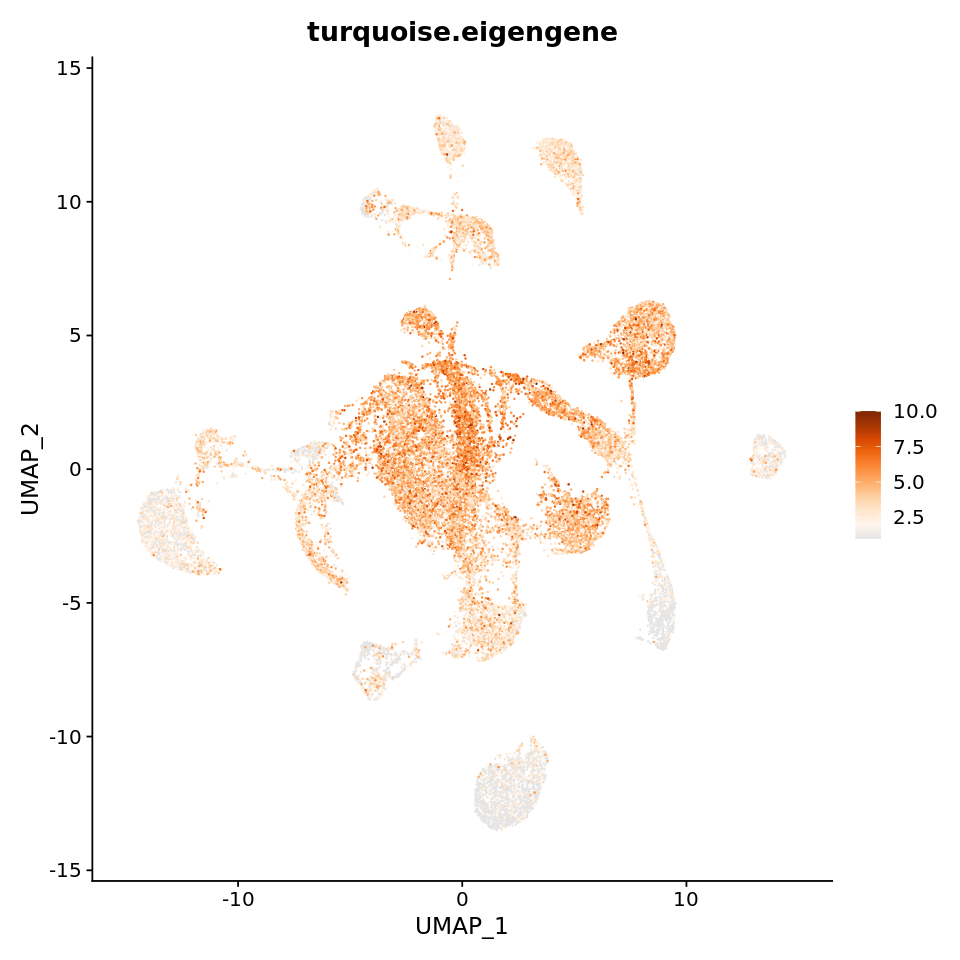

In [49]:
options(repr.plot.width=8, repr.plot.height=8)
turquoise.eigengene <- unlist(net$MEs[paste0("ME", "turquoise")])
names(turquoise.eigengene) <- rownames(datExpr)
df0$turquoise.eigengene <- turquoise.eigengene
FeaturePlot(df0, features = "turquoise.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

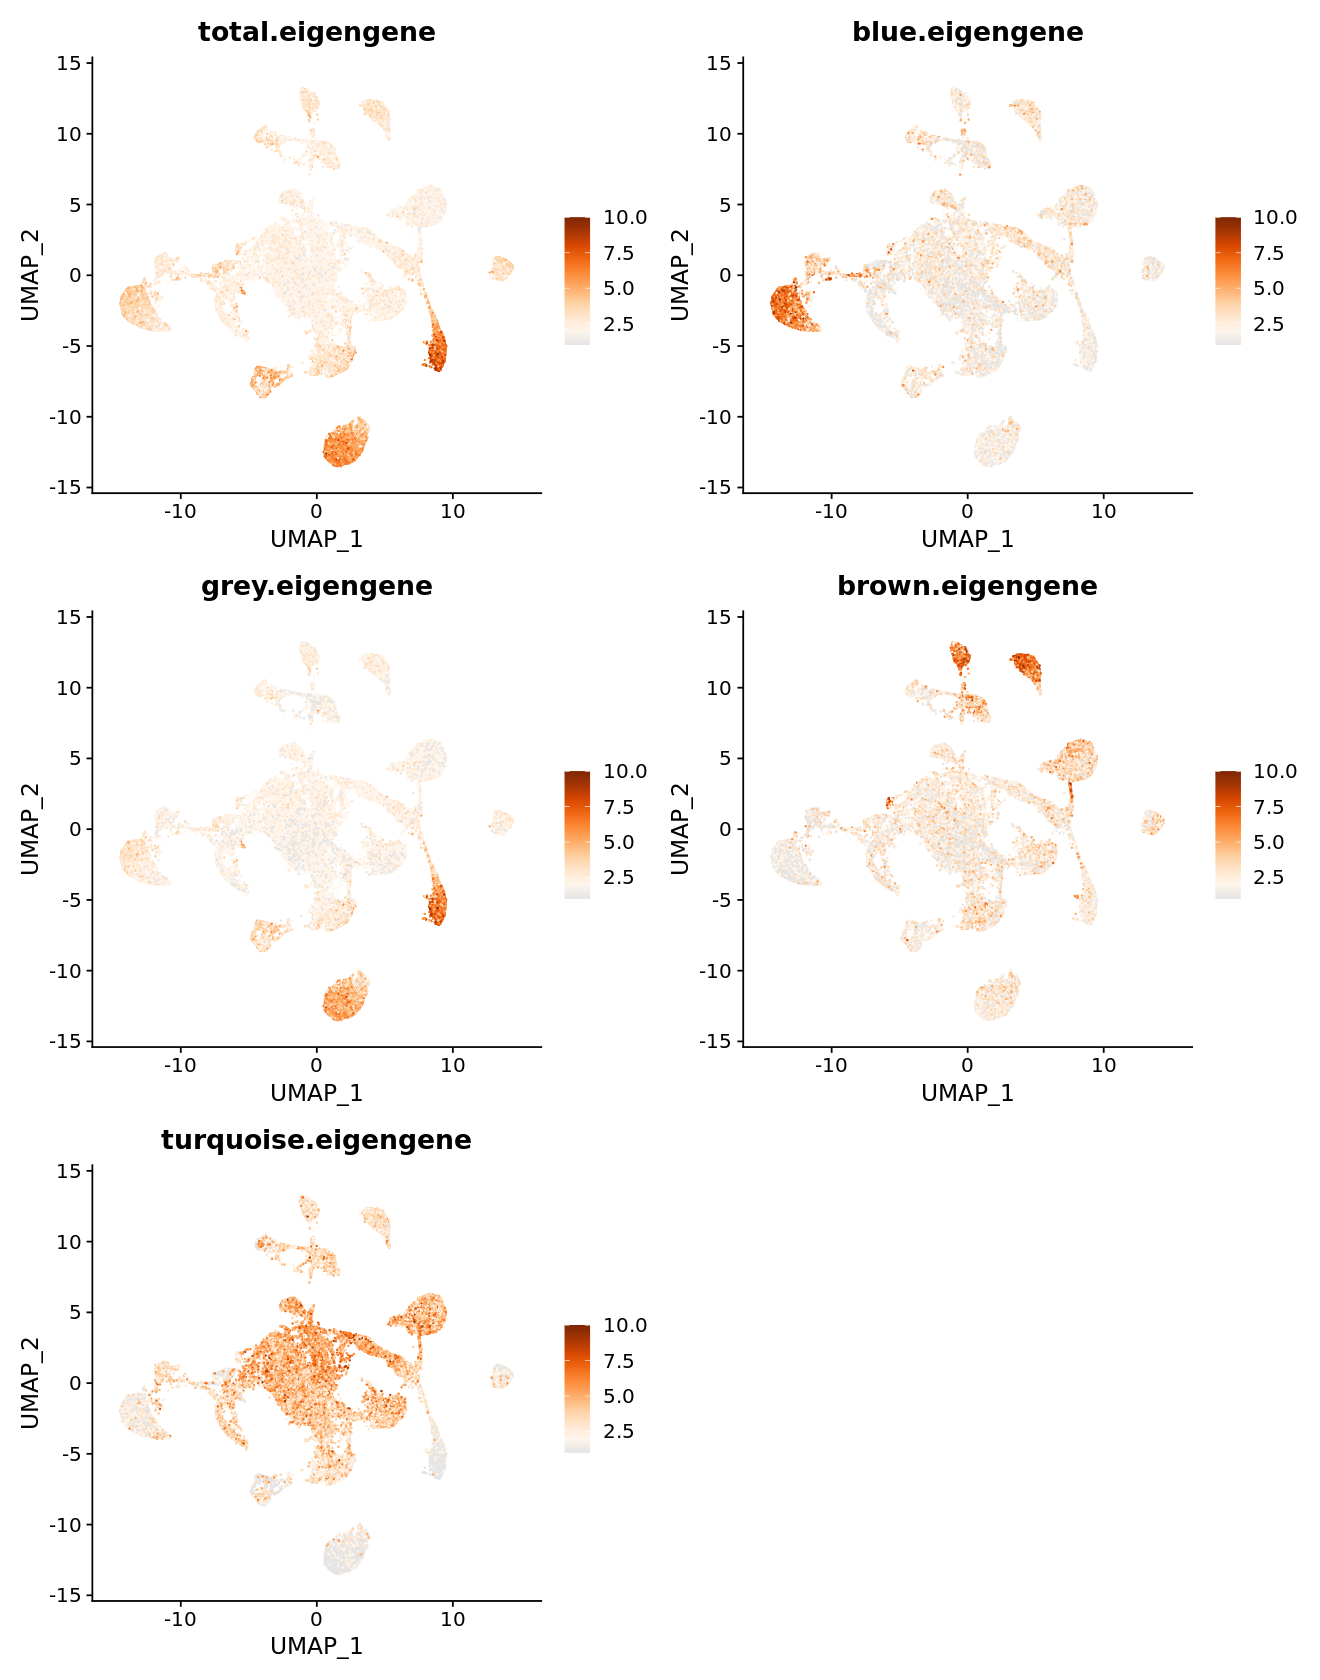

In [50]:
options(repr.plot.width=11, repr.plot.height=14)
FeaturePlot(df0, features = c("total.eigengene","blue.eigengene", "grey.eigengene",
                              "brown.eigengene", "turquoise.eigengene")
           ,cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')
           ))

In [51]:
pdf("./MCD_gene_module_UMAP.pdf",width=14, height=14)
options(repr.plot.width=11, repr.plot.height=14)
FeaturePlot(df0, features = c("total.eigengene","blue.eigengene", "grey.eigengene",
                              "brown.eigengene", "turquoise.eigengene")
           ,cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')
           ))
dev.off()

png 
  2

In [52]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(net$MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(datExpr))
}

moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

moduleTraitCor

res <- reshape2::melt(moduleTraitPvalue)
to.plot <- reshape2::melt(moduleTraitCor)
to.plot$p_value <- res$value
#to.plot$value[to.plot$value <= 0] <- NA
unique(df0@meta.data$cell_type)

Ast         Ast-L1      Ast-L2      Ast-L3      EC         
MEblue      -0.04731092 -0.09211874 -0.07303923 -0.14332921 -0.03147588
MEbrown     -0.03550093 -0.04568958  0.01280335 -0.05707912 -0.07995494
MEturquoise -0.08551917 -0.22415853 -0.08294820 -0.33157727 -0.16922113
MEgrey       0.06915237  0.50309025  0.01448650  0.51028529  0.10686009
            ExN-L1      ExN-L2       ExN1        ExN2       ExN3       
MEblue       0.04344547 -0.008202436 -0.03695651 -0.1197287  0.02431218
MEbrown     -0.04011031 -0.009567968 -0.06686802 -0.1205165 -0.07256671
MEturquoise  0.09933894  0.082719915  0.34617463  0.1617646  0.12957621
MEgrey      -0.06010725 -0.030939674 -0.10862047 -0.2023579 -0.09095884
            ImmOD       InN1        InN2          MG          OD         
MEblue       0.16573615  0.01701608 -5.364904e-02 -0.15054548  0.04240658
MEbrown     -0.07446190  0.19503484 -1.111147e-05 -0.05681830 -0.03482299
MEturquoise -0.04317447  0.14950595  1.021837e-01 -0.14061867 -0.09186705
MEgrey      -0.02946981 -0.12086158 -8.372821e-02 -0.07847445 -0.01724250
            OD-L        OPC         OPC-L1      OPC-L2       U          
MEblue       0.58511234 -0.03258838  0.03012730 -0.026787306 -0.05313701
MEbrown     -0.19706253  0.16510987  0.39187043  0.343753013 -0.03396377
MEturquoise -0.21842691 -0.01211997 -0.04181608 -0.051069859  0.07916152
MEgrey       0.05247574 -0.08749467 -0.02312727 -0.005042148 -0.07269700

[1] "InN1"   "ExN3"   "InN2"   "OPC"    "ImmOD"  "Ast"    "EC"     "OD"    
 [9] "MG"     "Ast-L2" "U"      "ExN1"   "ExN2"   "OD-L"   "ExN-L2" "Ast-L3"
[17] "OPC-L2" "ExN-L1" "OPC-L1" "Ast-L1"

[1] MEblue      MEbrown     MEturquoise MEgrey     
Levels: MEblue MEbrown MEturquoise MEgrey

Warning message:
“Removed 54 rows containing missing values (geom_point).”


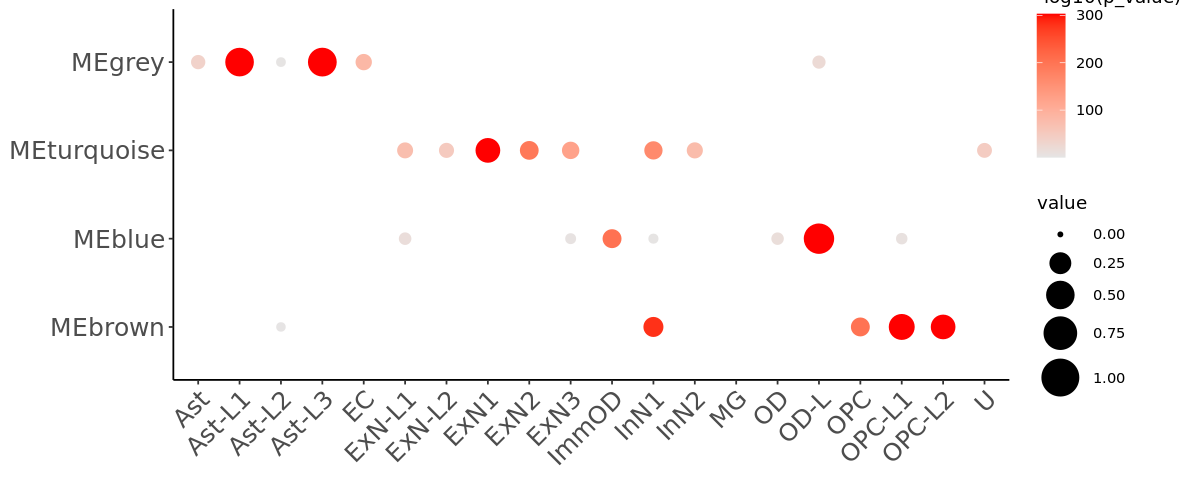

In [54]:
to.plot$Var2 <- factor(to.plot$Var2, 
                       levels = sort(unique(df0@meta.data$cell_type)))

unique(to.plot$Var1)

cell_type_modules = c('MEbrown','MEblue','MEturquoise','MEgrey')

options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo

In [55]:
pdf("WGCNA_dotplot_total_enrichment_detail.pdf", width=10, height=4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))
dev.off()

Warning message:
“Removed 54 rows containing missing values (geom_point).”


png 
  2

# GBM marker enrichment

In [129]:
GBM<-read.csv("./GBMmarker.csv",header=TRUE)

In [142]:
unique(GBM$type)

[1] "MES2" "MES1" "AC"   "OPC"  "NPC1" "NPC2" "G1/S" "G2/M"

In [180]:
genelist<-GBM$gene[GBM$type=='G2/M']

In [181]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'scale.data',
                     pt.size = 0.3,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q98',
                    order = T,
                    features = genelist)

In [182]:
datExpr<- t(as.matrix(df0@assays$RNA@scale.data[genelist,] )) # only use variable genes in analysis
Idents(df0) <- df0@meta.data$seurat_clusters
net <- blockwiseModules(datExpr, power = 10,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize = 30,
	reassignThreshold = 0, mergeCutHeight = 0.15,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..
 No significant modules detected in block 1
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15


Warning message in blockwiseModules(datExpr, power = 10, corType = "bicor", networkType = "signed", :
“blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
”


Warning message in pmin(objHeights[dendro$order][floor(positions)], objHeights[dendro$order][ceiling(positions)]):
“an argument will be fractionally recycled”


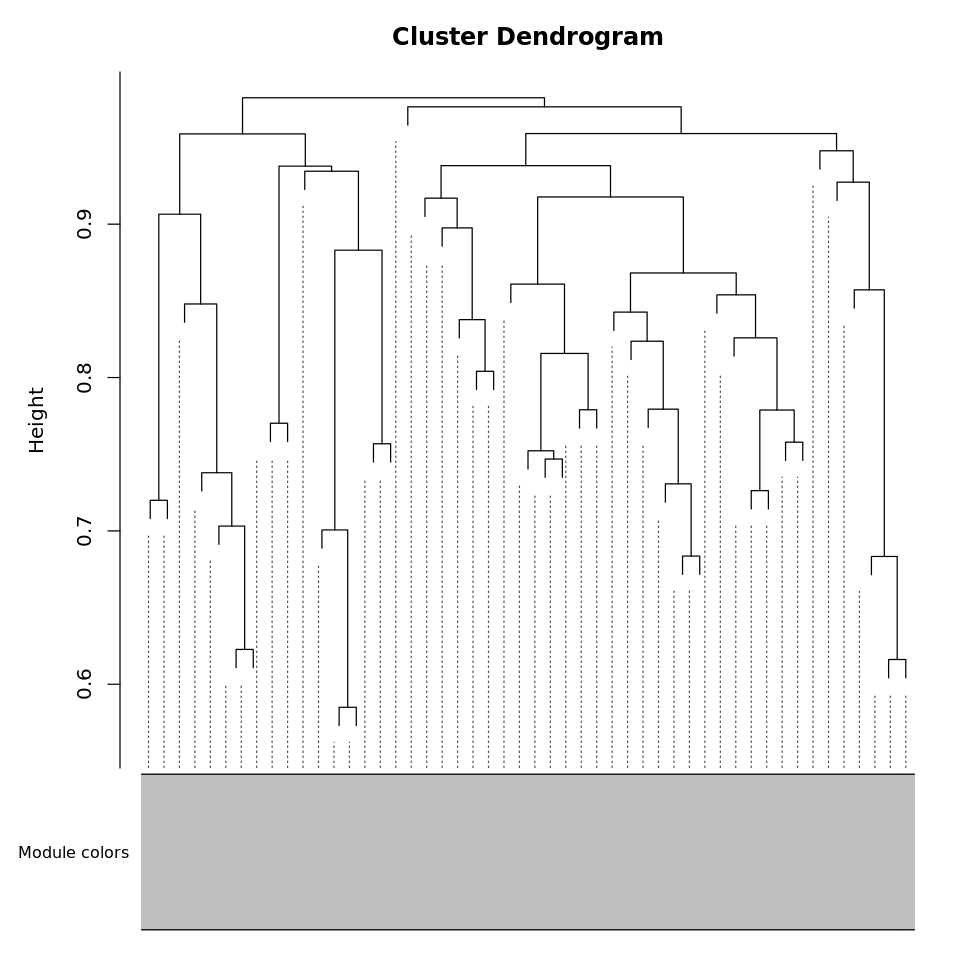

In [183]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

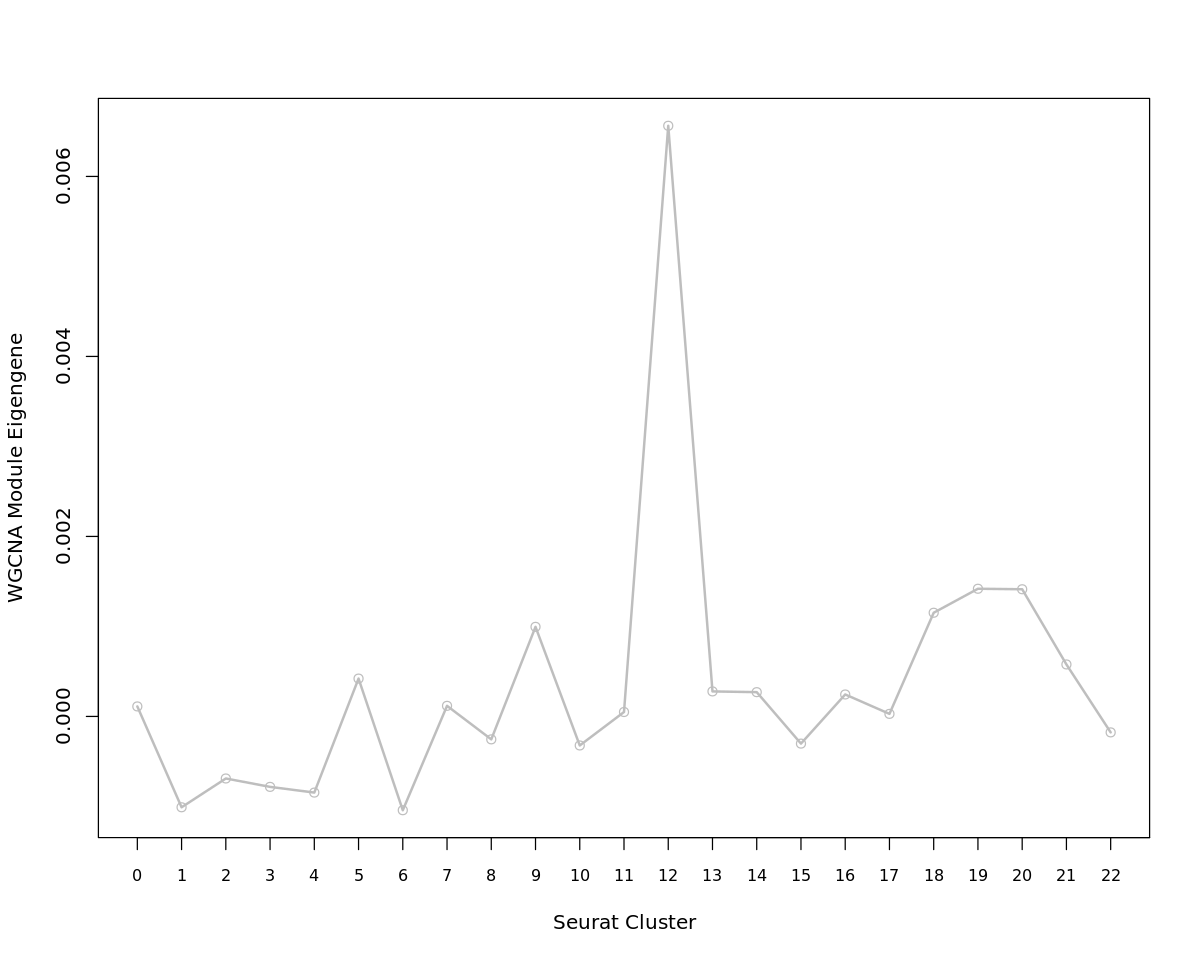

In [184]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- c("grey")
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:26, labels = 0:25, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

In [3]:
options(repr.plot.width=8, repr.plot.height=8)
G2_M.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(G2_M.eigengene) <- rownames(datExpr)
df0$G2_M.eigengene <- G2_M.eigengene
FeaturePlot(df0, features = "G2_M.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

ERROR: Error in unlist(net$MEs[paste0("ME", "grey")]): object 'net' not found


In [2]:
# 'MES2''MES1''AC''OPC''NPC1''NPC2''G1/S''G2/M'
options(repr.plot.width=14, repr.plot.height=14)
FeaturePlot(df0, features = c("MES2.eigengene","MES1.eigengene", "AC.eigengene",
                              "OPC.eigengene","NPC1.eigengene","NPC2.eigengene",
                              "G1_S.eigengene", "G2_M.eigengene")
           ,cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')
           ))

ERROR: Error in FeaturePlot(df0, features = c("MES2.eigengene", "MES1.eigengene", : could not find function "FeaturePlot"


# TSC vs CTRL pseudo bulk DEG

In [3]:
Idents(df0) <- "disease"

In [6]:
genelist<-read.csv("../FCD_gene_list.csv",header=TRUE)

In [4]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [7]:
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

[1] "FGFR2"   "LRP11"   "RYR2"    "TRANK1"  "PCNT"    "GRIN2C"  "PTPN11" 
 [8] "MAPK9"   "CSMD3"   "PIK3R3"  "CASK"    "RELN"    "TTN"     "RYR3"   
[15] "HIP1"    "SLC24A2"

[1] 16

[1] 7

[1] "FGFR2"   "GRIN2C"  "PIK3R3"  "CASK"    "RYR3"    "HIP1"    "SLC24A2"

[1] 9

[1] "LRP11"  "RYR2"   "TRANK1" "PCNT"   "PTPN11" "MAPK9"  "CSMD3"  "RELN"  
[9] "TTN"

[1] 792

[1] 943

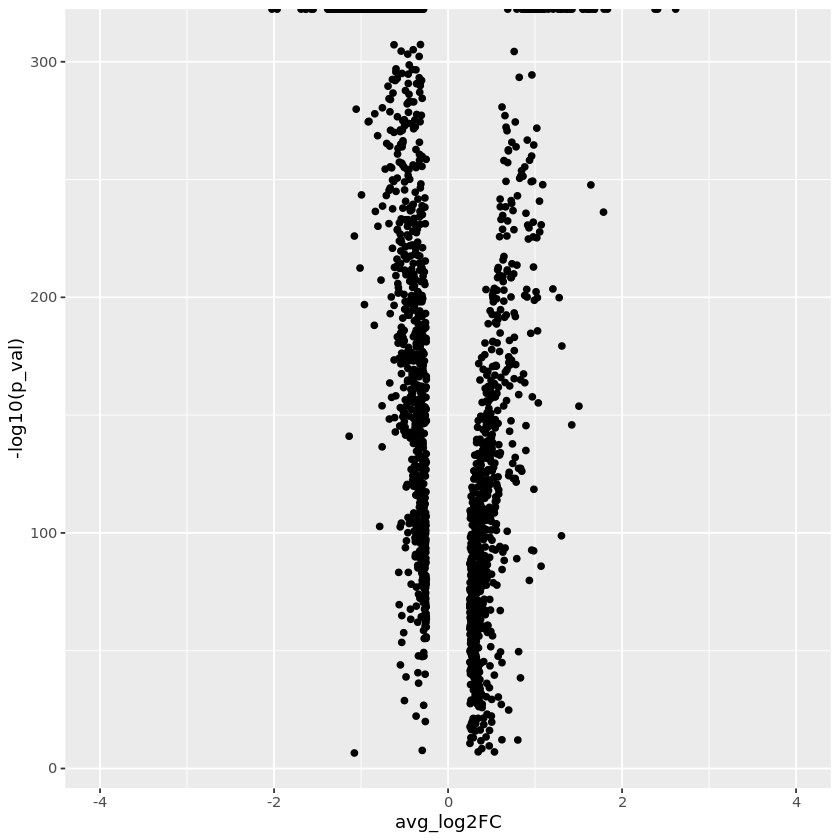

In [42]:
options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

In [198]:
DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

[1] "RYR2"    "LRP11"   "PTPN11"  "NFAT5"   "RYR3"    "HIP1"    "SLC24A2"
 [8] "KIF26B"  "UTRN"    "TTN"

[1] 10

[1] 2

[1] "RYR2" "RYR3"

[1] 8

[1] "LRP11"   "PTPN11"  "NFAT5"   "HIP1"    "SLC24A2" "KIF26B"  "UTRN"   
[8] "TTN"

[1] 203

[1] 814

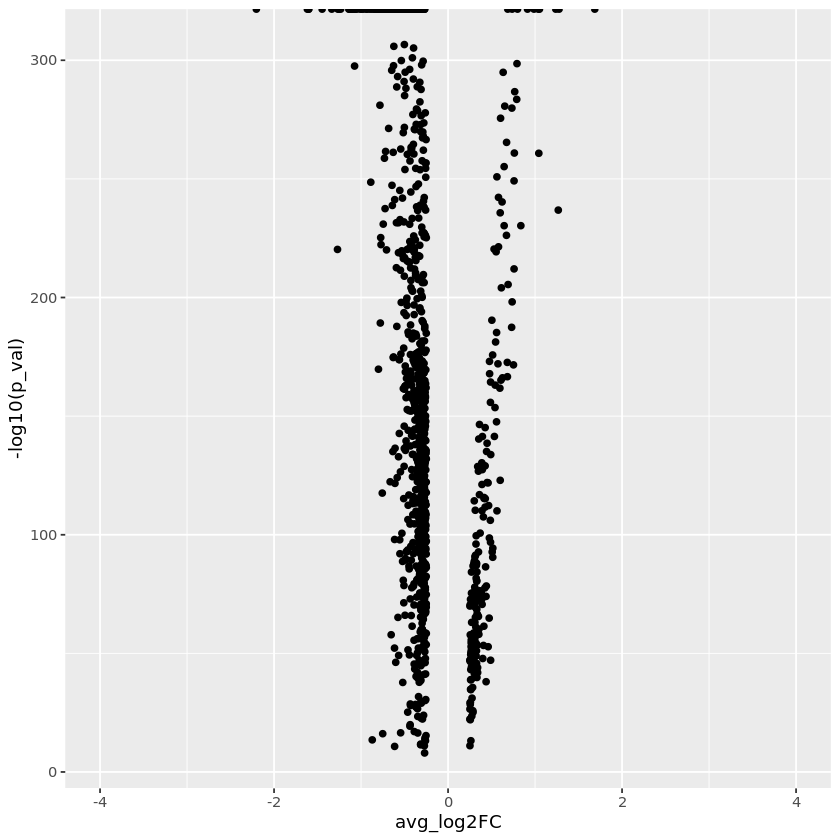

In [41]:
options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

In [199]:
DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

[1] "LRP11"   "SLC24A2" "NFAT5"   "NAV2"    "CSMD3"   "ASH1L"   "KIF26B"

[1] 7

[1] 3

[1] "NAV2"   "ASH1L"  "KIF26B"

[1] 4

[1] "LRP11"   "SLC24A2" "NFAT5"   "CSMD3"

[1] 210

[1] 771

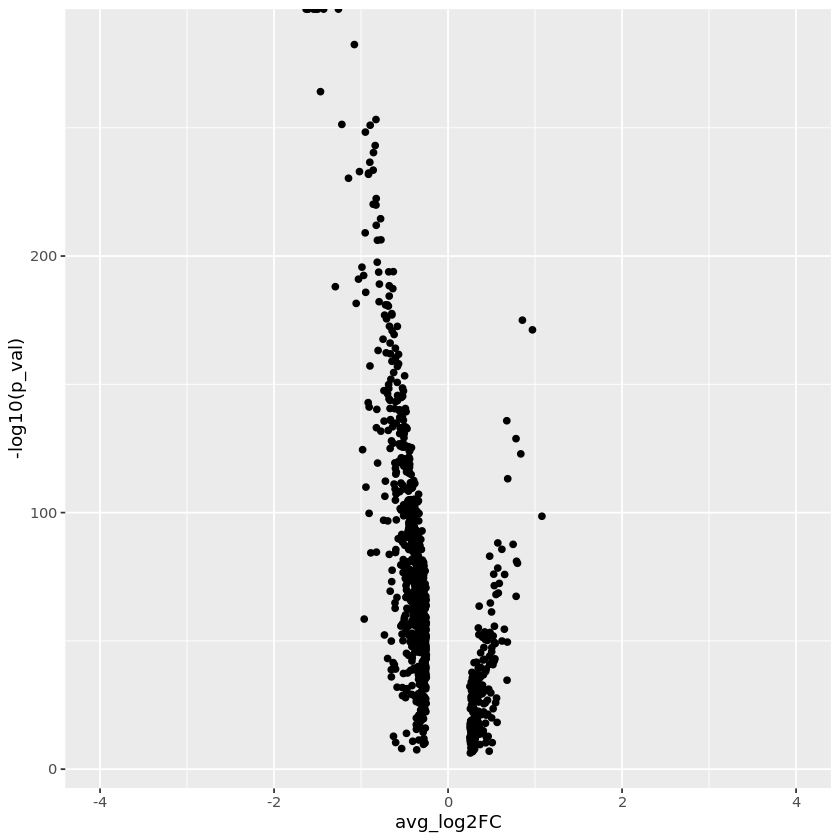

In [40]:
options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

In [45]:
intersect(hmedegup,intersect(tscdegup,fcddegup))
intersect(hmedegdown,intersect(tscdegdown,fcddegdown))

[1] "CAMK2N1"   "NCDN"      "ATP6V0B"   "ELAVL4"    "RNF11"     "SSX2IP"   
  [7] "LRRC8B"    "ATP1B1"    "NMNAT2"    "CCSAP"     "TOMM20"    "CHRM3"    
 [13] "HPCAL1"    "ROCK2"     "FAM49A"    "VSNL1"     "PPP1CB"    "CALM2"    
 [19] "BCL11A"    "PPP3R1"    "CREG2"     "KCNJ3"     "CSRNP3"    "CHN1"     
 [25] "GLS"       "MAP2"      "PTPRN"     "SCG2"      "CNTN4"     "ITPR1"    
 [31] "ATP2B2"    "RFTN1"     "ARPP21"    "CCK"       "BSN"       "WDR82"    
 [37] "SYNPR"     "TAGLN3"    "CD200"     "SERPINI1"  "FAM131A"   "EIF4A2"   
 [43] "LDB2"      "GABRA4"    "ARHGAP10"  "BASP1"     "CDH18"     "CDH9"     
 [49] "LMBRD2"    "HCN1"      "ENC1"      "HOMER1"    "FSTL4"     "PPP2CA"   
 [55] "MATR3"     "CXXC5"     "CAMK2A"    "GABRB2"    "GABRA1"    "FBLL1"    
 [61] "CPLX2"     "SNCB"      "CAP2"      "HSPA1A"    "HSPA1B"    "TMEM63B"  
 [67] "HSP90AB1"  "MLIP"      "KCNQ5"     "TMEM30A"   "TSPYL4"    "TSPYL1"   
 [73] "MAN1A1"    "CLVS2"     "HIVEP2"    "PDE10A"    "SNX10"     "HECW1"    
 [79] "CAMK2B"    "VSTM2A"    "YWHAG"     "PCLO"      "FAM3C"     "PLXNA4"   
 [85] "MTPN"      "DNAJB6"    "NUDT11"    "UBQLN2"    "PJA1"      "NAP1L2"   
 [91] "NAP1L3"    "GPRASP1"   "GPRASP2"   "BEX1"      "IDS"       "VMA21"    
 [97] "RAB39B"    "LZTS1"     "PHYHIP"    "PNMA2"     "FZD3"      "BAG4"     
[103] "ZMAT4"     "UBE2V2"    "SDCBP"     "PDP1"      "YWHAZ"     "KCNV1"    
[109] "MAL2"      "FBXO32"    "ARC"       "ELAVL2"    "GDA"       "GABBR2"   
[115] "FRRS1L"    "ZNF483"    "STXBP1"    "OLFM1"     "MTRNR2L8"  "MICAL2"   
[121] "LIN7C"     "KIAA1549L" "PGM2L1"    "GRM5"      "ELMOD1"    "C11orf87" 
[127] "CNNM1"     "TRUB1"     "ATRNL1"    "CLSTN3"    "C2CD5"     "CNTN1"    
[133] "KCNC2"     "NUDT4"     "ATP2A2"    "RPH3A"     "HSPH1"     "TSC22D1"  
[139] "PCDH8"     "NDFIP2"    "LRFN5"     "GMFB"      "RTN1"      "FMN1"     
[145] "ARPP19"    "FEM1B"     "NPTN"      "RCN2"      "DNAJA4"    "MORF4L1"  
[151] "RASGRF1"   "SV2B"      "CDIP1"     "PRKCB"     "NETO2"     "CX3CL1"   
[157] "DLG4"      "VAMP2"     "USP22"     "COPRS"     "CDK5R1"    "ATXN7L3"  
[163] "UBE2Z"     "DYNLL2"    "BAIAP2"    "B4GALT6"   "SYT4"      "ST8SIA5"  
[169] "ST8SIA3"   "PRNP"      "PLCB1"     "SNAP25"    "KCNB1"     "ATP9A"    
[175] "CBLN4"     "CDKN2D"    "DNAJB1"    "JUND"      "FXYD7"     "PEG3"     
[181] "MAPK1"     "NPTXR"     "MPPED1"    "SULT4A1"   "HSPA13"    "APP"      
[187] "KCNJ6"     "SUMO3"     "HNRNPH2"   "NUAK1"     "CLVS1"     "HLF"      
[193] "RIMS4"     "MTMR6"     "RCAN2"     "SCOC"      "MYO1B"     "CDH8"     
[199] "ACTR2"     "ADAM22"    "SCAI"      "PGRMC1"    "MAFB"      "HSPA6"    
[205] "EGR3"      "CDKL5"     "PRKAR2B"   "ZBTB21"    "PDE8B"     "CNR1"     
[211] "RAB6B"     "DIRAS2"    "NUDT21"    "RAB3C"     "PTP4A1"    "PPP2R1A"  
[217] "GABRG2"    "GAD2"      "C1orf115"  "TUBA1B"    "C16orf72"  "NEURL1B"  
[223] "ARL6IP1"   "GAS7"      "OLFM3"     "TRIM37"    "LNX1"      "NREP"     
[229] "CRY2"      "CPNE8"     "HNRNPK"    "KCTD16"    "HPCA"      "PTGS2"    
[235] "GSKIP"     "RTF1"      "WASF1"     "ZBTB18"    "PEG10"     "PPP3CA"   
[241] "CBLN2"     "WSB2"      "NSG2"      "GLRA3"     "FKBP1A"    "THRB"     
[247] "C18orf25"  "GRIA4"     "RIMS1"     "RFK"       "HNRNPA0"   "PAFAH1B2" 
[253] "PDPK1"     "UBE2Q1"    "CXCL13"    "SERINC3"   "SLIT2"     "COX7A2L"  
[259] "PHACTR1"   "TMEM14A"   "LRRC4"     "SLC9A6"    "SNX3"      "HSPB1"    
[265] "DOK6"      "SOCS5"     "TSN"       "FAM19A2"   "OCRL"      "CNTN3"    
[271] "SLC2A13"   "RNF187"    "ZYG11B"    "CDH12"     "RHBDD2"    "NUCKS1"   
[277] "DUSP8"     "EIF1"      "PCBP1"     "NDFIP1"    "TMEM106B"  "ATP6V0A1" 
[283] "FAM199X"   "TSPAN7"    "C4orf3"    "ASXL3"     "SERINC1"   "ARRDC3"   
[289] "GIPC2"     "ARL4C"     "KITLG"     "HS6ST3"    "SGTB"      "SIAH2"    
[295] "SH3GL2"    "TTYH3"     "GRM7"      "STARD4"    "PLEKHB2"   "NSF"      
[301] "MORF4L2"   "ELK1"      "H2AFV"     "EPHA4"     "GLRB"      "CHSY3"    
[307] "FAM169A"   "NCEH1

# DEG in Ast lineage

In [1]:
df0 <- readRDS("SeuratObject.rds")

In [8]:
df0<-subset(df0,subset=cell_type %in% c('Ast','Ast-L1','Ast-L2','Ast-L3'))

In [26]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "RYR2"   "GRIN2C" "PIK3R3" "CSMD3"  "FGFR2"  "RYR3"   "TTN"    "HEPH"  
 [9] "ZNF423" "MED13"  "TSC2"   "BRAF"

[1] 12

[1] 9

[1] "GRIN2C" "PIK3R3" "FGFR2"  "RYR3"   "HEPH"   "ZNF423" "MED13"  "TSC2"  
[9] "BRAF"

[1] 3

[1] "RYR2"  "CSMD3" "TTN"

[1] 972

[1] 165

[1] "EYA1"  "RYR2"  "RYR3"  "FGFR2" "NAV2"

[1] 5

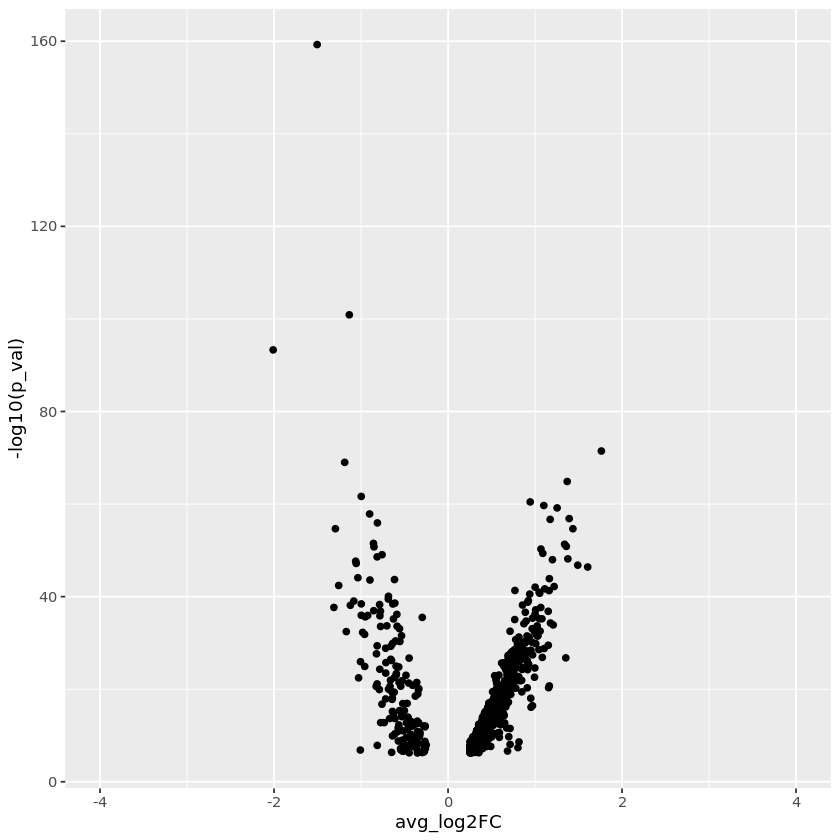

[1] 3

[1] "RYR2" "RYR3" "NAV2"

[1] 2

[1] "EYA1"  "FGFR2"

[1] 190

[1] 110

[1] "AKT3"

[1] 1

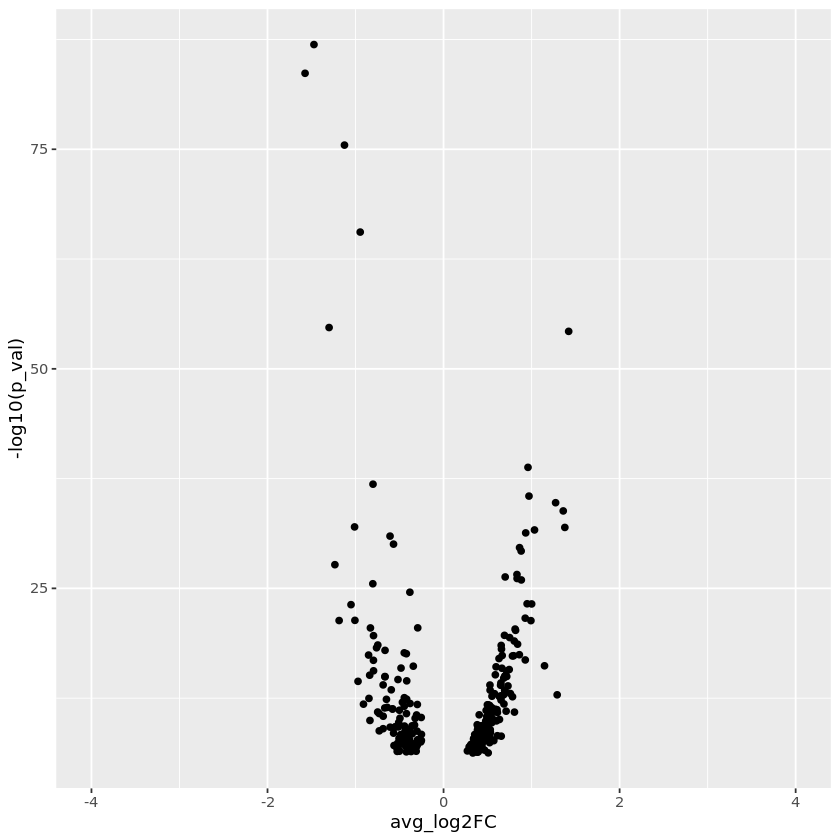

[1] 1

[1] "AKT3"

[1] 0

character(0)

[1] 47

[1] 89

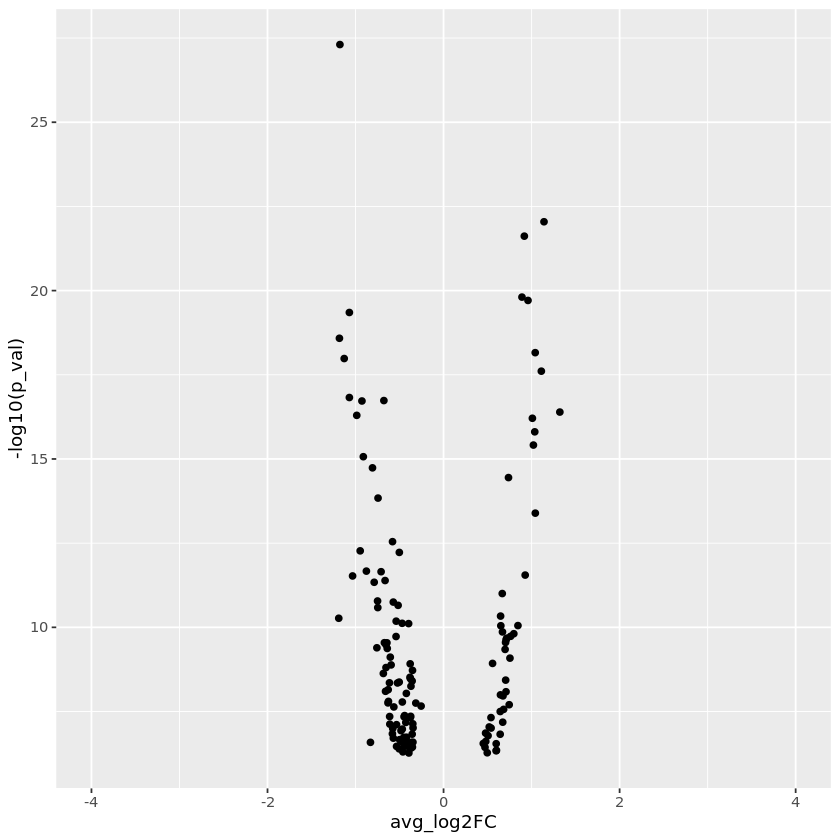

In [10]:
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_Ast.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_Ast.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_Ast.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_Ast.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_Ast.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_Ast.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

In [8]:
intersect(hmedegup,intersect(tscdegup,fcddegup))

[1] "OPCML"   "CSMD1"   "PPP2R2B" "RORA"    "KCNIP4"  "SUMF1"   "FAM133B"
[8] "NRXN3"   "PTPRN2"

In [15]:
intersect(c(tscdegup,tscdegdown),c(hmedegup,hmedegdown))

[1] "DPP10"       "RYR2"        "CSMD1"       "NRXN3"       "CHD5"       
 [6] "KCNH7"       "CELF2"       "KCNIP4"      "CTNNA2"      "CLU"        
[11] "DCLK1"       "SYT1"        "LINGO2"      "KCNQ5"       "LRP1B"      
[16] "OPCML"       "PTPRN2"      "MEF2C"       "SNRNP70"     "ANKRD36C"   
[21] "KALRN"       "PPP2R2B"     "LSAMP"       "SEMA6D"      "IQCJ-SCHIP1"
[26] "PKP4"        "SCN9A"       "RORA"        "SLC1A3"      "MACROD2"    
[31] "MYT1L"       "R3HDM1"      "CCSER1"      "UNC5C"       "MTRNR2L12"  
[36] "SNTG1"       "UNC80"       "PLP1"        "CRB1"        "FAM155A"    
[41] "FAM133B"     "PHACTR1"     "RPS6KA5"     "SUMF1"       "LUC7L3"     
[46] "WSB1"        "HSPA1B"      "JUND"        "DNAJB1"      "HSPA1A"     
[51] "HSPB1"       "SPATA6"      "ARPP19"      "WDR82"       "CLIP2"      
[56] "MT3"         "HSP90AB1"    "NOS1"        "CACNG4"      "UBC"        
[61] "SUMO3"       "VMA21"       "PRNP"        "TSPYL4"      "DNAJB6"     
[66] "KCNMB2"      "PCDH15"      "TSPYL1"      "ARRDC3"      "SGIP1"      
[71] "SEMA5A"      "CST3"        "APP"         "MTRNR2L8"    "SNAP25"     
[76] "CAMK2N1"     "ATRNL1"      "YWHAG"       "OLFM2"       "XYLT1"      
[81] "EPN2"        "SPECC1"      "ADAMTS17"    "PRKCA"       "NPTXR"      
[86] "PDGFRA"      "DOCK1"       "SCD5"        "PEAK1"       "RTN1"

In [9]:
intersect(hmedegdown,intersect(tscdegdown,fcddegdown))

[1] "HSPA1B"   "JUND"     "NPTXR"    "TSPYL1"   "HSP90AB1" "DNAJB1"  
 [7] "ARPP19"   "YWHAG"    "SNAP25"   "HSPB1"    "RTN1"     "PRNP"    
[13] "TSPYL4"   "VMA21"    "UBC"      "ARRDC3"   "WDR82"    "HSPA1A"  
[19] "SGIP1"    "APP"      "DNAJB6"

In [11]:
intersect(hmedegup,intersect(tscdegup,fcddegup))

[1] "PPP2R2B" "COL5A3"  "RASSF4"

In [10]:
intersect(tscdegup,fcddegup)
intersect(hmedegup,fcddegup)
intersect(hmedegup,tscdegup)

[1] "RBFOX1"  "CSMD1"   "NRXN3"   "KCNIP4"  "CNTNAP2" "OPCML"   "PTPRN2" 
 [8] "PPP2R2B" "RORA"    "PTPRS"   "ZBTB16"  "FAM133B" "SUMF1"   "KCNMA1"

[1] "OPCML"      "CSMD1"      "DPP6"       "AGAP1"      "PPP2R2B"   
 [6] "DSCAM"      "NTM"        "RORA"       "EPN2"       "WWOX"      
[11] "PTPRT"      "TNS3"       "SLC35F1"    "GLCCI1"     "KAZN"      
[16] "TNK2"       "C10orf90"   "MEGF11"     "CHST11"     "KCNIP4"    
[21] "SUMF1"      "GRID1"      "CSGALNACT1" "FAM19A5"    "AMZ1"      
[26] "SMOC1"      "RERE"       "DSCAML1"    "OLFM2"      "MB21D2"    
[31] "ASTN2"      "FAM133B"    "KAT2B"      "GNPTAB"     "SLAIN1"    
[36] "TRIO"       "EPHB1"      "TNR"        "MSI2"       "PTPRJ"     
[41] "XYLT1"      "DIP2C"      "NRXN3"      "USP54"      "PTPRN2"    
[46] "OPHN1"

[1] "OPCML"    "CSMD1"    "PPP2R2B"  "SNTG1"    "LSAMP"    "RORA"    
 [7] "SLC1A3"   "CRB1"     "CTNNA2"   "LRP1B"    "SEMA6D"   "KCNIP4"  
[13] "SNRNP70"  "SUMF1"    "PLP1"     "FAM133B"  "CLU"      "UNC80"   
[19] "FAM155A"  "SCN9A"    "WSB1"     "ANKRD36C" "PKP4"     "UNC5C"   
[25] "RPS6KA5"  "DPP10"    "KCNH7"    "NRXN3"    "PTPRN2"   "MACROD2"

In [55]:
intersect(tscdegdown,fcddegdown)
intersect(hmedegdown,fcddegdown)
intersect(hmedegdown,tscdegdown)

[1] "HSPA1B"   "WIF1"     "JUND"     "SERPINE2" "HSPA1A"   "GRM3"    
 [7] "LGI1"     "CPE"      "ARPP19"   "METTL7A"  "UBC"      "HSPB1"   
[13] "FZD3"     "PDE10A"   "SNAP25"   "SGIP1"    "TSPYL4"   "HSP90AB1"
[19] "ITM2B"    "PTAR1"    "DNAJA4"   "DNAJB6"   "TSPAN7"   "TSPYL1"  
[25] "GABRA2"   "PTMA"     "MORF4L1"  "ELAVL1"   "NPTXR"    "PRICKLE2"
[31] "TUBA1B"   "SLC7A11"  "PRNP"

[1] "HSPA1B"   "MAP1B"    "PDE10A"   "JUND"     "HSPA1A"   "HSP90AB1"
 [7] "HSP90AA1" "NPTXR"    "RTN1"     "SNAP25"   "CCK"      "ARPP19"  
[13] "TSPYL1"   "NRGN"     "SNCB"     "SCG2"     "CREG2"    "YWHAG"   
[19] "TSPYL4"   "UCHL1"    "HSPH1"    "BASP1"    "DNAJA4"   "TOMM20"  
[25] "LMO4"     "ATP1B1"   "PPP3R1"   "PRNP"     "ATP6V0B"  "HNRNPK"

[1] "HPSE2"    "HSPA1B"   "PDE10A"   "TPD52L1"  "JUND"     "HSPA1A"  
 [7] "HSP90AB1" "NPTXR"    "ZNF98"    "DCHS2"    "SNAP25"   "MTRNR2L8"
[13] "CAMK2N1"  "ARPP19"   "TSPYL1"   "SUMO3"    "C1QTNF1"  "TSPYL4"  
[19] "DNAJA4"   "DYNLL2"   "COL4A3"   "MYO1B"    "LZTS1"    "PRNP"    
[25] "DNAJB1"   "SLC6A12"

# DEG in Olig lineage

An object of class Seurat 
35211 features across 3030 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "FGFR2"

[1] 1

[1] 1

[1] "FGFR2"

[1] 0

character(0)

[1] 135

[1] 66

[1] "SLC24A2" "RYR2"

[1] 2

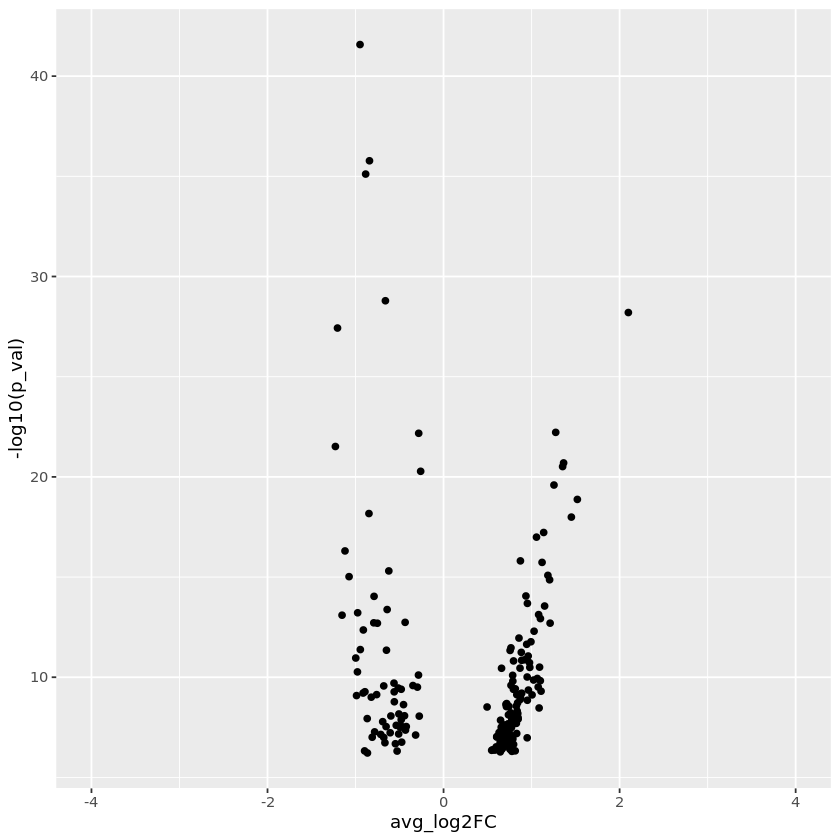

[1] 1

[1] "RYR2"

[1] 1

[1] "SLC24A2"

[1] 40

[1] 34

character(0)

[1] 0

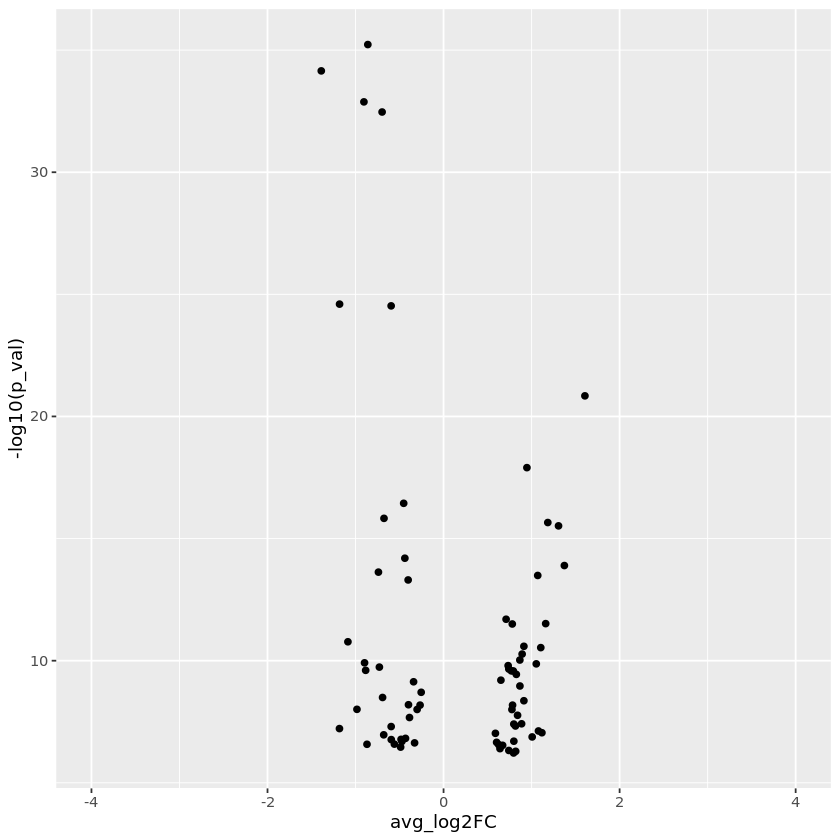

[1] 0

character(0)

[1] 0

character(0)

[1] 19

[1] 6

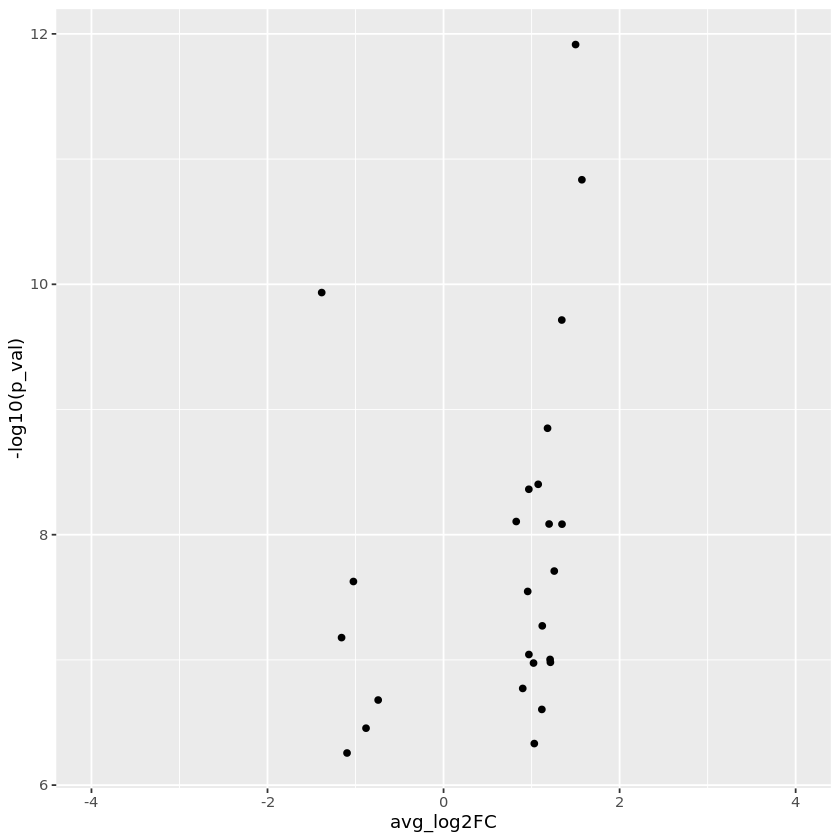

In [16]:
df0 <- readRDS("SeuratObject.rds")

df0<-subset(df0,subset=cell_type %in% c('OD','OD-L'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_OD.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_OD.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_OD.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_OD.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_OD.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_OD.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

An object of class Seurat 
35211 features across 3293 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "CASK"   "RYR2"   "NAV2"   "CSMD3"  "BRAF"   "PIK3R3"

[1] 6

[1] 5

[1] "CASK"   "NAV2"   "CSMD3"  "BRAF"   "PIK3R3"

[1] 1

[1] "RYR2"

[1] 599

[1] 79

[1] "RYR2"   "RYR3"   "KIF26B"

[1] 3

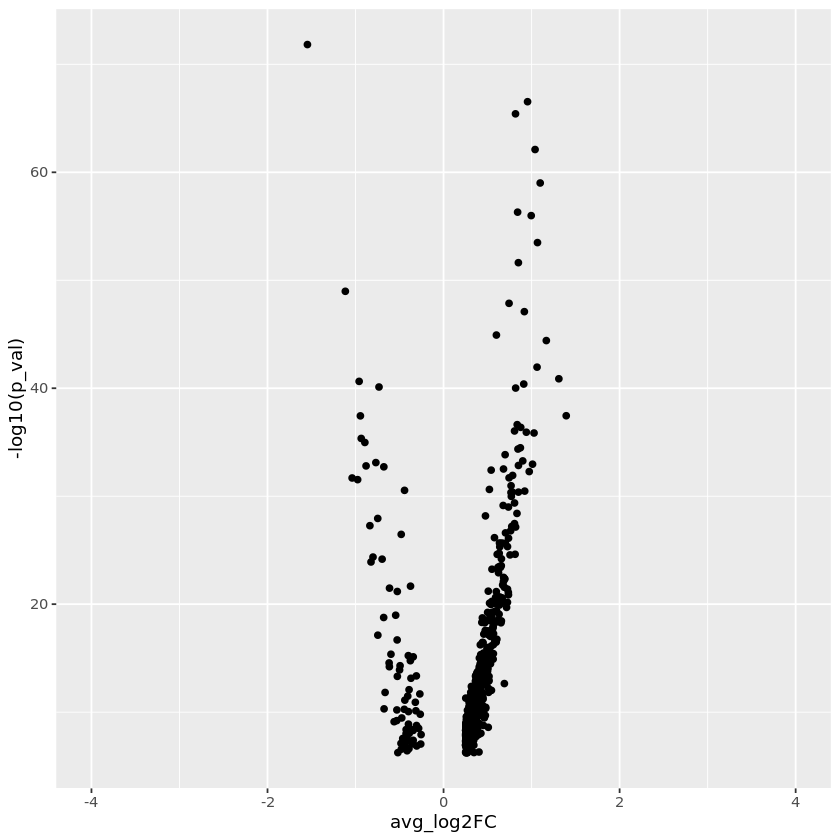

[1] 2

[1] "RYR2" "RYR3"

[1] 1

[1] "KIF26B"

[1] 161

[1] 115

[1] "KIF26B"

[1] 1

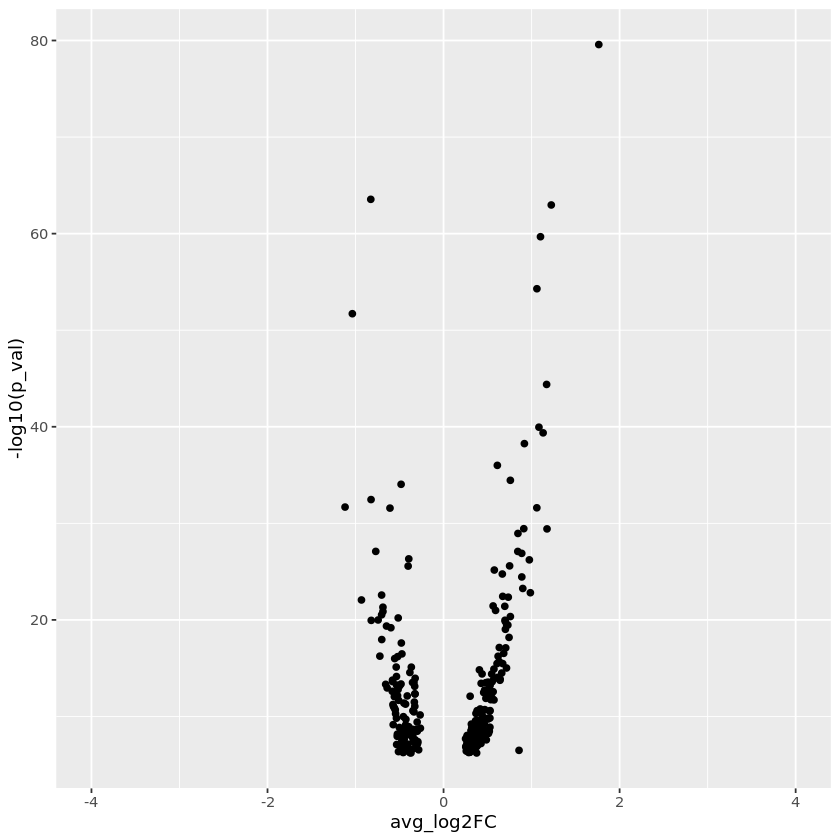

[1] 1

[1] "KIF26B"

[1] 0

character(0)

[1] 86

[1] 91

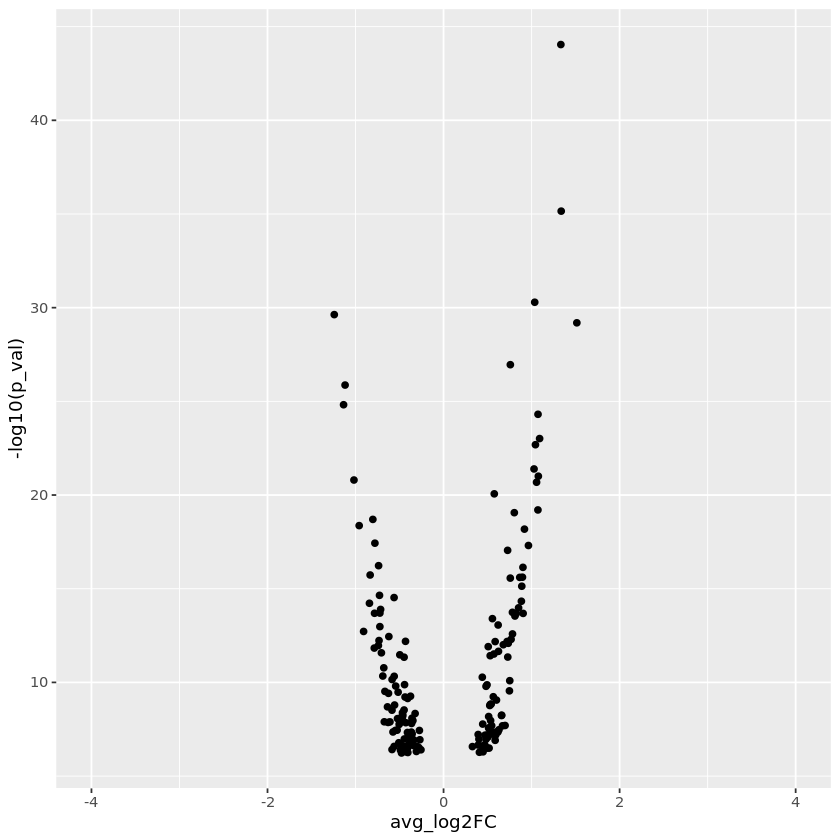

In [18]:
df0 <- readRDS("SeuratObject.rds")

df0<-subset(df0,subset=cell_type %in% c('OPC','OPC-L1','OPC-L2'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_OPC.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_OPC.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_OPC.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_OPC.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_OPC.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_OPC.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

An object of class Seurat 
35211 features across 11591 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "RYR2"   "PTPN11" "NFAT5"  "LRP11"  "RYR3"   "CASK"

[1] 6

[1] 3

[1] "RYR2" "RYR3" "CASK"

[1] 3

[1] "PTPN11" "NFAT5"  "LRP11"

[1] 335

[1] 861

[1] "RYR2"    "LRP11"   "RHEB"    "PTPN11"  "NFAT5"   "HIP1"    "SLC24A2"
[8] "RYR3"

[1] 8

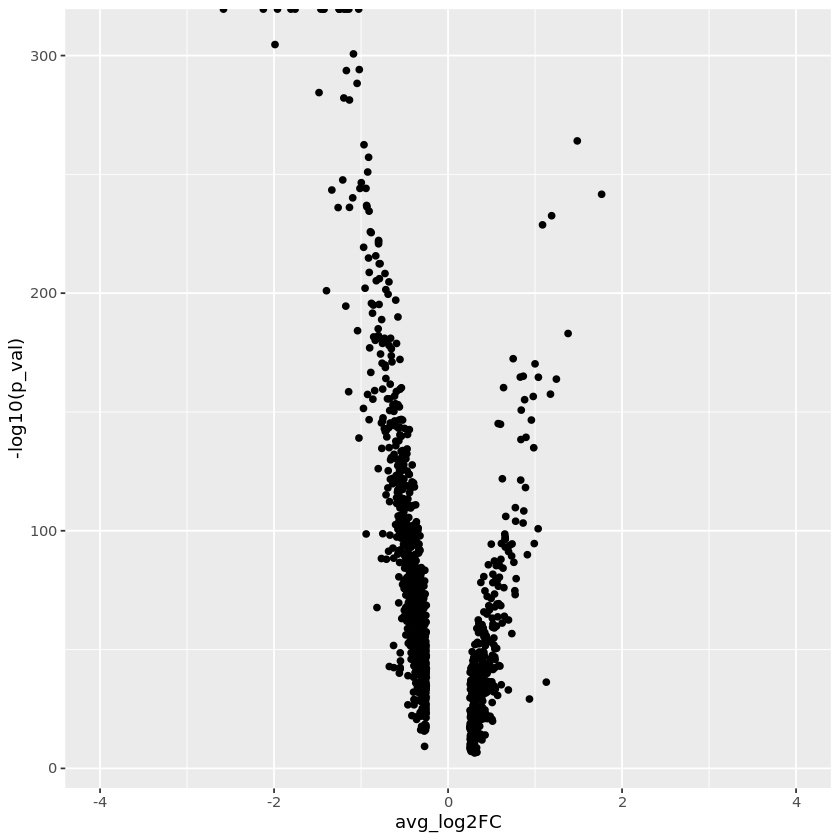

[1] 2

[1] "RYR2" "RYR3"

[1] 6

[1] "LRP11"   "RHEB"    "PTPN11"  "NFAT5"   "HIP1"    "SLC24A2"

[1] 311

[1] 1037

[1] "RHEB"    "BRAF"    "LRP11"   "NFAT5"   "NAV2"    "RYR2"    "MAPK9"  
 [8] "SLC24A2" "PCNT"    "KIF26B"  "ASH1L"

[1] 11

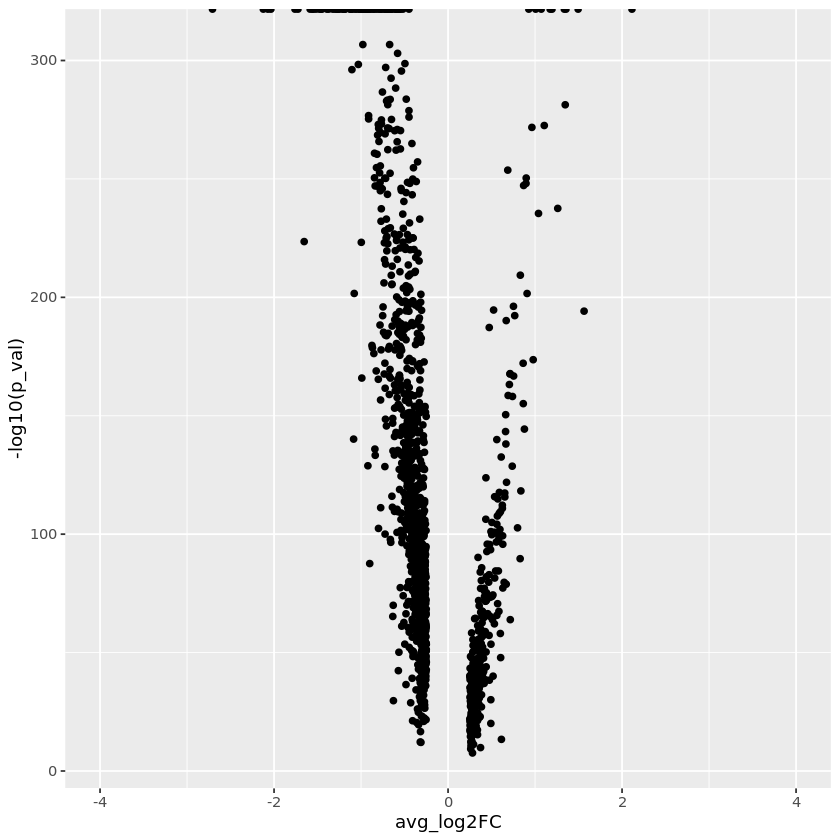

[1] 5

[1] "NAV2"   "RYR2"   "PCNT"   "KIF26B" "ASH1L"

[1] 6

[1] "RHEB"    "BRAF"    "LRP11"   "NFAT5"   "MAPK9"   "SLC24A2"

[1] 262

[1] 946

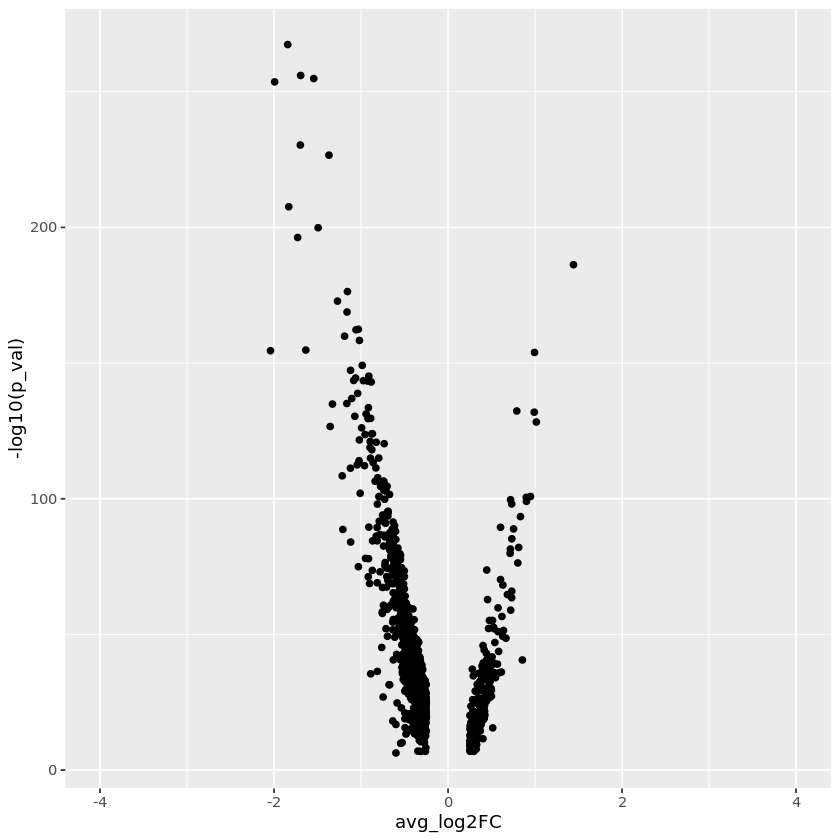

In [17]:
df0 <- readRDS("SeuratObject.rds")

df0<-subset(df0,subset=cell_type %in% c('ExN1','ExN2','ExN3','ExN-L1','ExN-L2'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_ExN.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_ExN.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_ExN.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_ExN.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_ExN.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_ExN.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

An object of class Seurat 
35211 features across 1284 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "NAV2"   "PTPN11"

[1] 2

[1] 1

[1] "NAV2"

[1] 1

[1] "PTPN11"

[1] 45

[1] 267

[1] "LRP11"  "PTPN11" "RHEB"   "HIP1"   "NAV2"

[1] 5

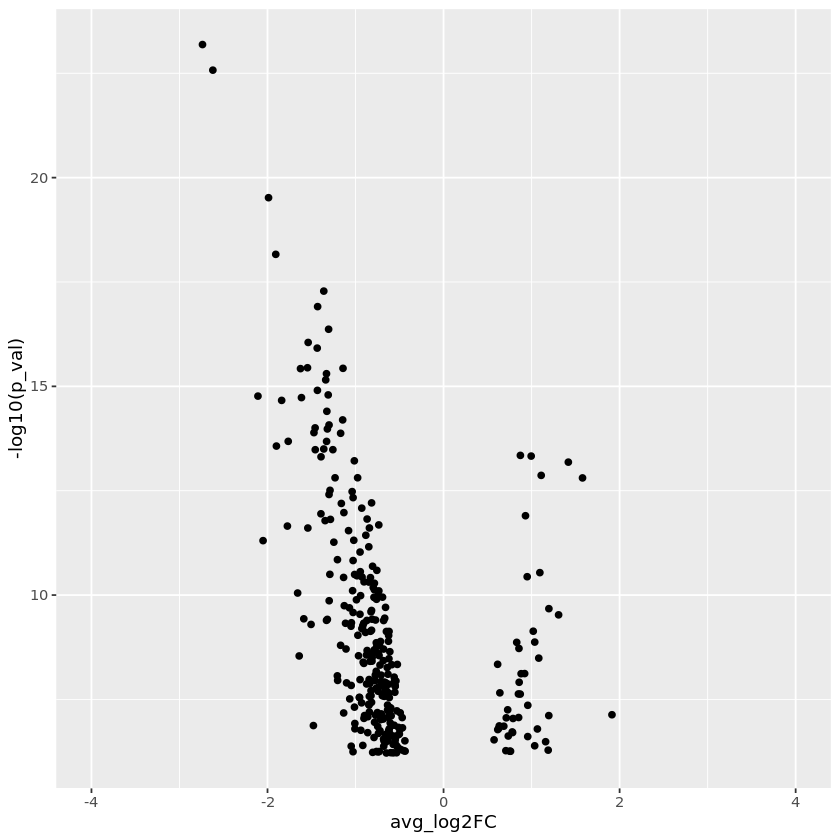

[1] 1

[1] "NAV2"

[1] 4

[1] "LRP11"  "PTPN11" "RHEB"   "HIP1"

[1] 80

[1] 669

character(0)

[1] 0

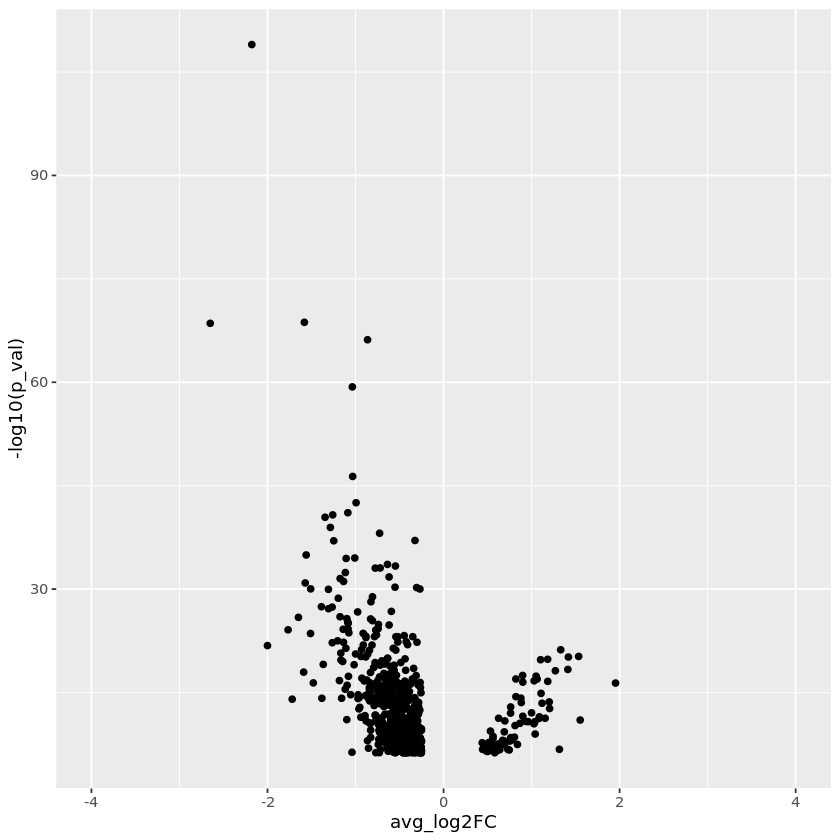

[1] 0

character(0)

[1] 0

character(0)

[1] 24

[1] 81

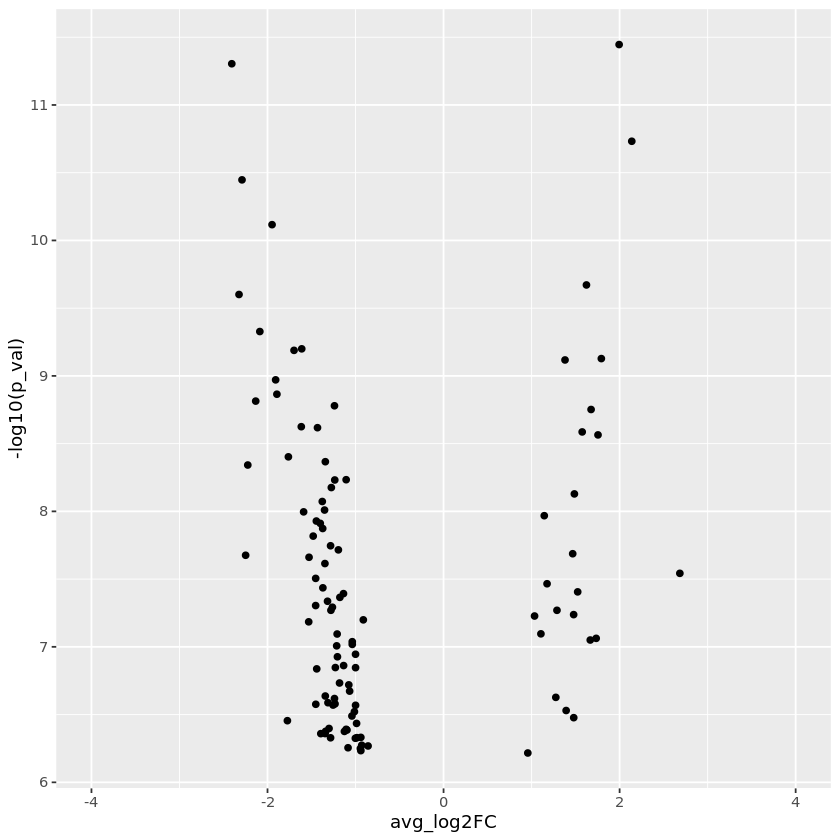

In [16]:
df0 <- readRDS("SeuratObject.rds")

df0<-subset(df0,subset=cell_type %in% c('U'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_U.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_U.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_U.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_U.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_U.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_U.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]